# EOS Time Series Analysis

In [1]:
import csv
import time 
import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random

In [2]:
limit = 25
end_date = 1 + limit
start = '2018-03-01T00:01:00.000+00:00'
start_d = parser.parse(start)

In [3]:
def parse_row(row):
    d = parser.parse(row[1])
    d.replace(tzinfo=None)
    return d, float(row[2]), row[3], row[4], row[6], row[7]

def cumulative_list(l):
    new_list = []
    total = 0
    for x in l:
        total += x
        new_list.append(total)
        
    return new_list

In [2]:
#For parsing transactions
class TX():
    
    def __init__(self, timestamp, amount, sender, receiver):
        self.timestamp = timestamp
        self.amount = amount
        self.sender = sender
        self.receiver = receiver

In [5]:
#Account nodes
class Node():
    
    def __init__(self, node_id, address, account_type):
        self.node_id = node_id
        self.address = address
        self.account_type = account_type
        self.txs_in = []
        self.txs_out = []
        
    def add_tx_in(self, tx):
        self.txs_in.append(tx)
        
    def add_tx_out(self, tx):
        self.txs_out.append(tx)
        
    def time_series(self):
        all_txs = [[start_d, 0]]
        all_txs += [[x.timestamp, x.amount] for x in self.txs_in]
        all_txs += [[x.timestamp, -x.amount] for x in self.txs_out]
        all_txs.sort(key= lambda x: x[0])
        time, funds = zip(*all_txs)
        
        return time, funds, cumulative_list(funds)

        
    def __str__(self):
        return f"{self.account_type}: {len(self.txs_in)} in, {len(self.txs_out)} out"
        

In [6]:
transactions = []
nodes = {}
with open("eos_txs_2018_3.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    node_num = 0
    
    for row in csv_reader:

        if line_count == 0:
            headers = row
        else:
            timestamp, amount, sender, receiver, s_type, r_type = parse_row(row)
            
            if timestamp.day > limit:
                break
                
            if sender not in nodes:
                nodes[sender] = Node(node_num, sender, s_type)
                node_num += 1
    
            if receiver not in nodes:
                nodes[receiver] = Node(node_num, receiver, r_type)
                node_num += 1
            
            tx = TX(timestamp, amount, sender, receiver)
            transactions.append(tx)
            nodes[sender].add_tx_out(tx)
            nodes[receiver].add_tx_in(tx)

        line_count +=1

In [7]:
#Shuffle the nodes and then assign node numbers - so graphs are roughly same size (means v. sparse)
keys = list(nodes.keys())
random.shuffle(keys)
for i, addr in enumerate(keys):
    nodes[addr].node_id = i

In [8]:
def print_time_series(node, end_date):
    print(node.address)
    print(node)
    time, funds, cumul_funds = node.time_series()

    plt.figure()
    
    fig, axes = plt.subplots(1,2, figsize=(30,5))
    axes[0].plot(time, funds)
    axes[1].plot(time, cumul_funds)

    axes[0].set_xlim([datetime.date(2018, 3, 1), datetime.date(2018, 3, end_date)])
    axes[1].set_xlim([datetime.date(2018, 3, 1), datetime.date(2018, 3, end_date)])
    plt.tight_layout()
    plt.show()
    print("--------------------------------")

0x564286362092d8e7936f0549571a803b203aaced
Wallet: 18 in, 3408 out


<Figure size 432x288 with 0 Axes>

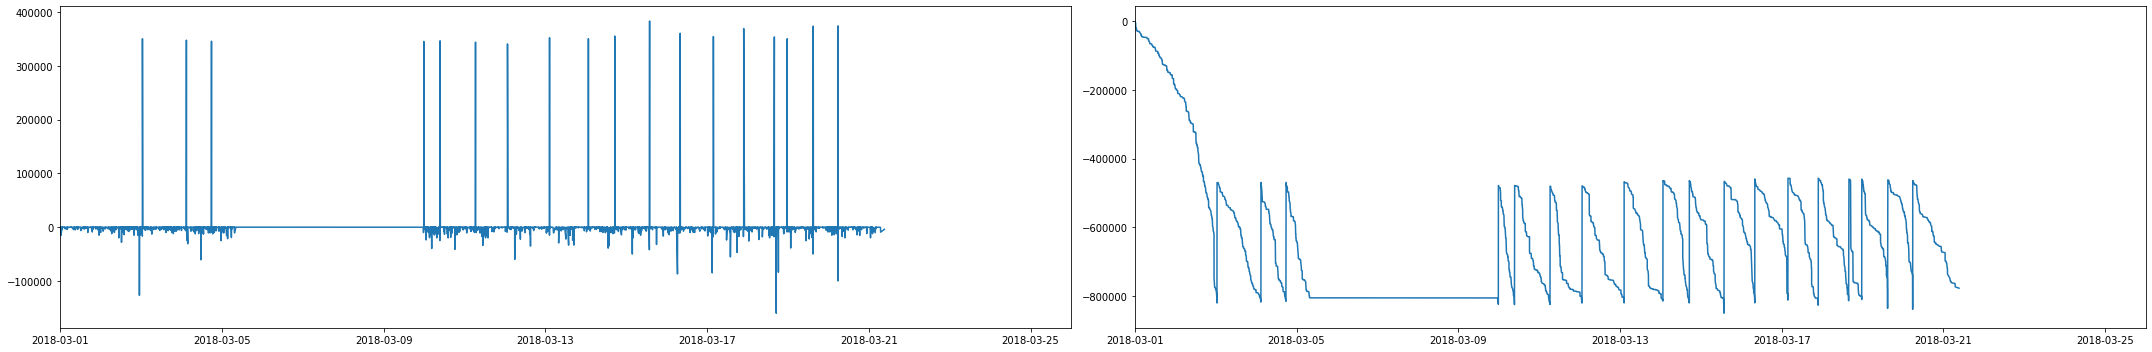

--------------------------------
0xb354f83588bc2fde2607cd8fd21c9d547619af1b
Wallet: 6 in, 6 out


<Figure size 432x288 with 0 Axes>

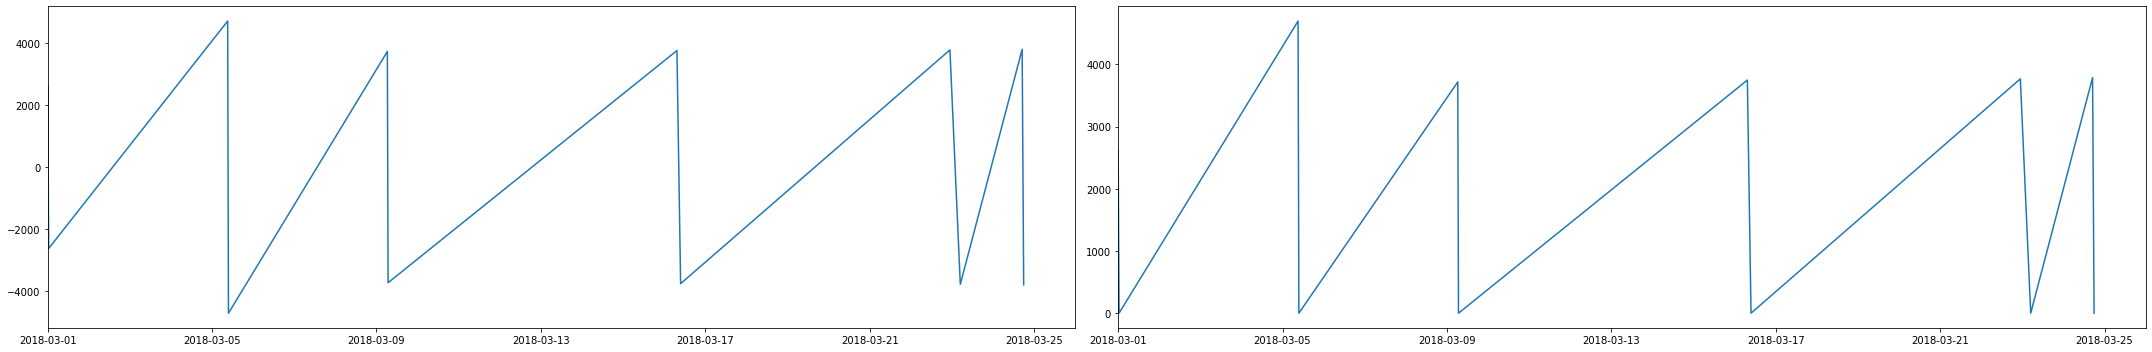

--------------------------------
0xd551234ae421e3bcba99a0da6d736074f22192ff
Wallet: 25 in, 5280 out


<Figure size 432x288 with 0 Axes>

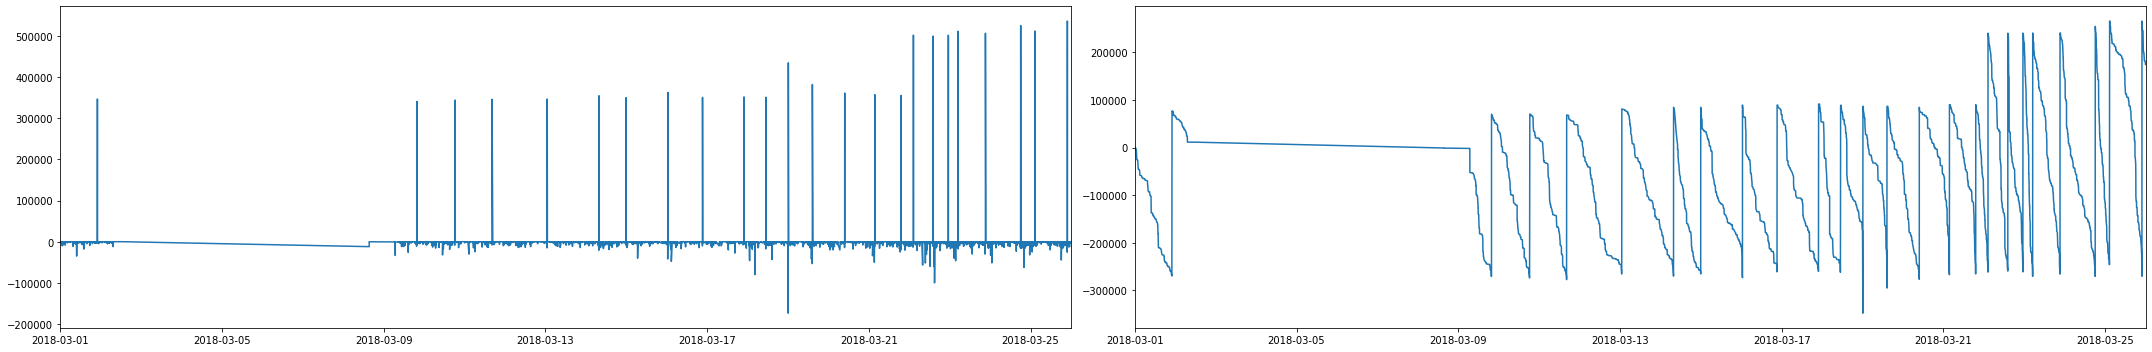

--------------------------------
0xe44d7950c149db9461cb06ca0c75299e0b454529
Wallet: 2 in, 0 out


<Figure size 432x288 with 0 Axes>

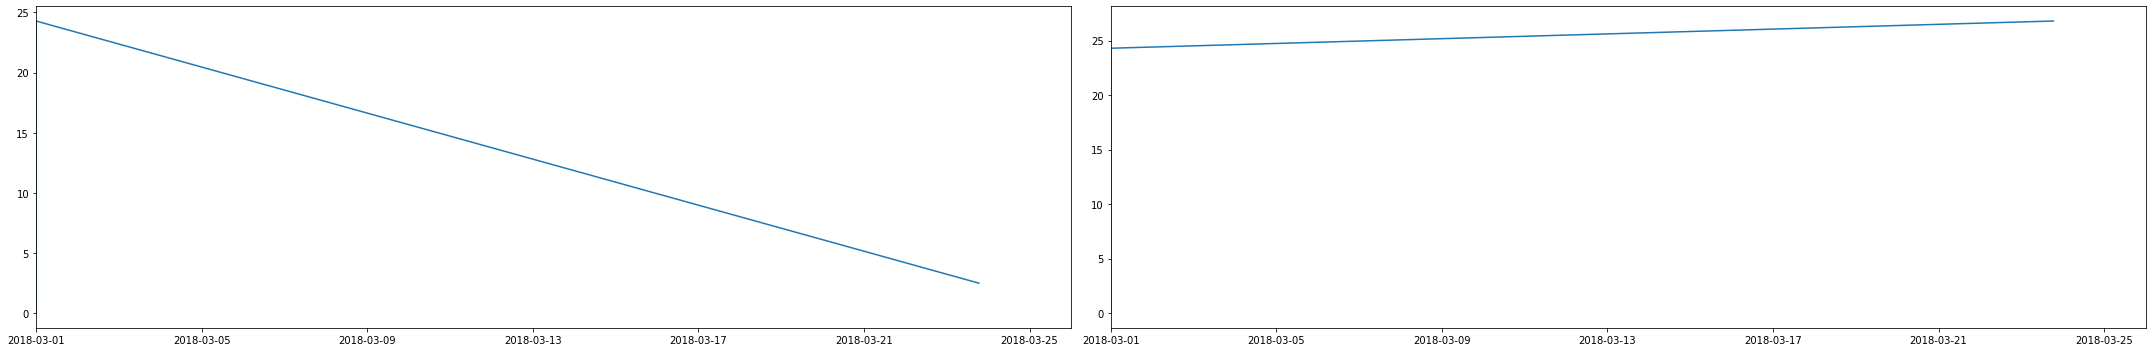

--------------------------------
0xd0a6e6c54dbc68db5db3a091b171a77407ff7ccf
Smart Contract: 54 in, 11209 out


<Figure size 432x288 with 0 Axes>

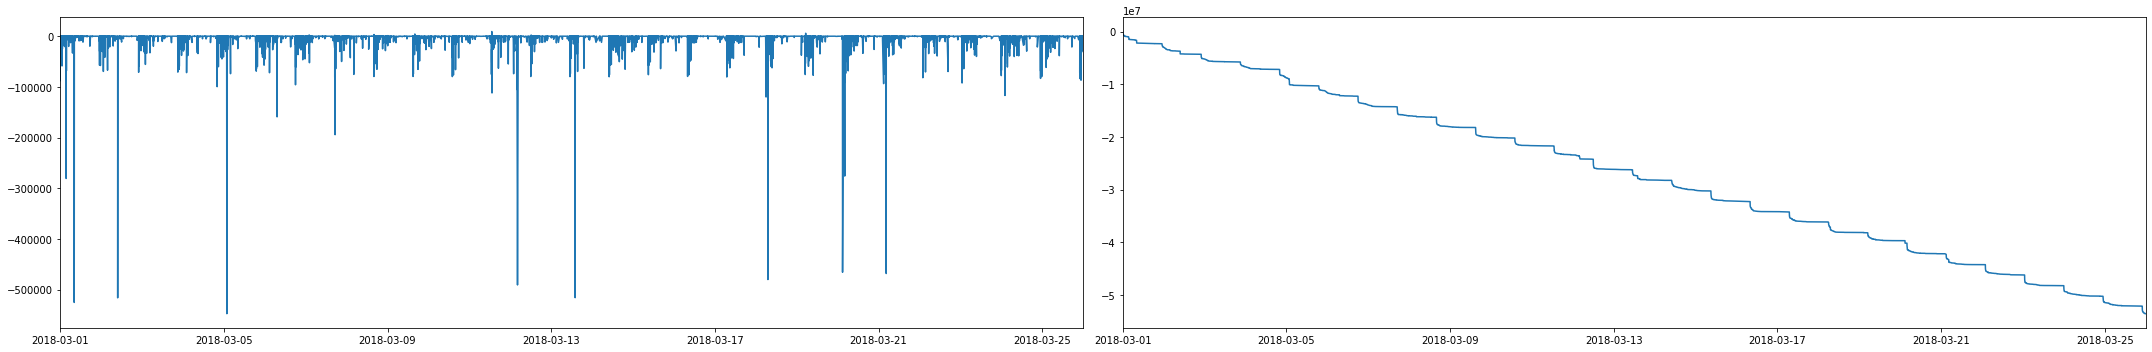

--------------------------------
0xf45c66597b082600a08f88162c8ba550b01d5b92
Wallet: 3 in, 7 out


<Figure size 432x288 with 0 Axes>

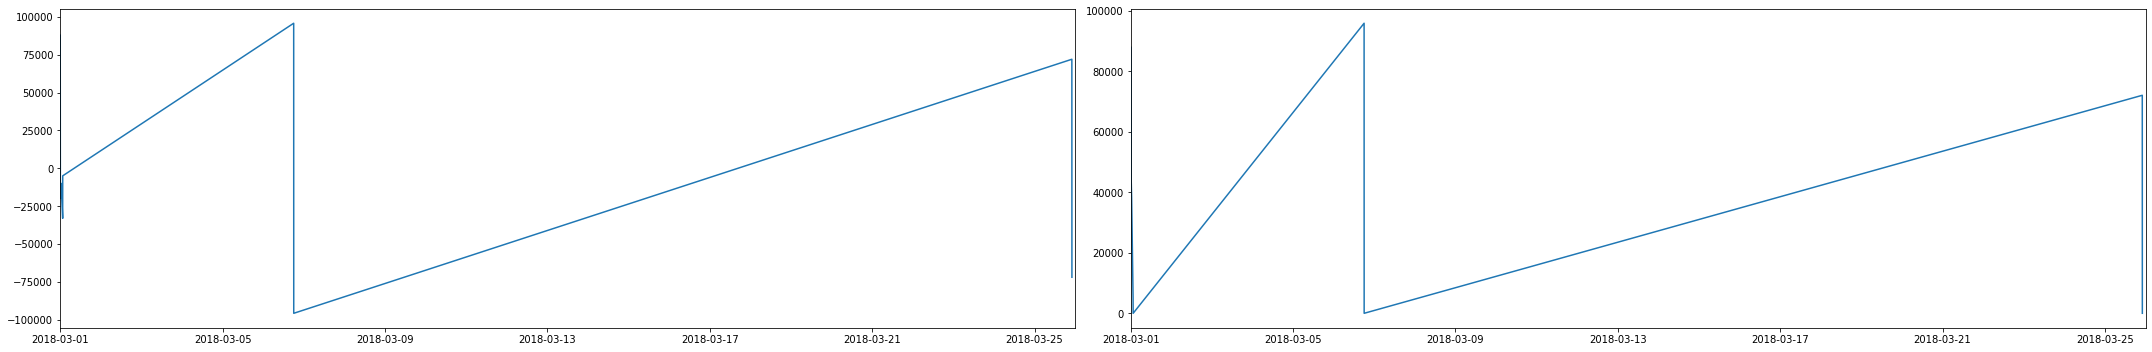

--------------------------------
0x19fc7f9d45efc23ec917c38b30b577e864060e63
Wallet: 27 in, 27 out


<Figure size 432x288 with 0 Axes>

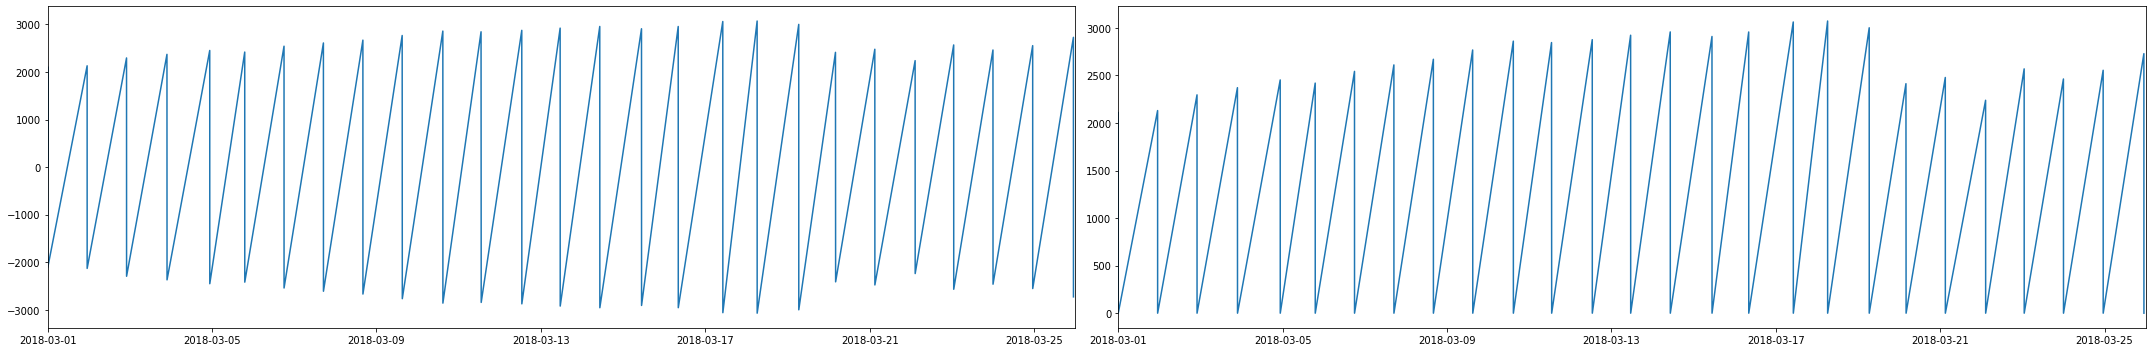

--------------------------------
0x13a5c64aa6864c7a17a78fb34be3e92271d1e1b6
Wallet: 5 in, 0 out


<Figure size 432x288 with 0 Axes>

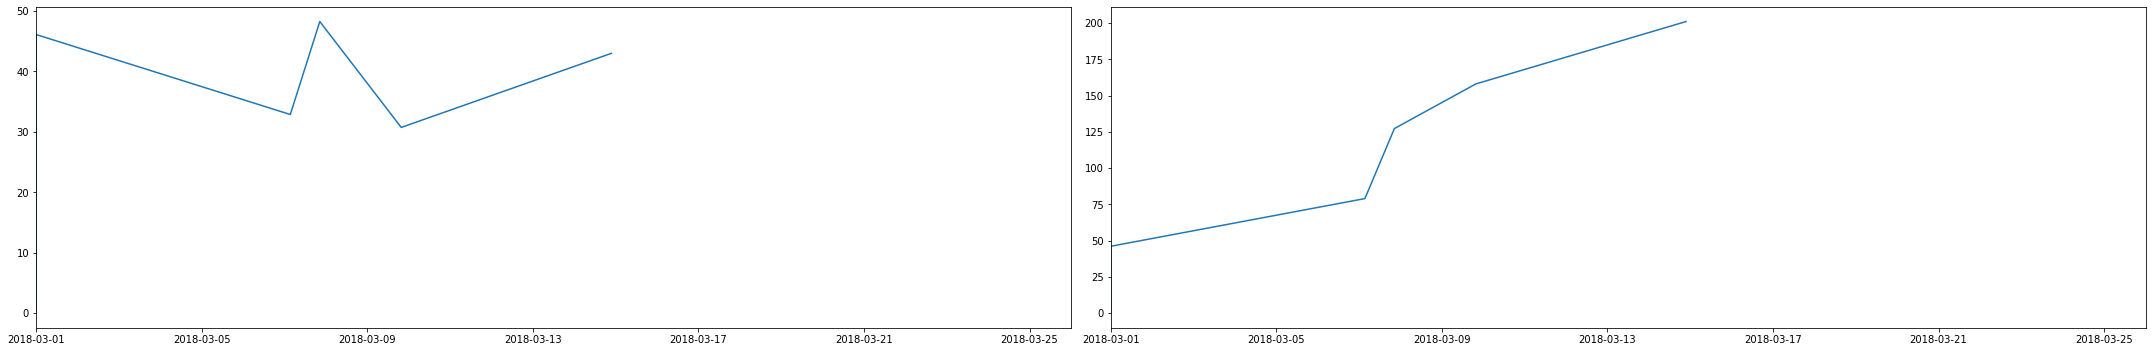

--------------------------------
0xe0cfa0b151e3503e6a672f05286a9587bf589617
Wallet: 2 in, 2 out


<Figure size 432x288 with 0 Axes>

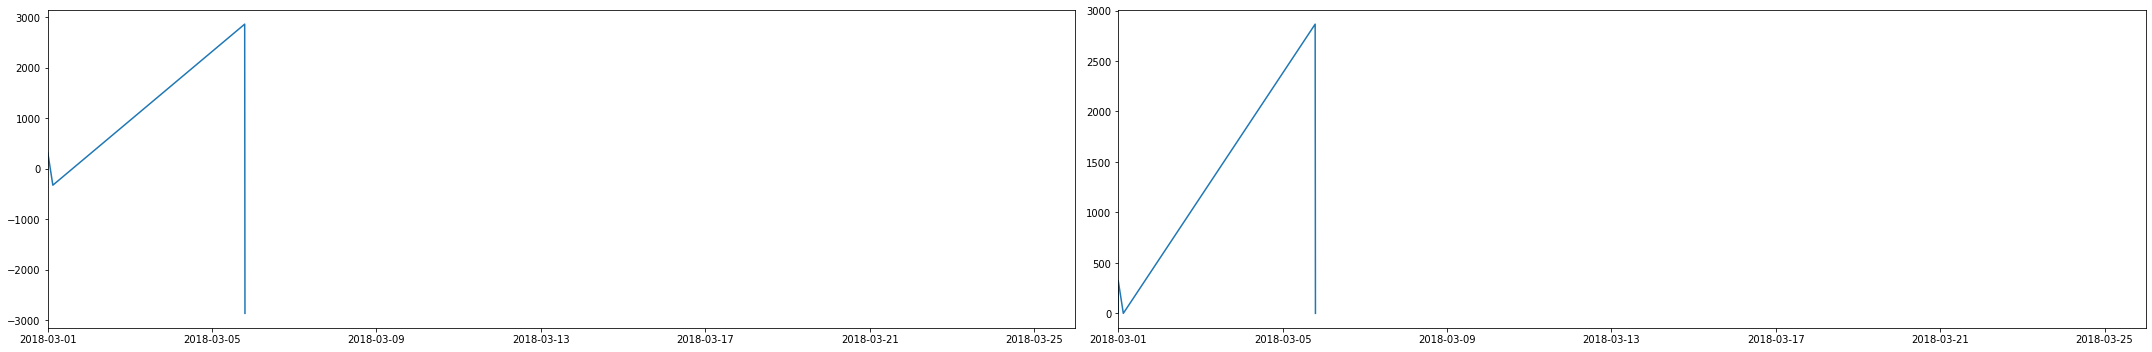

--------------------------------
0x693044efd127db30d1caf40bcf84dd1f00d5622b
Wallet: 6 in, 6 out


<Figure size 432x288 with 0 Axes>

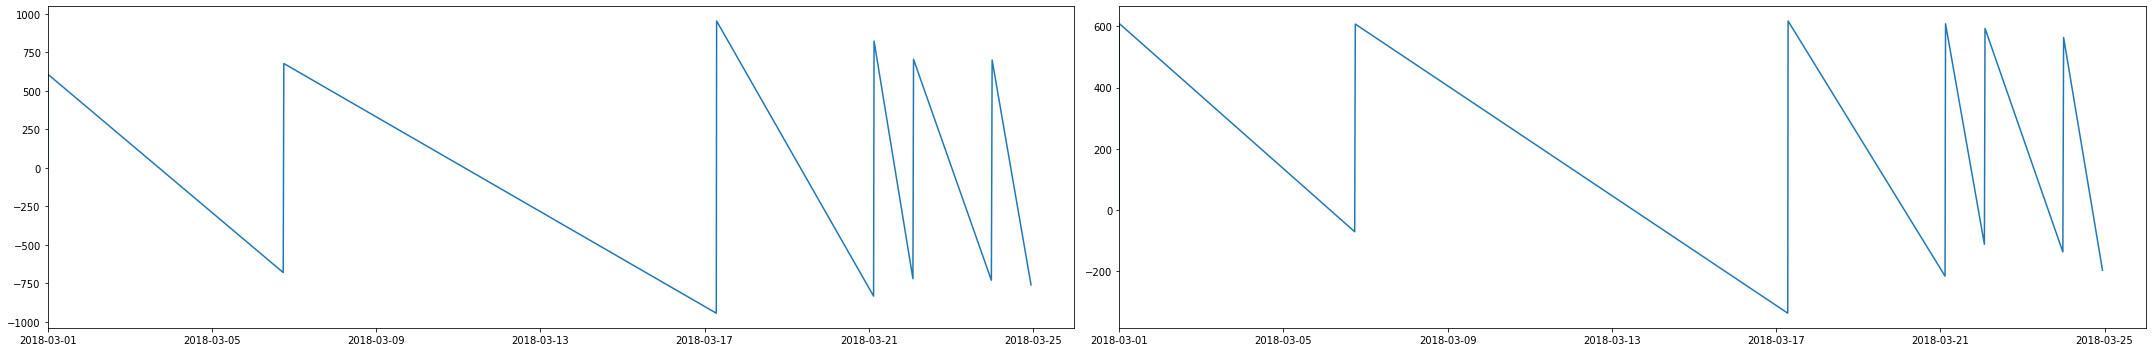

--------------------------------
0xe41b5548a9bb469d257b6aa17492cf3829c9b572
Wallet: 27 in, 39 out


<Figure size 432x288 with 0 Axes>

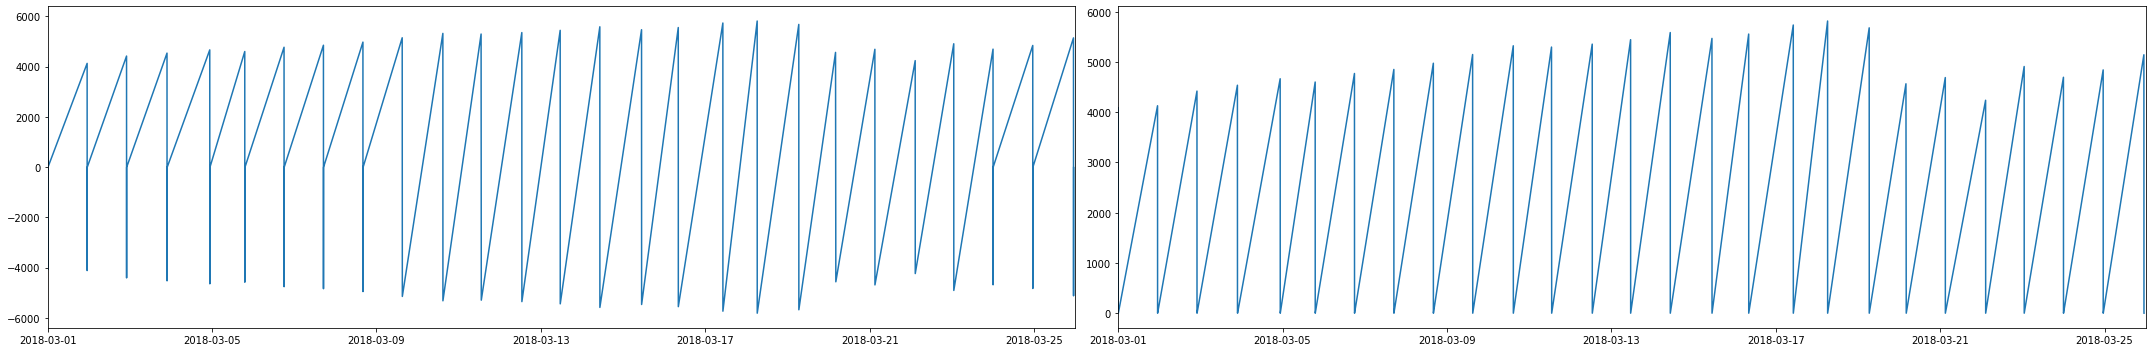

--------------------------------
0xef9c6dd8df24a0ac81fc0e26a5821eb3656ed971
Wallet: 5 in, 6 out


<Figure size 432x288 with 0 Axes>

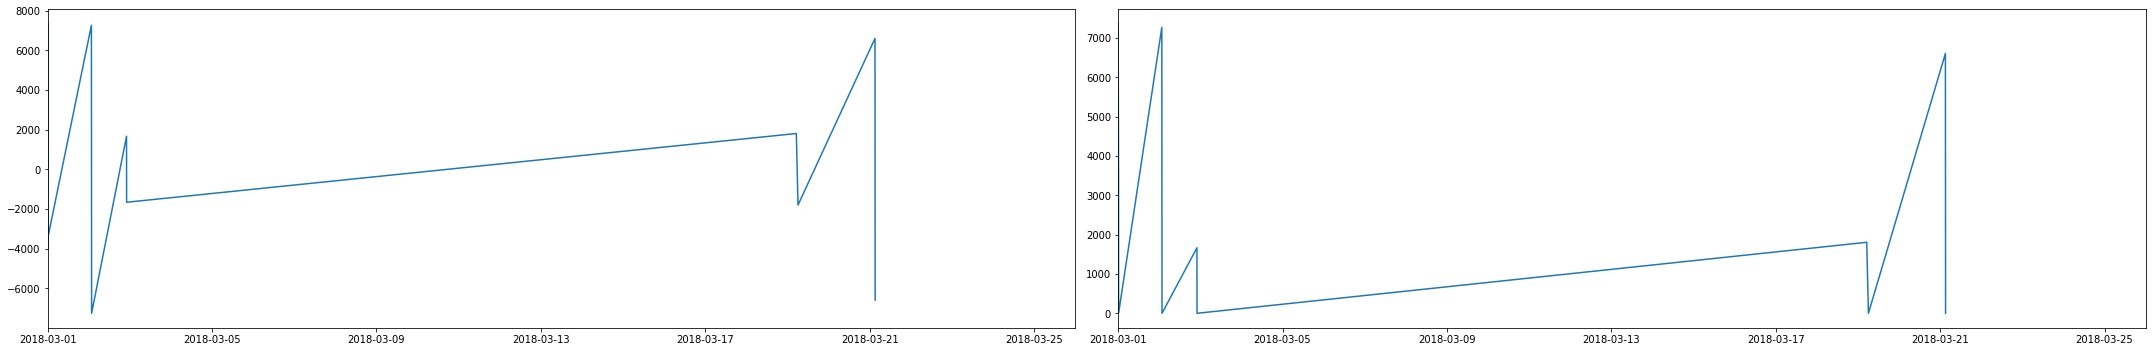

--------------------------------
0xda23cb54b992a1a0ad6d34f818984651ec468212
Wallet: 2 in, 5 out


<Figure size 432x288 with 0 Axes>

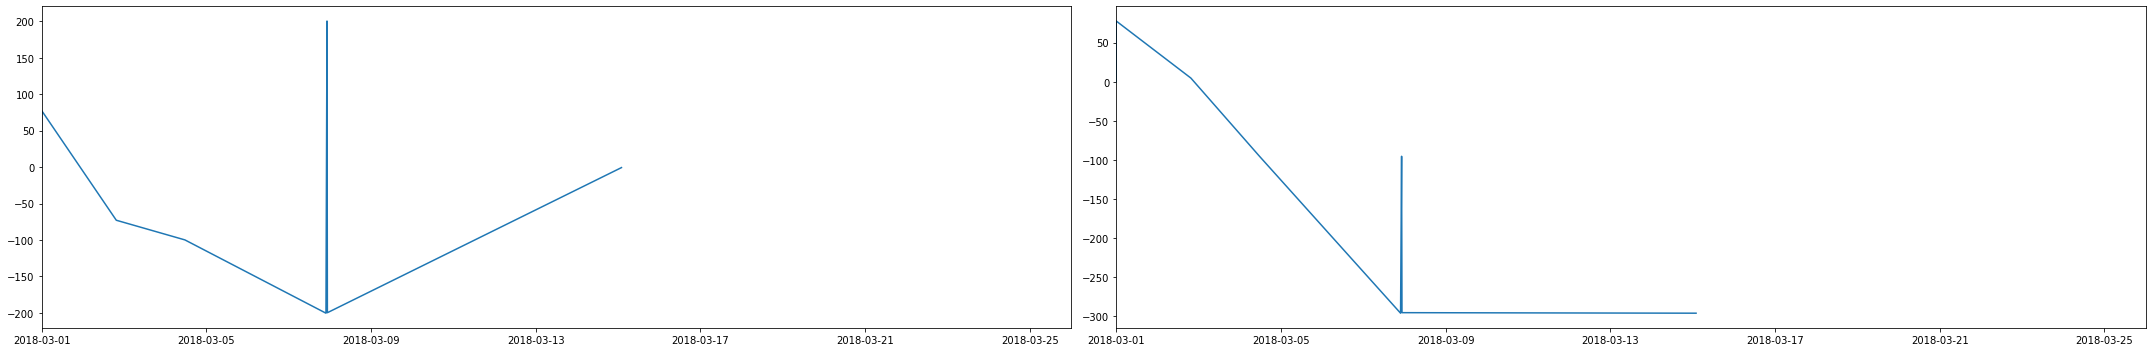

--------------------------------
0xdee87c73ad44fc75d00834698b073e7114aec4f5
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

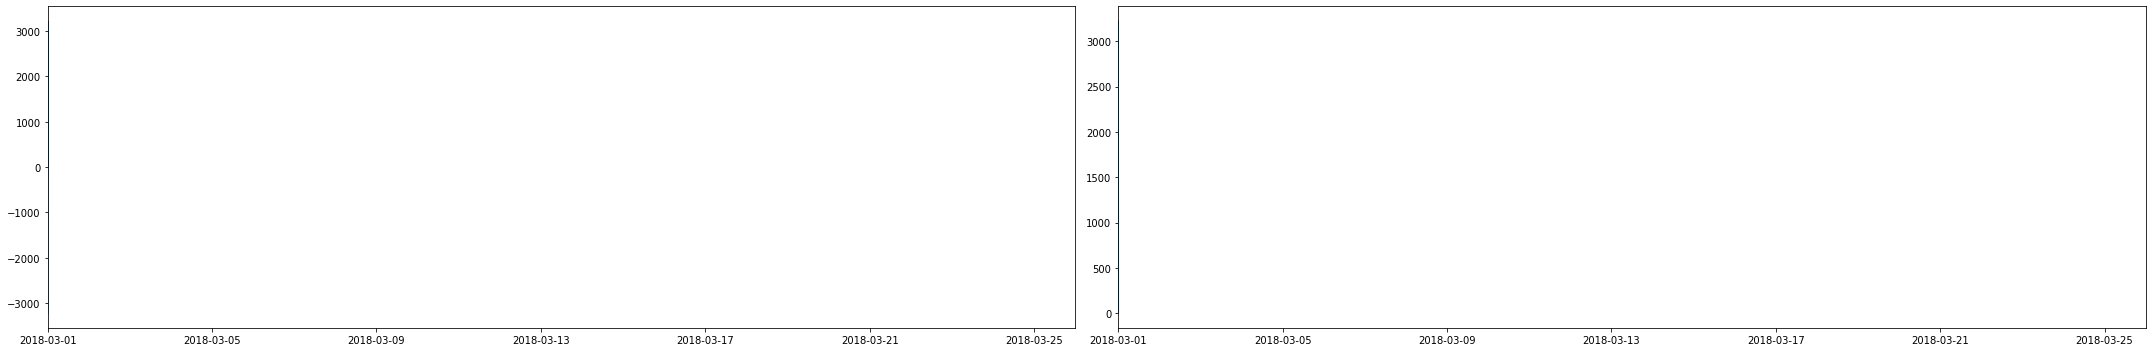

--------------------------------
0x4c637649044c8086672693c186a93a0013b3295a
Wallet: 24 in, 24 out


<Figure size 432x288 with 0 Axes>

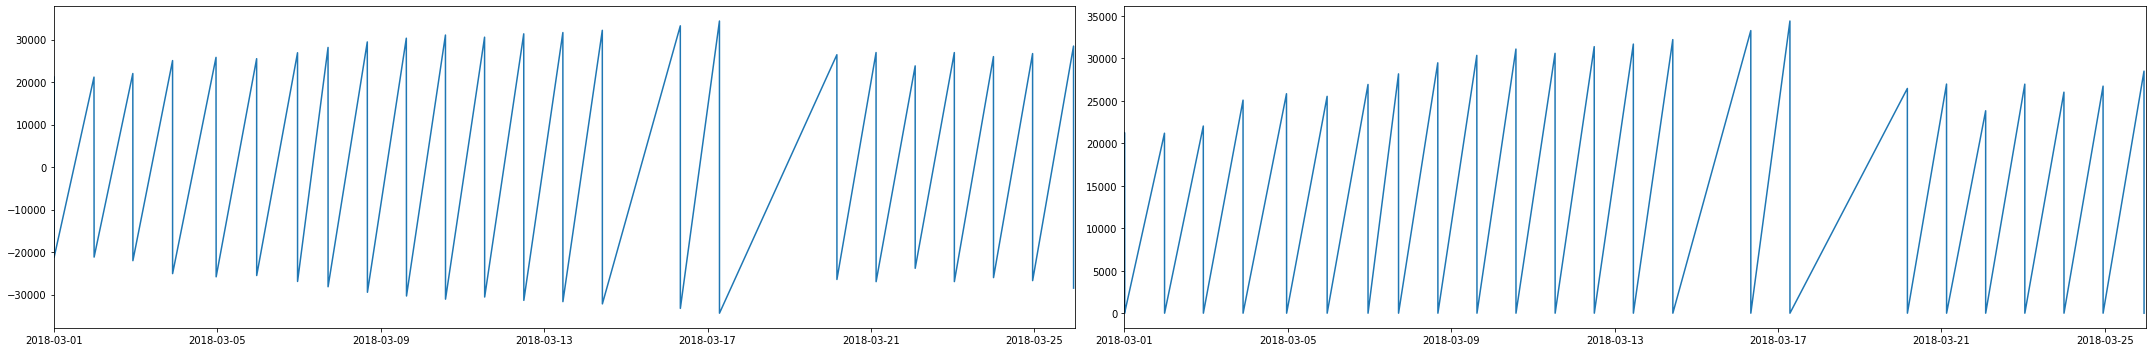

--------------------------------
0xc2ba4d759750769be926ed06a67ad0e68e983bfa
Wallet: 12 in, 11 out


<Figure size 432x288 with 0 Axes>

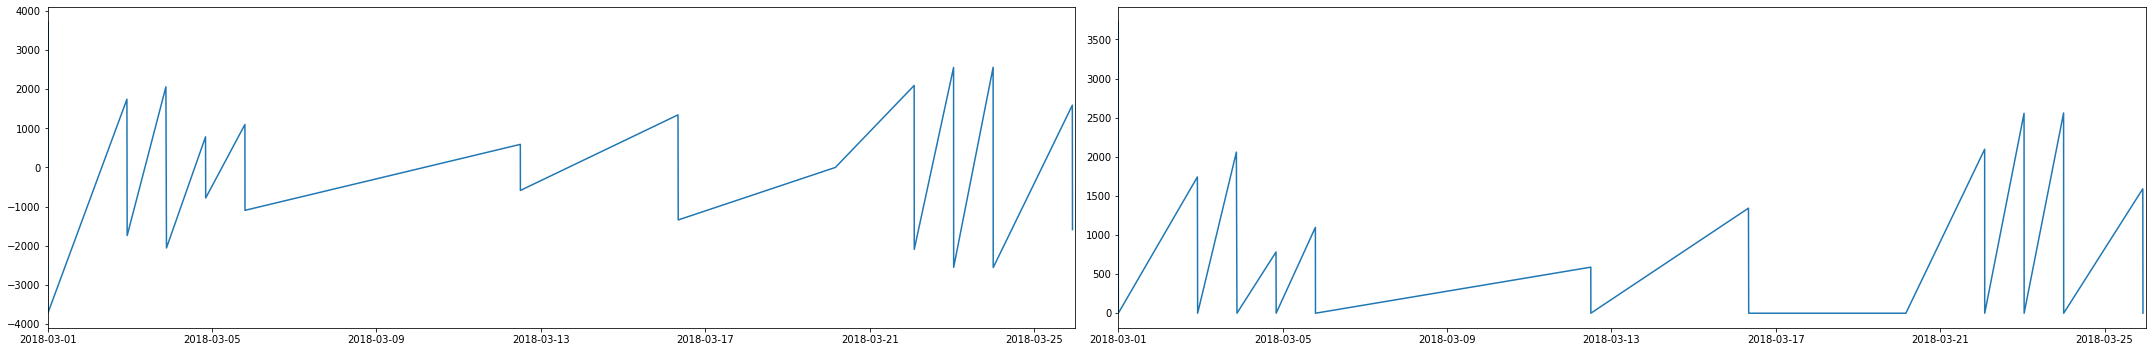

--------------------------------
0x95a057368a3cf2f07109681b9b080271da5dc7b5
Wallet: 22 in, 22 out


<Figure size 432x288 with 0 Axes>

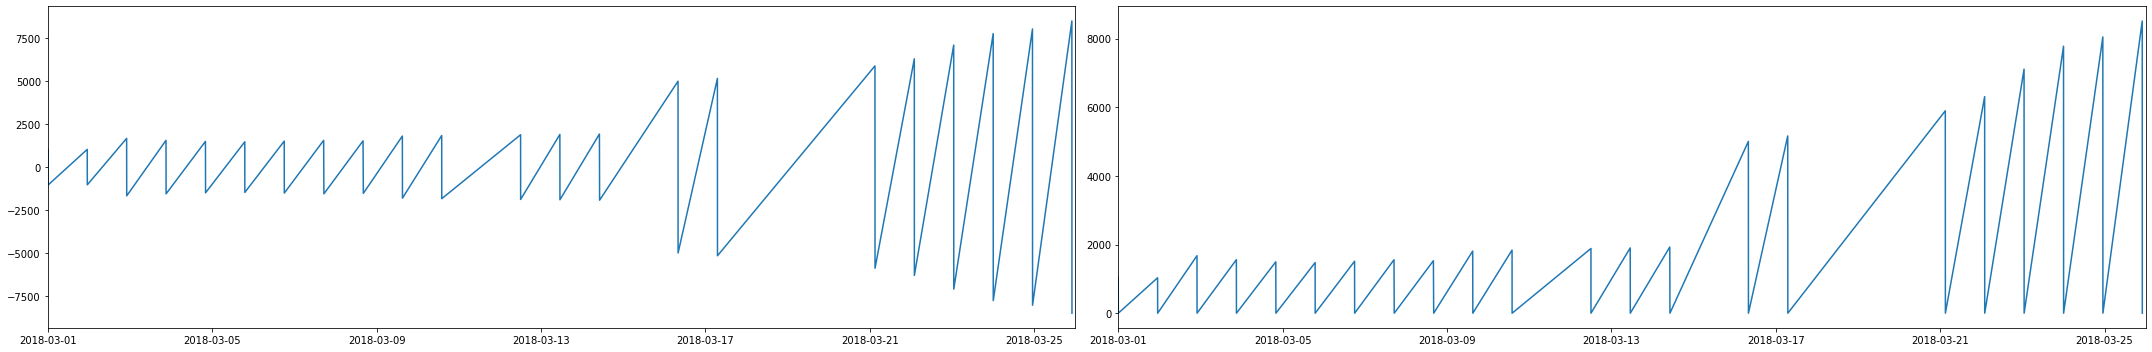

--------------------------------
0x5cec1e5fc9c3d9e73b62821ab8f94e044380a069
Wallet: 33 in, 56 out


<Figure size 432x288 with 0 Axes>

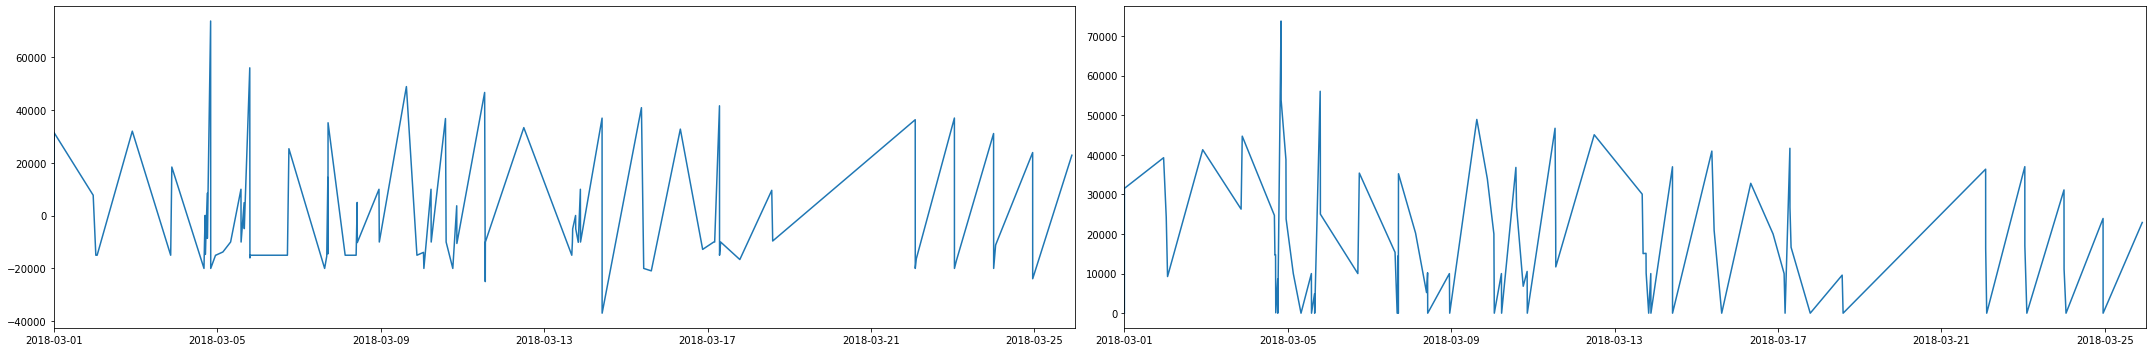

--------------------------------
0xde85dc06ffeed011bad578a93f1bd54cdcf20e80
Wallet: 24 in, 25 out


<Figure size 432x288 with 0 Axes>

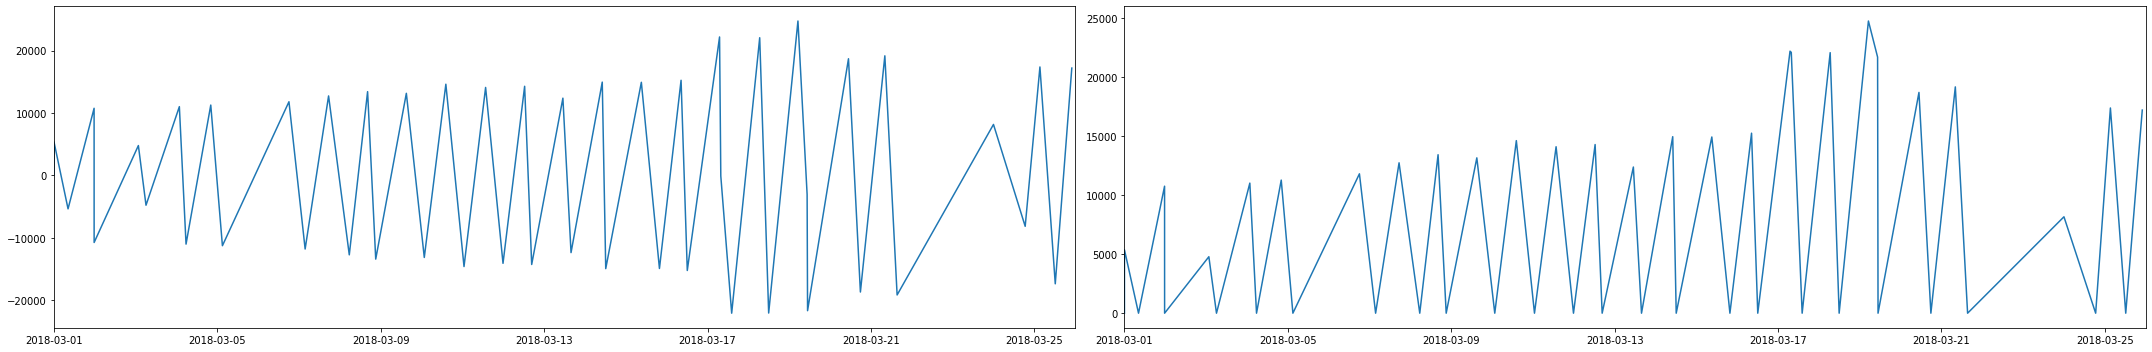

--------------------------------
0x6f7efda093401fb2c0b14dcaaf597acb3c54cc7a
Wallet: 17 in, 24 out


<Figure size 432x288 with 0 Axes>

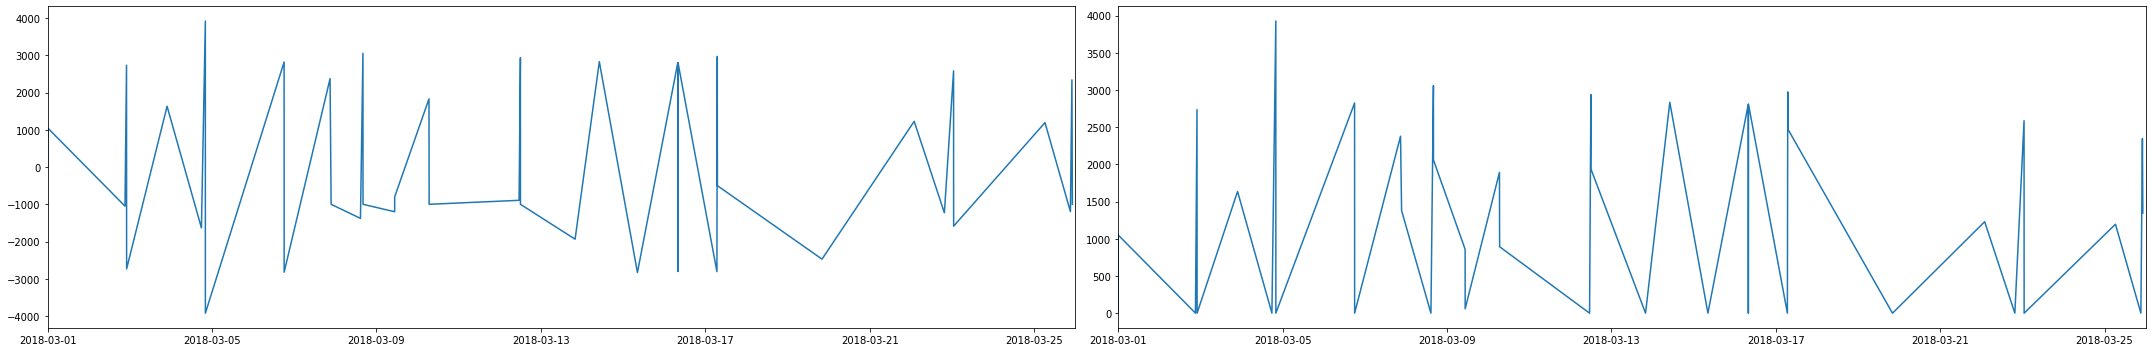

--------------------------------
0x4252804e26f1ae5705fce716a5808a11f765b5b6
Wallet: 0 in, 1 out


<Figure size 432x288 with 0 Axes>

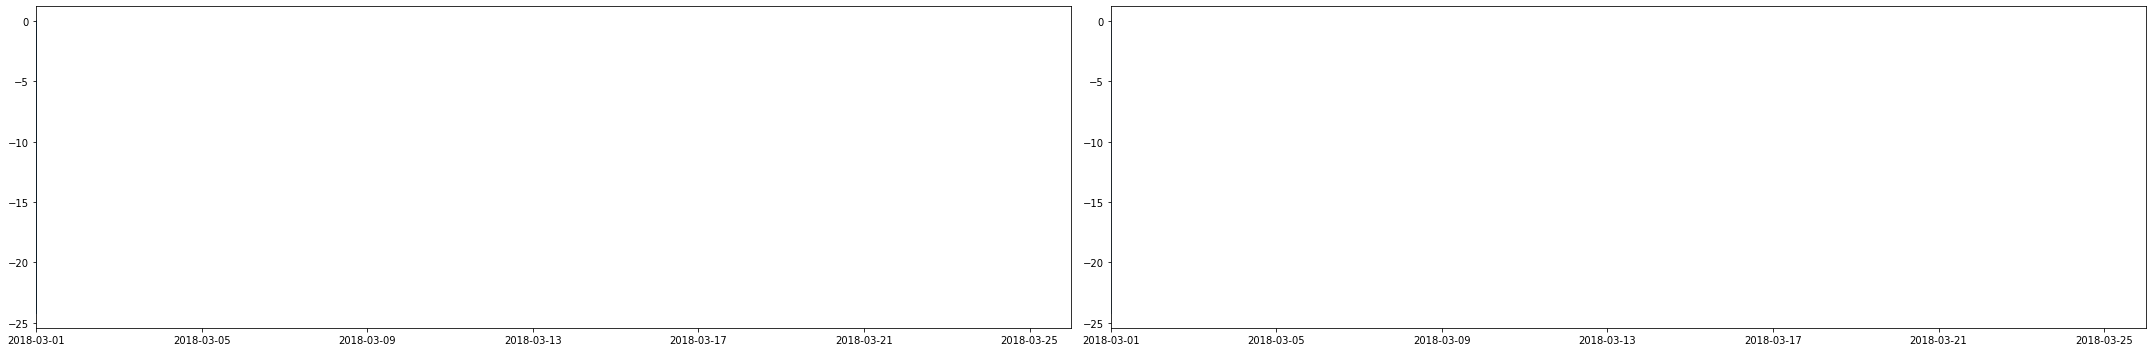

--------------------------------
0xb64fd79ecef7528964b4c5493e3d41a8903ce03d
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

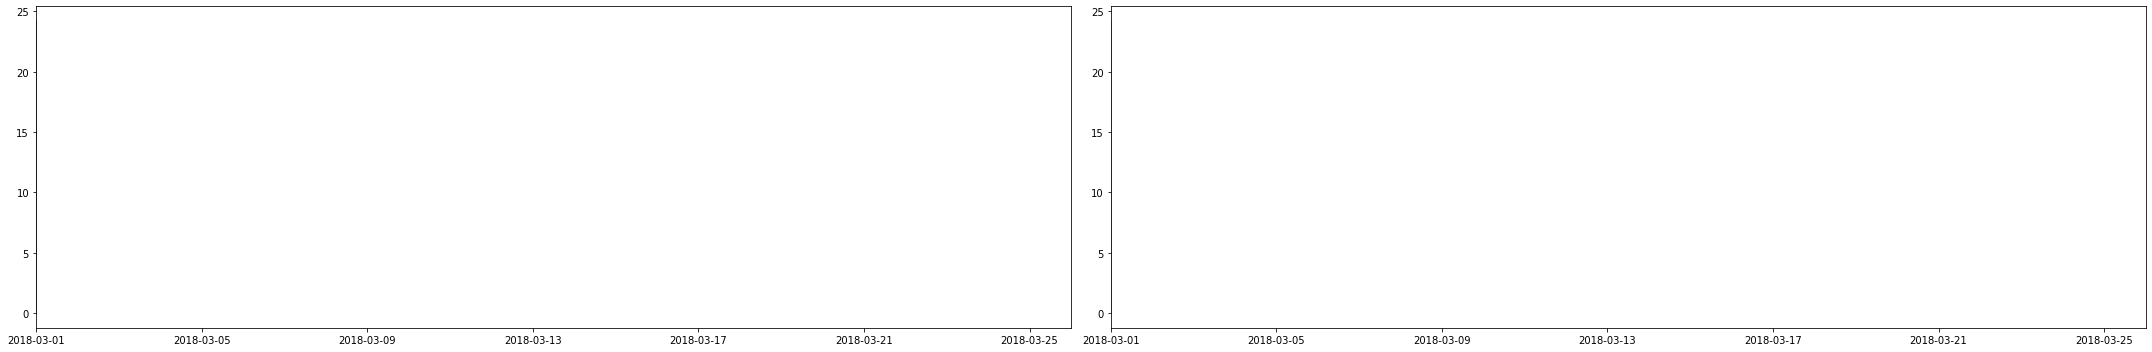

--------------------------------
0x3fdabbb26e0a059d23e3030f93bef1c544b4bf3e
Wallet: 27 in, 27 out


<Figure size 432x288 with 0 Axes>

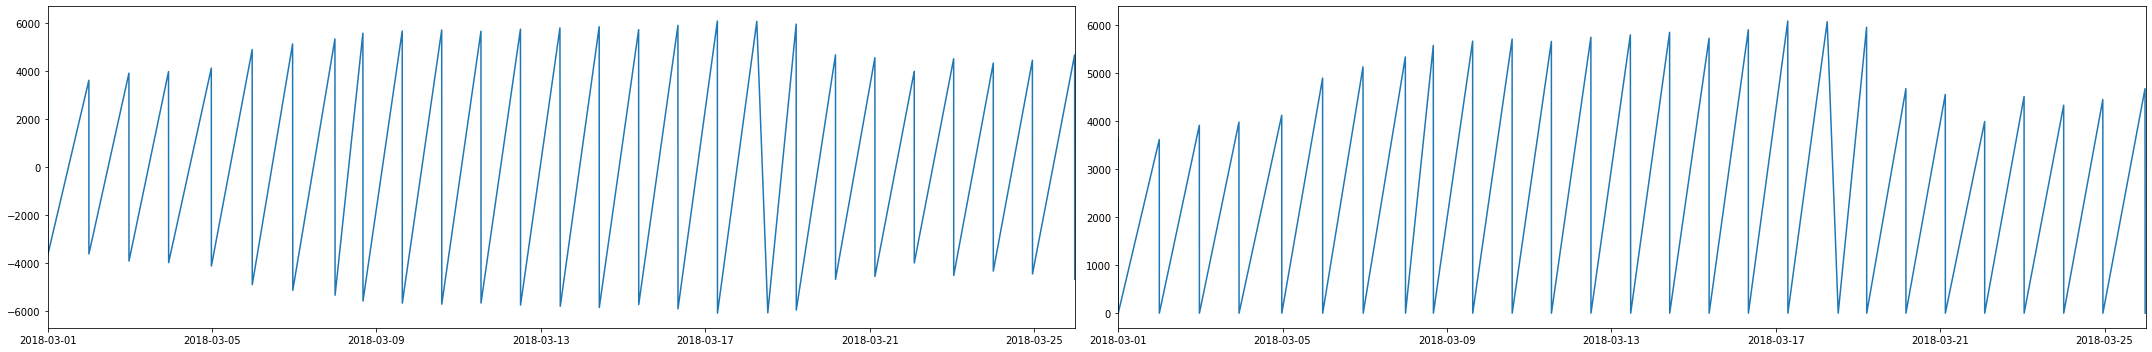

--------------------------------
0x4edb6a11a68bfa43ab1a8a37a47f6056e8bf1b19
Wallet: 7 in, 7 out


<Figure size 432x288 with 0 Axes>

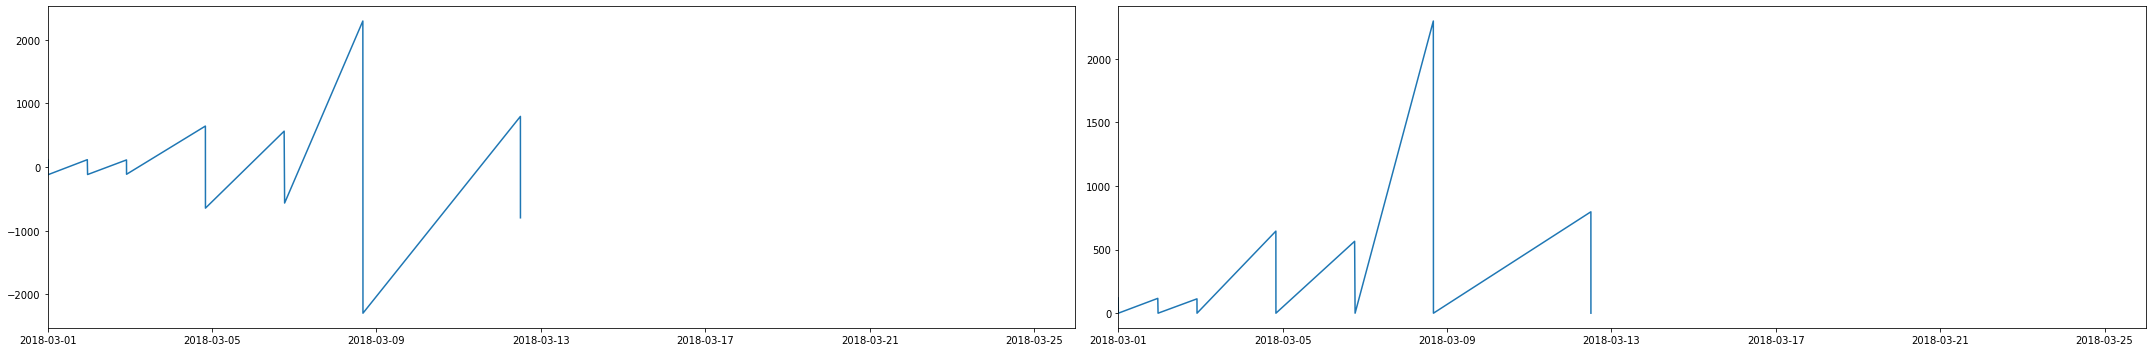

--------------------------------
0xd5023c94ebd780bfdd1e649654d0098fcc156d9b
Wallet: 10 in, 19 out


<Figure size 432x288 with 0 Axes>

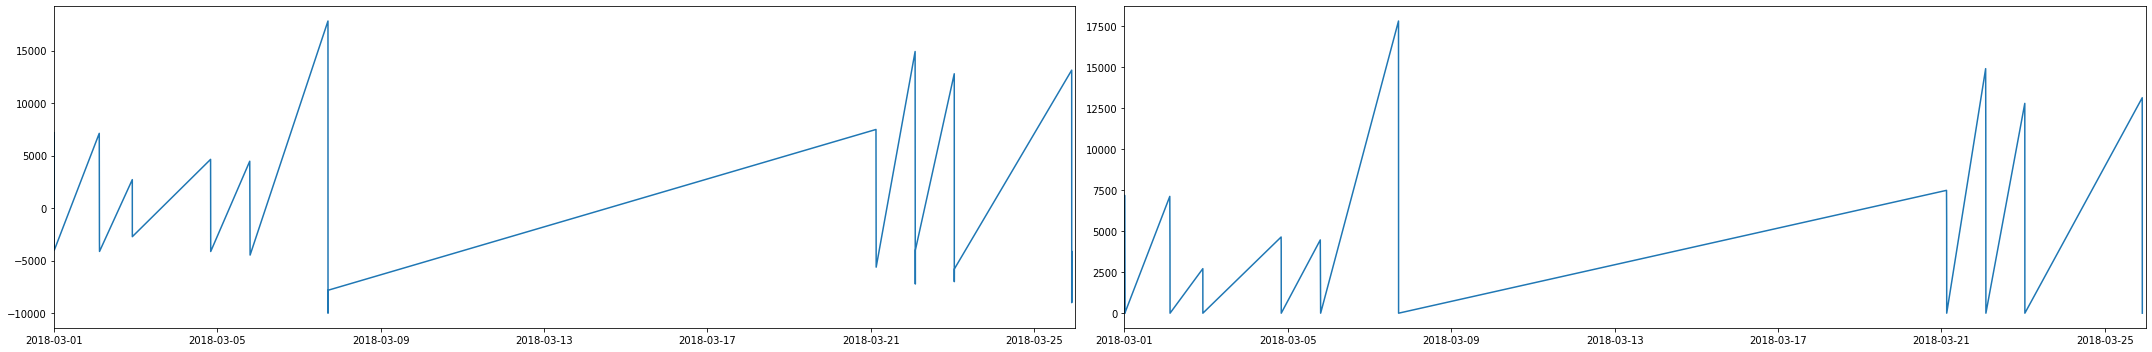

--------------------------------
0xbabe127164dab666f5350bb6799464fc947bf8a5
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

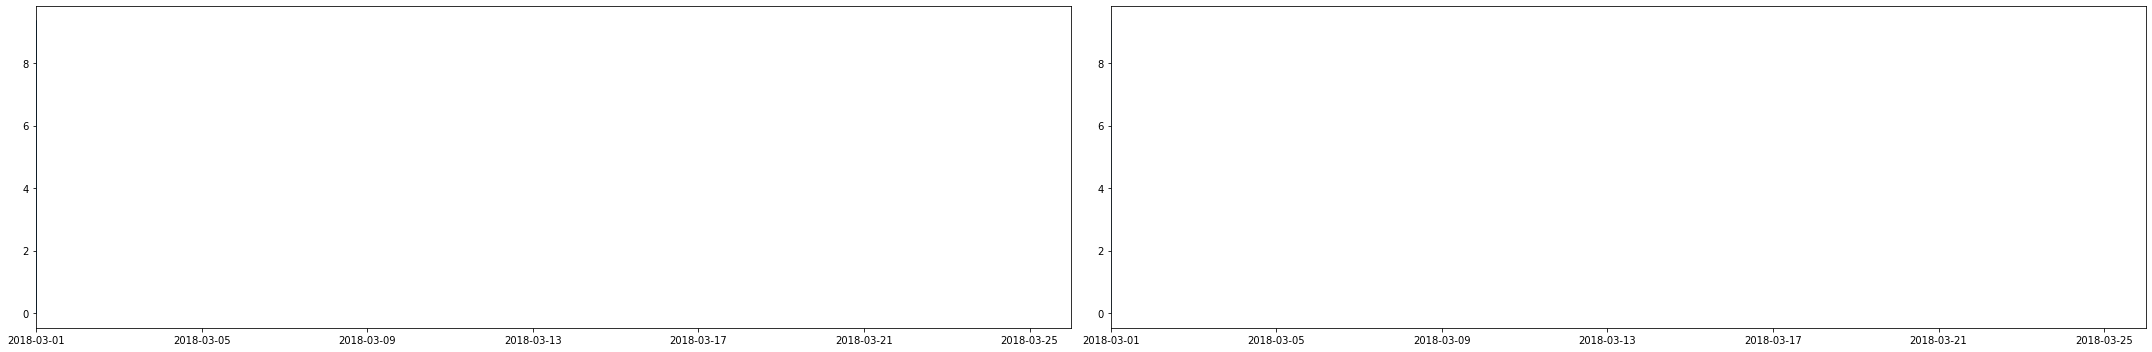

--------------------------------
0x6285dbdc0786a14cf1eb94288313e9e0abd81f9d
Wallet: 2 in, 0 out


<Figure size 432x288 with 0 Axes>

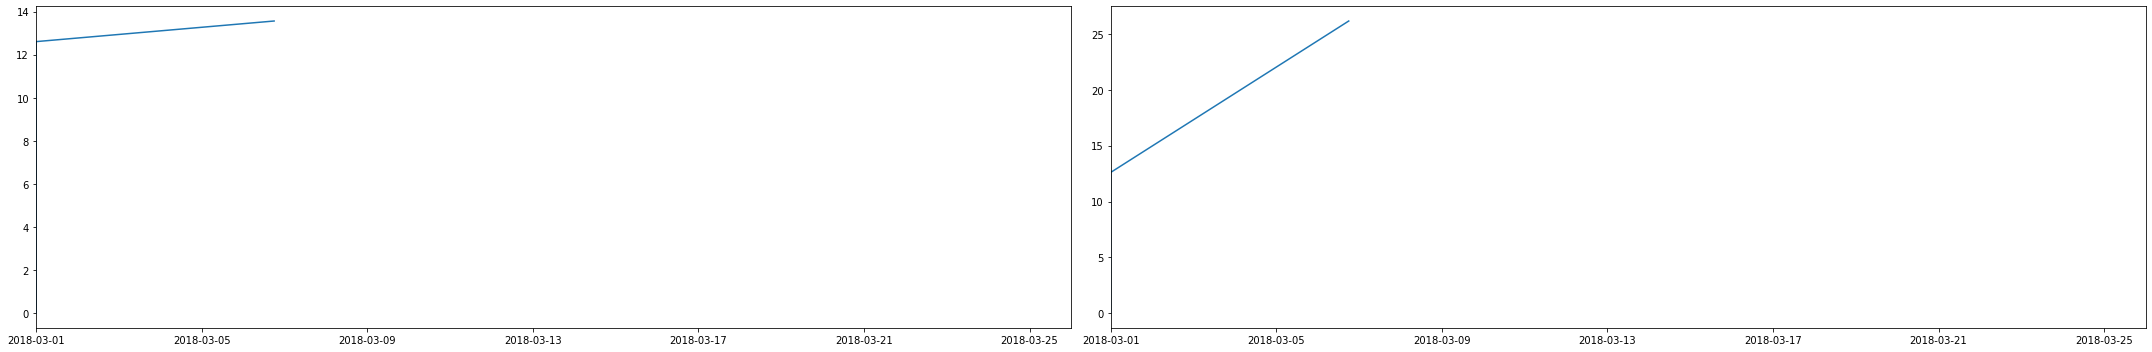

--------------------------------
0x87cc1b8232b9e358add69031cf7add75de3cf29c
Wallet: 2 in, 2 out


<Figure size 432x288 with 0 Axes>

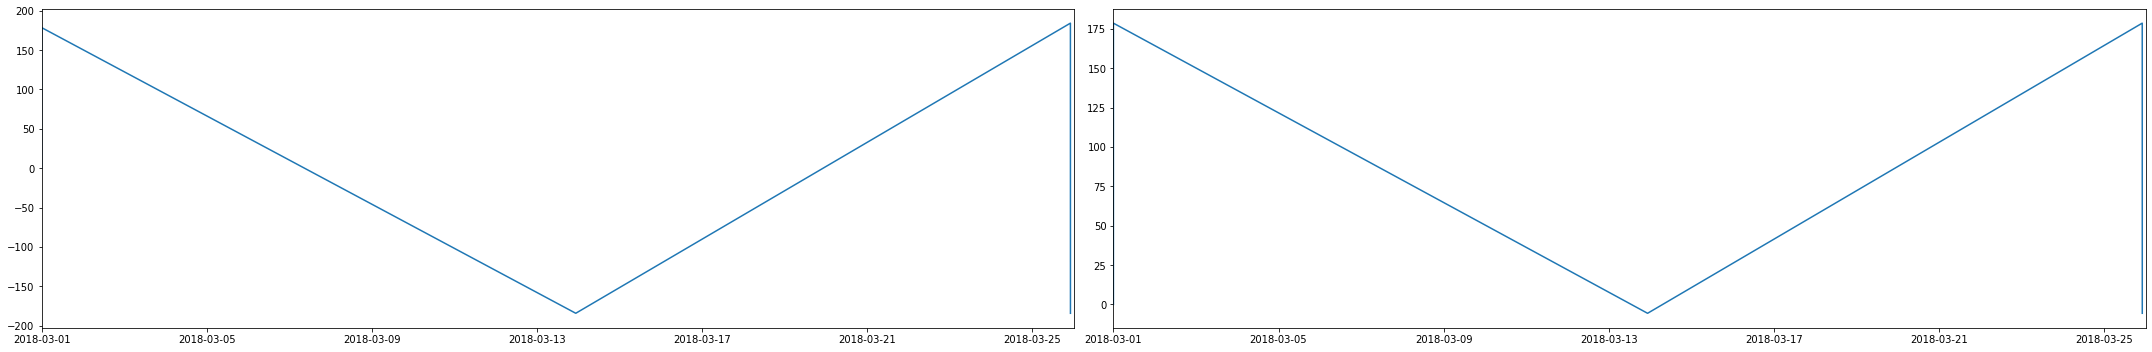

--------------------------------
0xfd35290833d239cdf7962f7d50752f183570772c
Wallet: 23 in, 25 out


<Figure size 432x288 with 0 Axes>

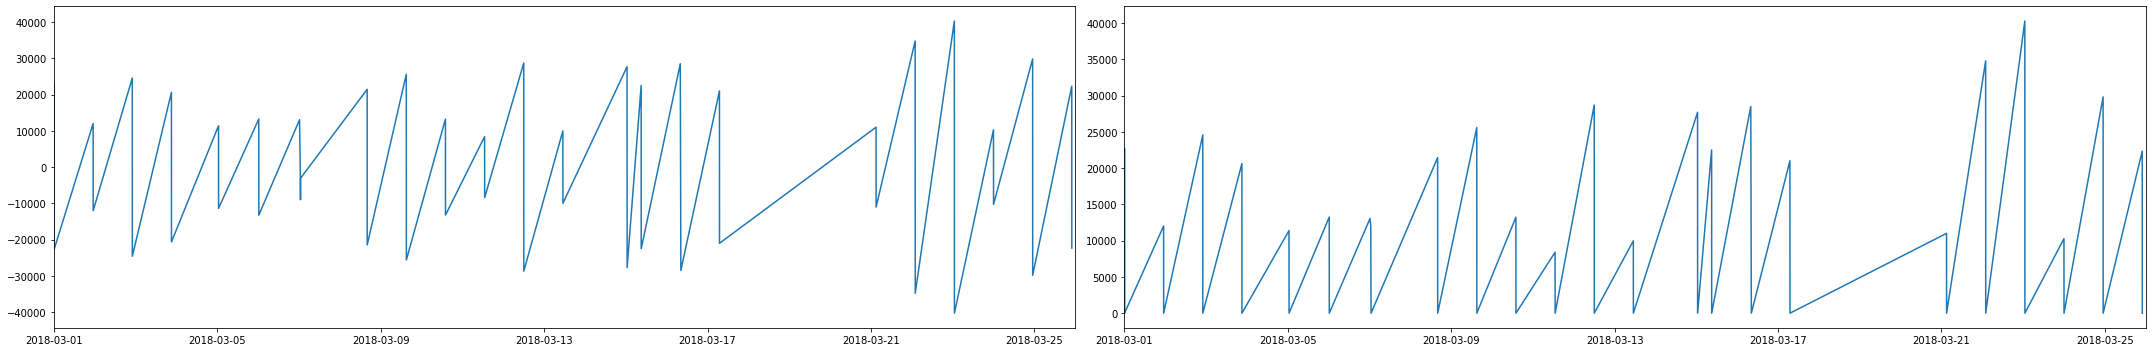

--------------------------------
0x7c79d1652867f83ecf08f0e0ad6e35f2267c3a94
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

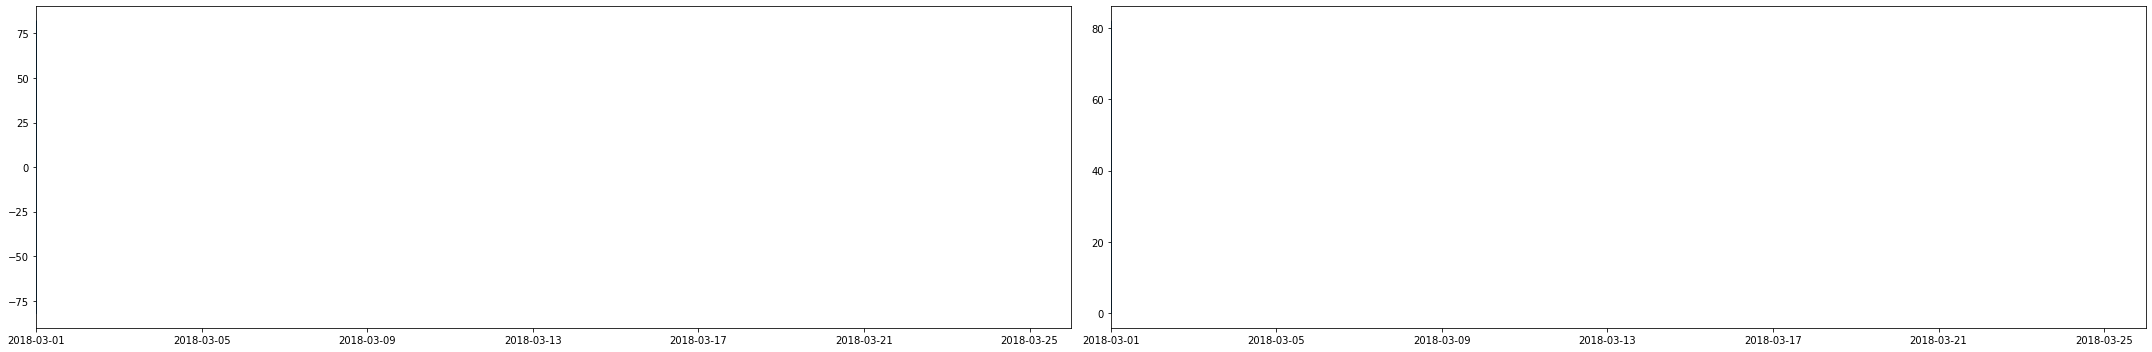

--------------------------------
0xa3155991e598bdb0b73efa62a56c3167d6fd4669
Wallet: 6 in, 6 out


<Figure size 432x288 with 0 Axes>

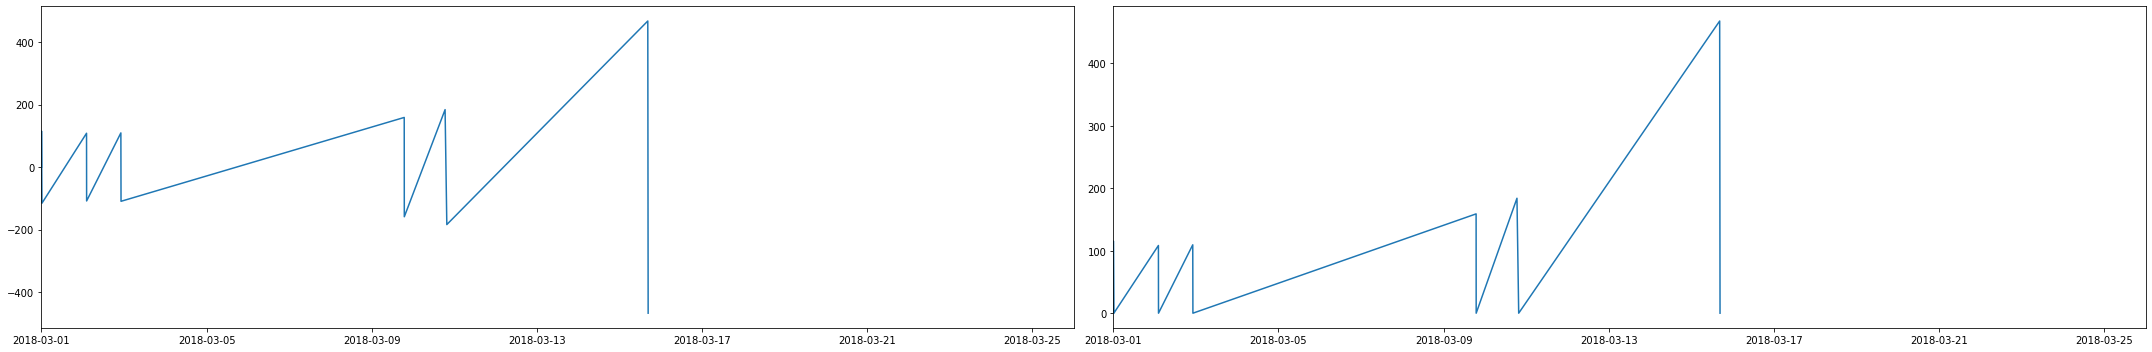

--------------------------------
0x97009cdd435629e1a45df4b8f1f4d00bd7f58b8f
Wallet: 10 in, 10 out


<Figure size 432x288 with 0 Axes>

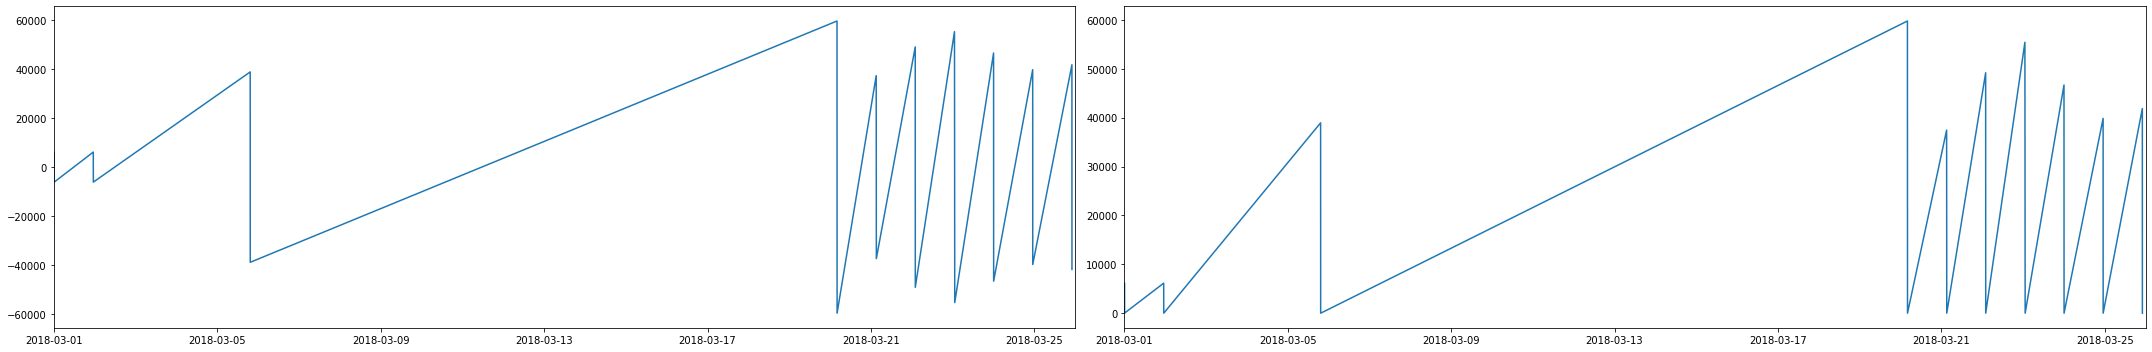

--------------------------------
0x593c3f0ba061f3da6760797bf154ceeadff5bc2c
Wallet: 19 in, 19 out


<Figure size 432x288 with 0 Axes>

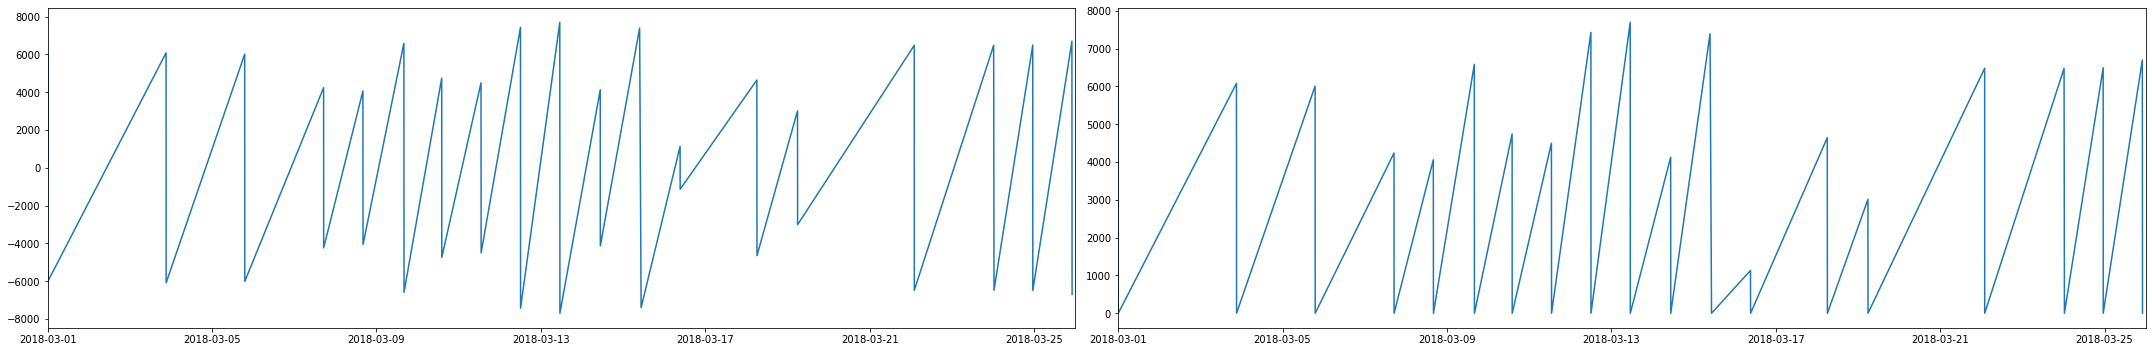

--------------------------------
0x55d8fdecb6f61250179ad6615069e2ca5ca1274c
Wallet: 21 in, 26 out


<Figure size 432x288 with 0 Axes>

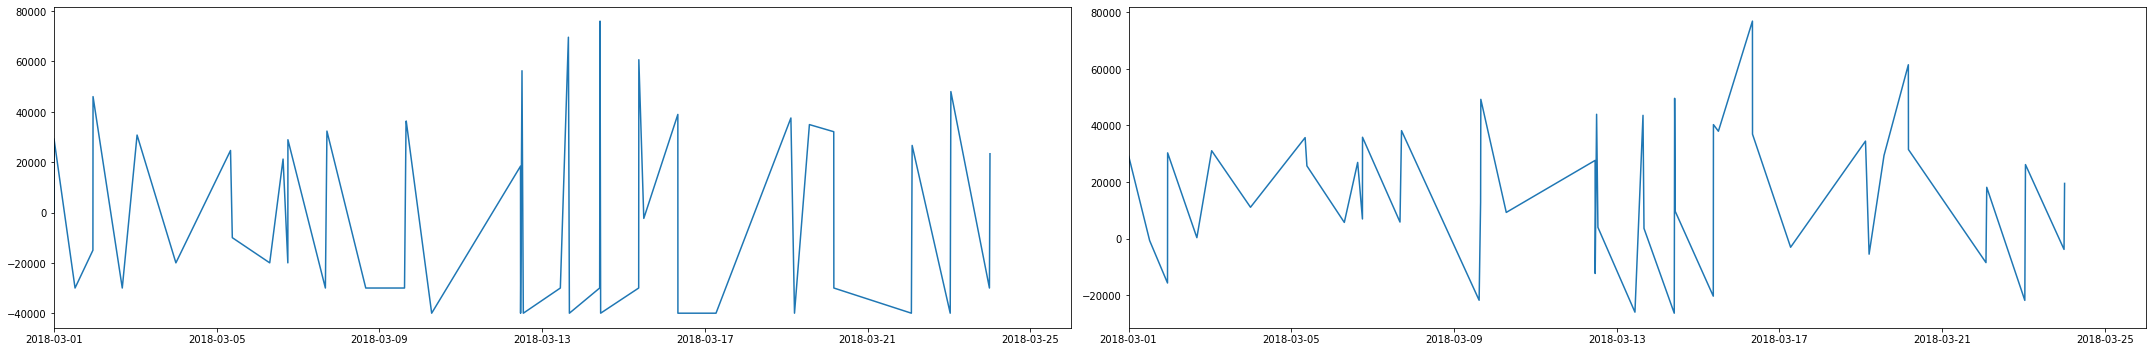

--------------------------------
0x5815bc26d8a69a46f946161133829731e22e4df4
Wallet: 32 in, 32 out


<Figure size 432x288 with 0 Axes>

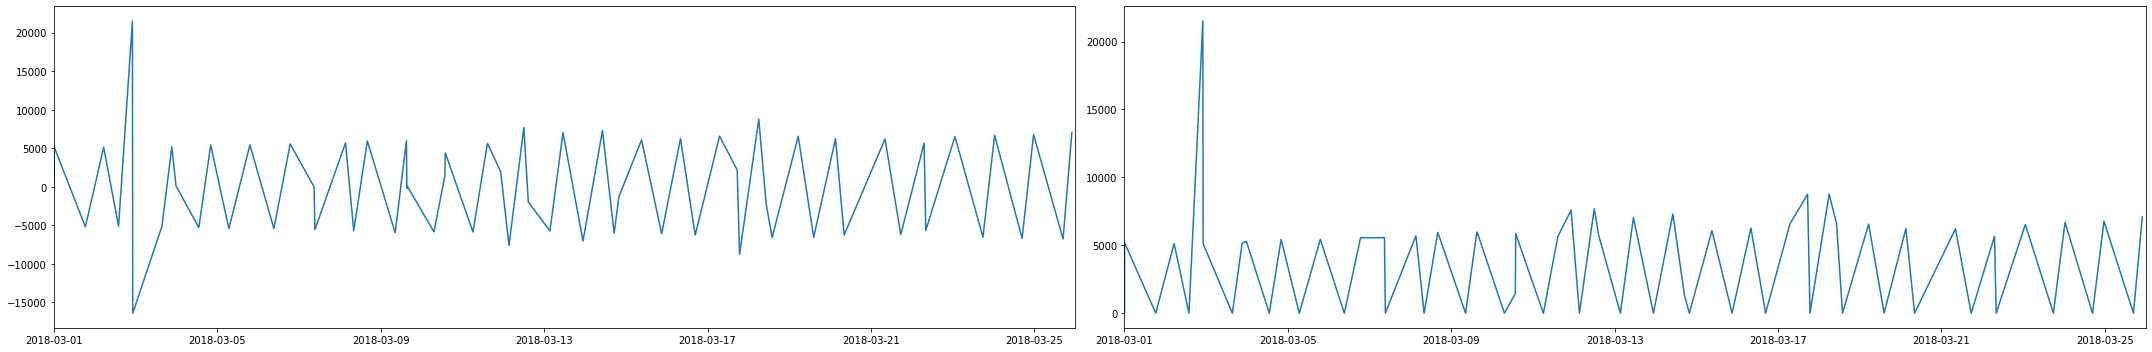

--------------------------------
0xdca701ffcf317da9ed668acc303e3236f90ae5b2
Wallet: 39 in, 24 out


<Figure size 432x288 with 0 Axes>

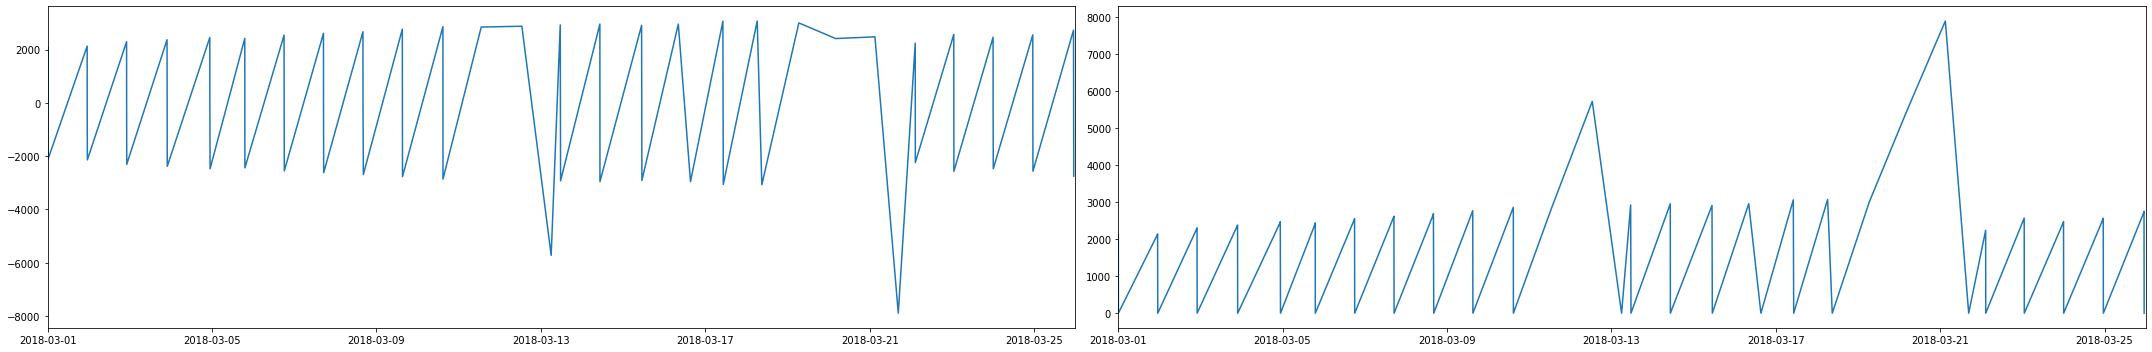

--------------------------------
0xe0a95d20334e211485202ab137a7b7ee112592f1
Wallet: 0 in, 1 out


<Figure size 432x288 with 0 Axes>

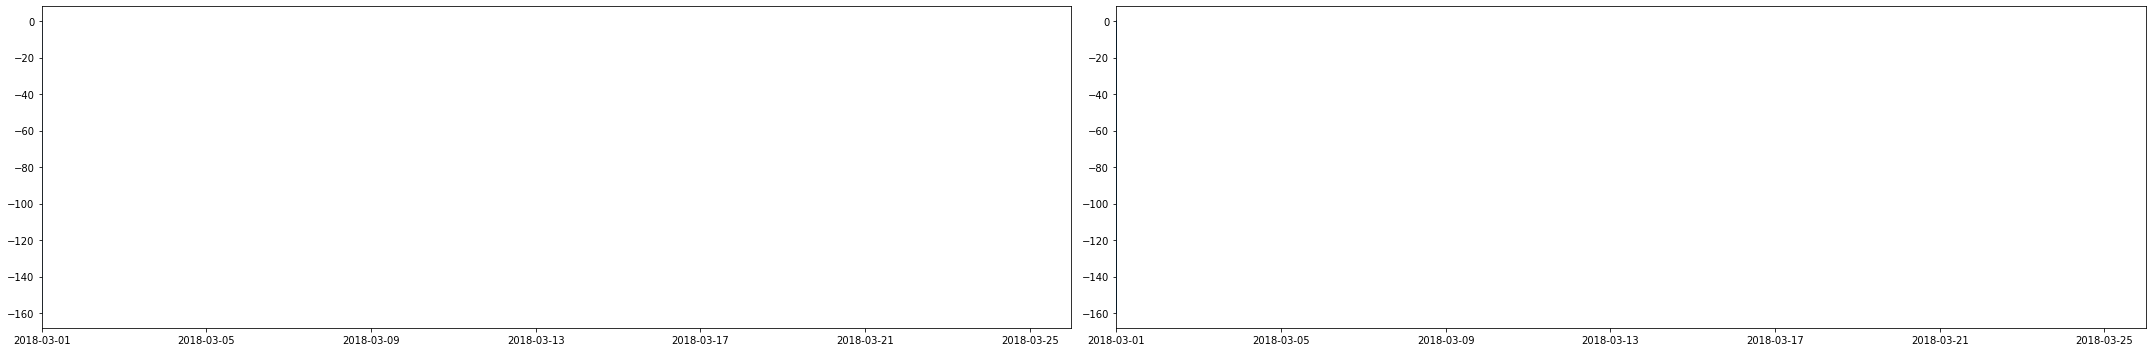

--------------------------------
0xa55eadbfd593a5dfe0c4177d21c8b47ecfb91139
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

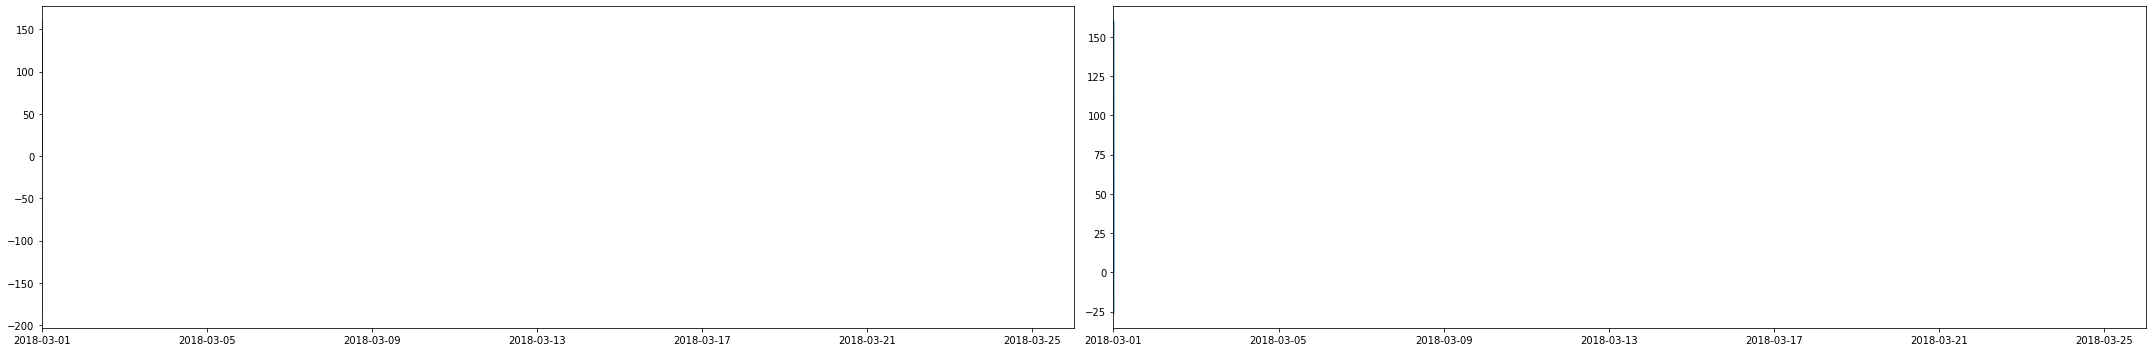

--------------------------------
0x9b791ad8c5b33f913f7e01c7fb533e601e66dc32
Wallet: 21 in, 22 out


<Figure size 432x288 with 0 Axes>

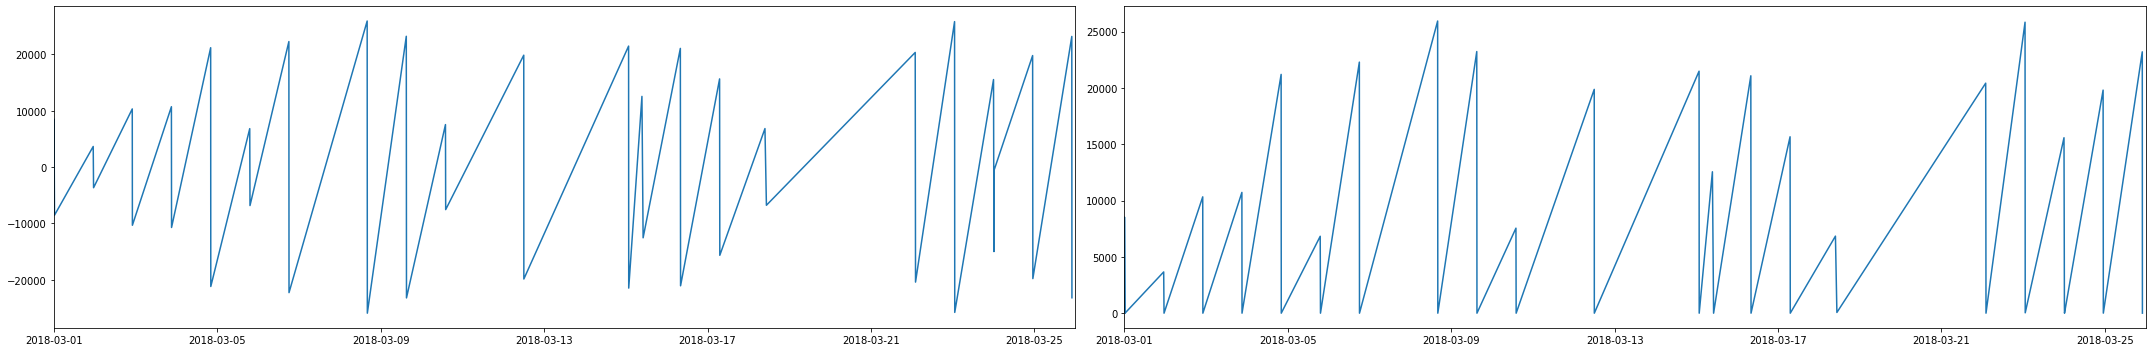

--------------------------------
0xb7595d4a83d801a37453e7e8efb2a2769da59a48
Wallet: 12 in, 12 out


<Figure size 432x288 with 0 Axes>

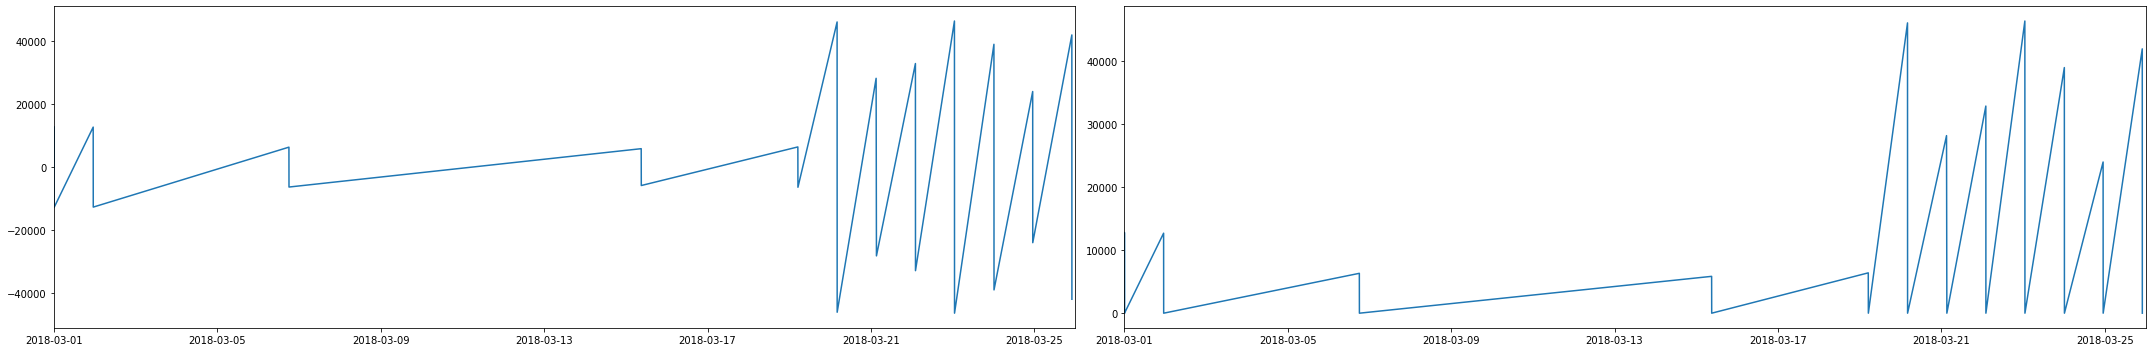

--------------------------------
0x5829fd6405ecb20c7c8fe28c6efc3680bee4add6
Wallet: 6 in, 7 out


<Figure size 432x288 with 0 Axes>

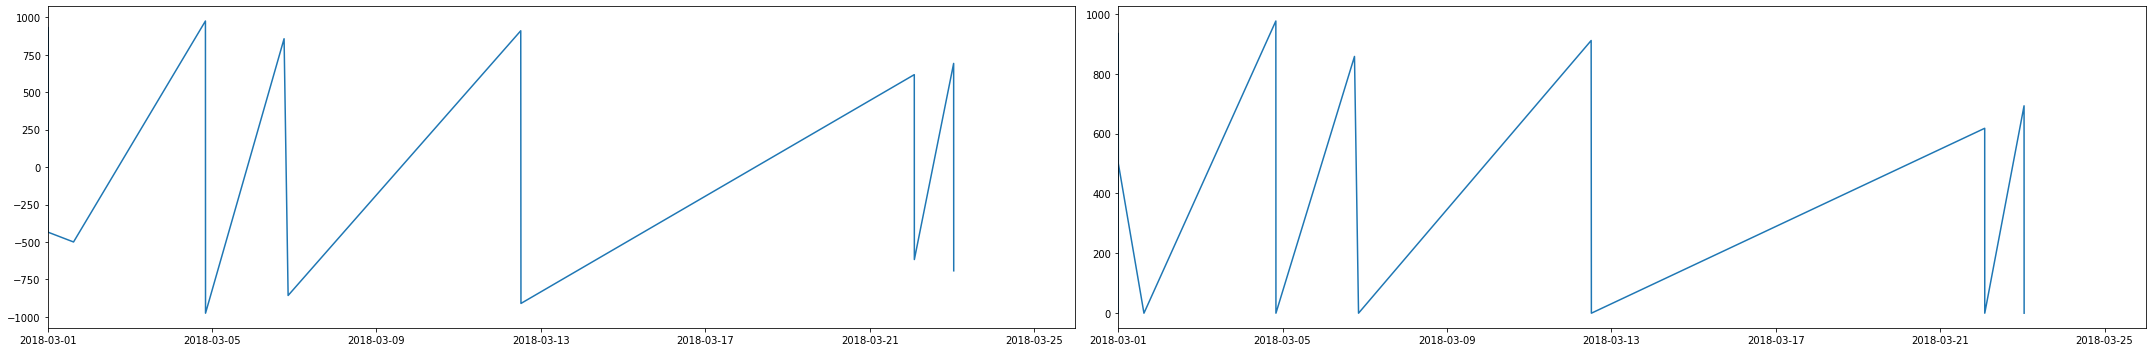

--------------------------------
0x1be5123d3b0f632c4746251d288e800a8f40cd26
Wallet: 20 in, 19 out


<Figure size 432x288 with 0 Axes>

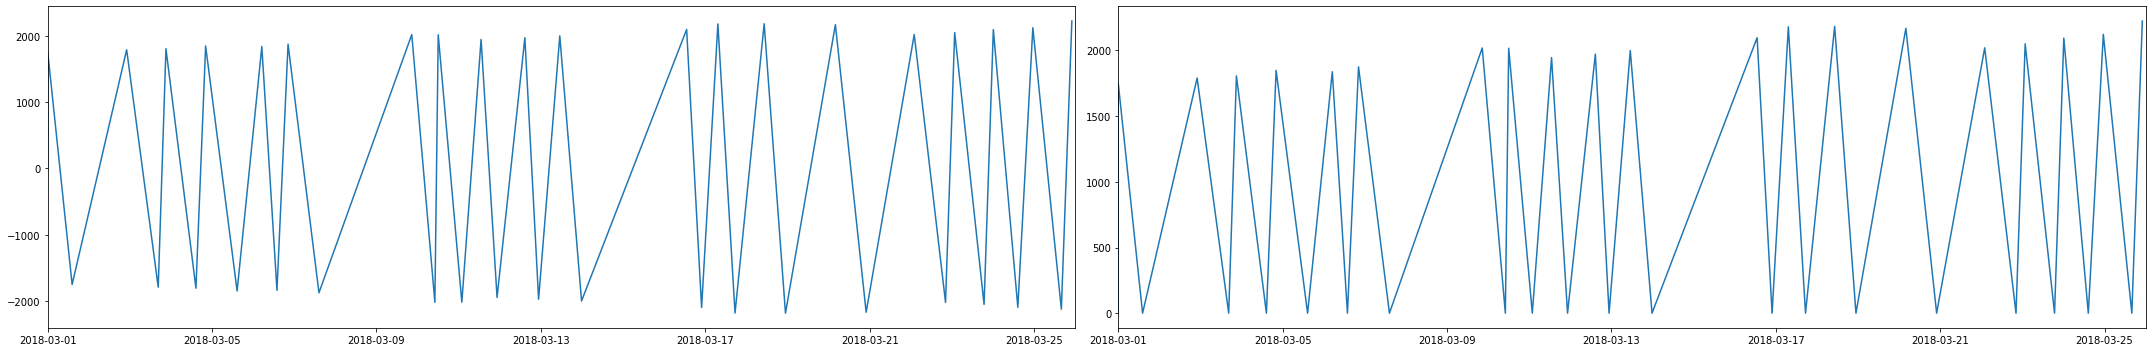

--------------------------------
0x0e0a1ca965c5f43965f3c943275b7efb49bab5b9
Wallet: 12 in, 10 out


<Figure size 432x288 with 0 Axes>

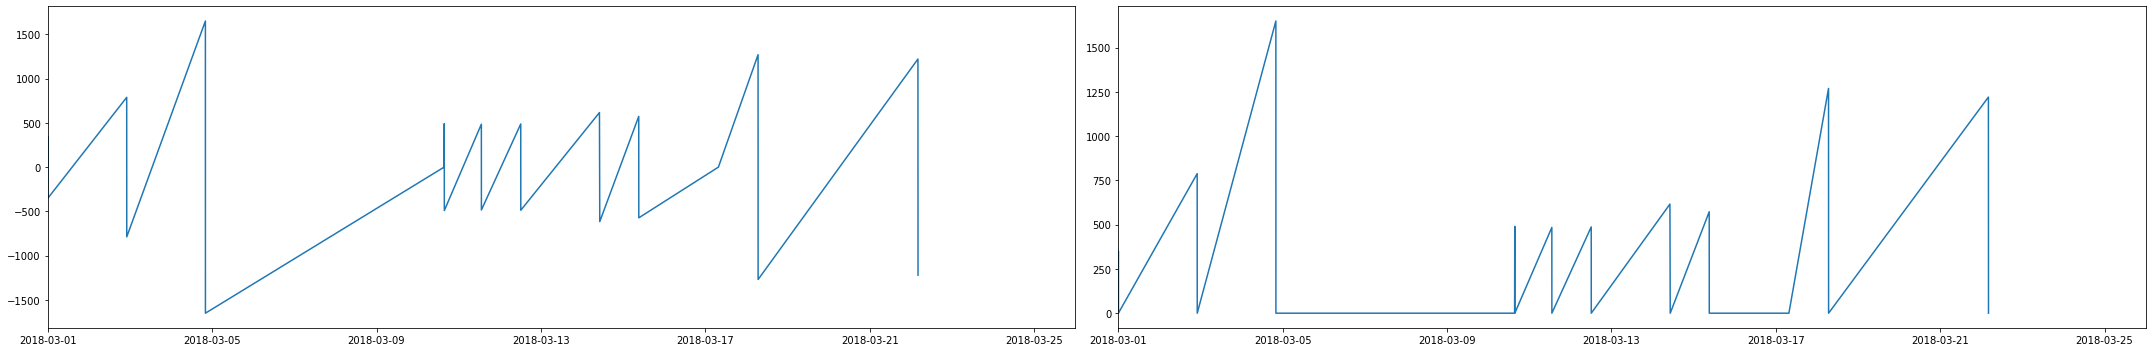

--------------------------------
0x539cf95b18ae9acca6b6190c3f3c17a366d742f9
Wallet: 25 in, 25 out


<Figure size 432x288 with 0 Axes>

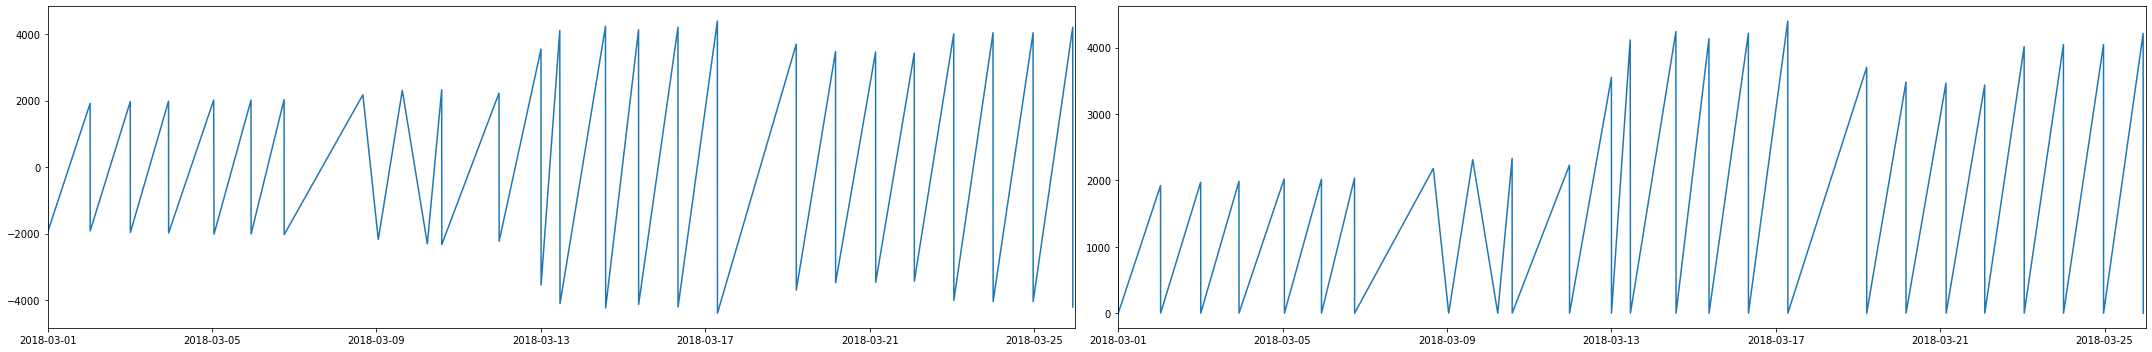

--------------------------------
0x296017855f6f2a0cf4f8a48e30d8185bdc6e480d
Wallet: 24 in, 24 out


<Figure size 432x288 with 0 Axes>

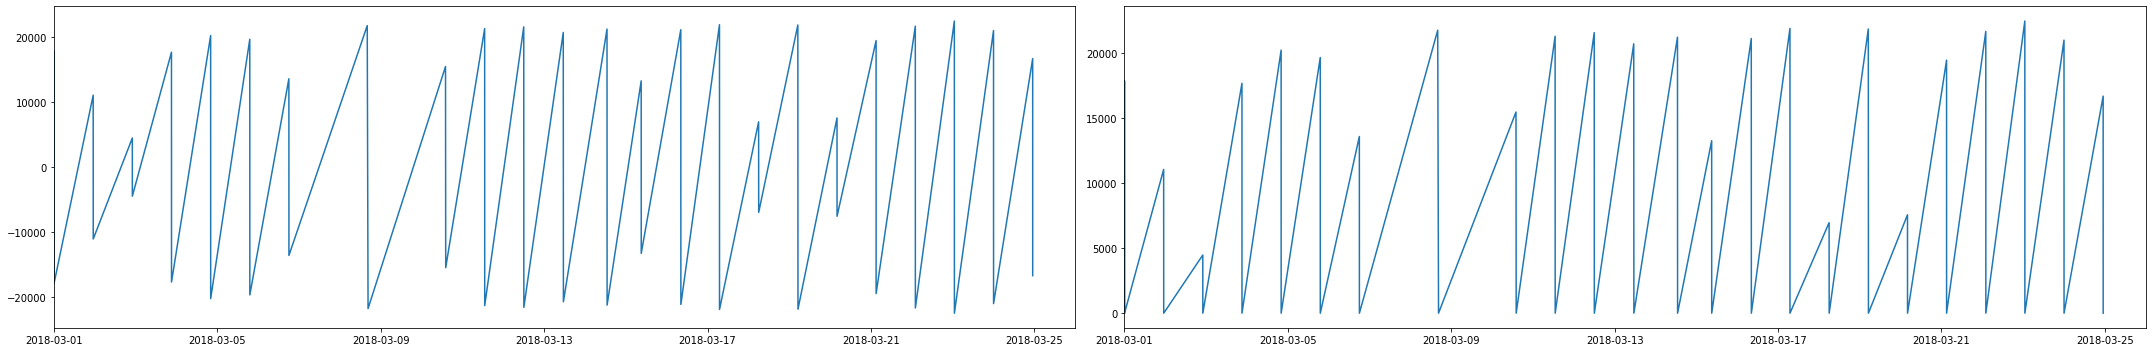

--------------------------------
0xe2eac27e3e9943abb6285a1e07506c9770d3b1b7
Wallet: 21 in, 20 out


<Figure size 432x288 with 0 Axes>

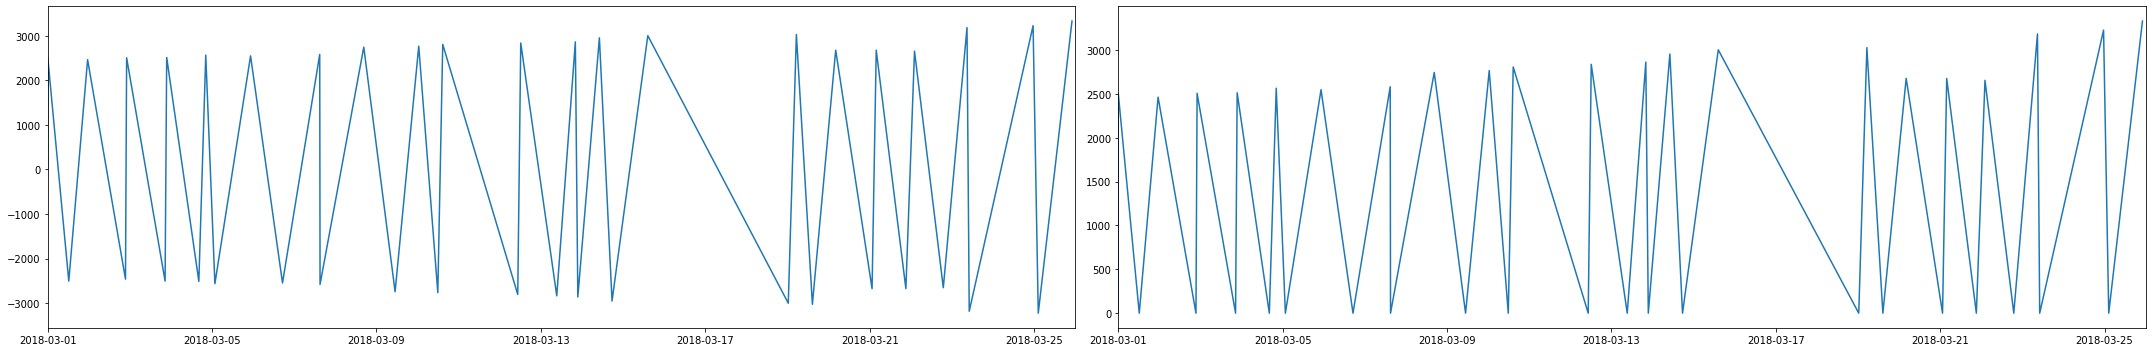

--------------------------------
0x1ef98584c76ae17583de8dd05f970b063820e130
Wallet: 19 in, 19 out


<Figure size 432x288 with 0 Axes>

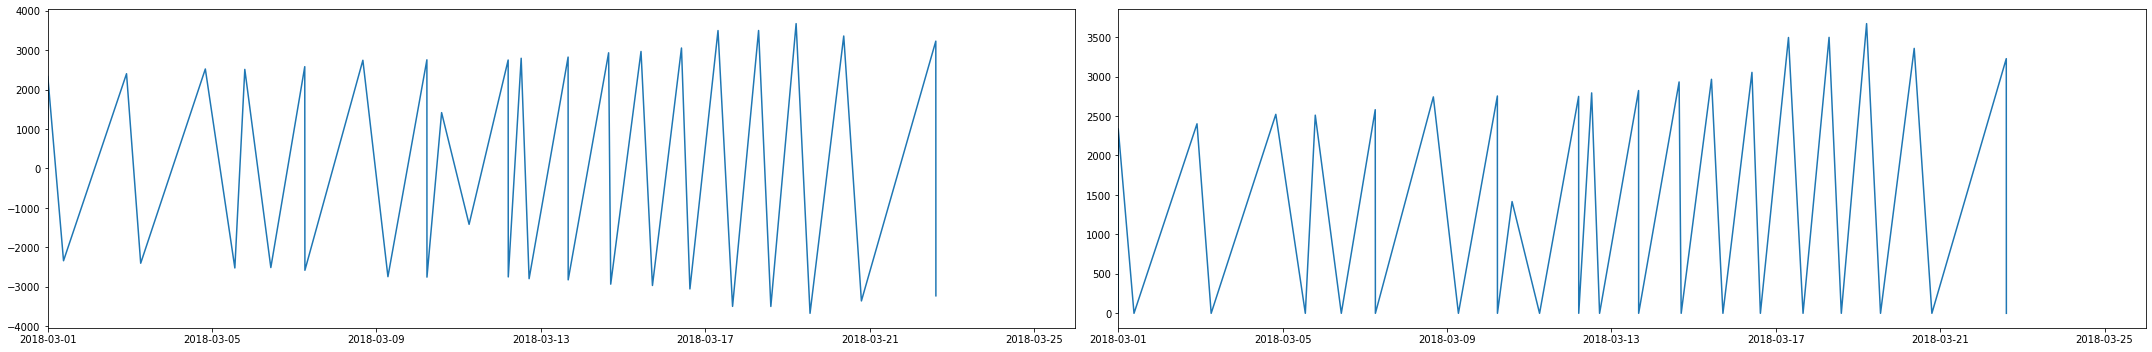

--------------------------------
0xf7fc4b426a3cf8319d14329bba123448e08d81f9
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

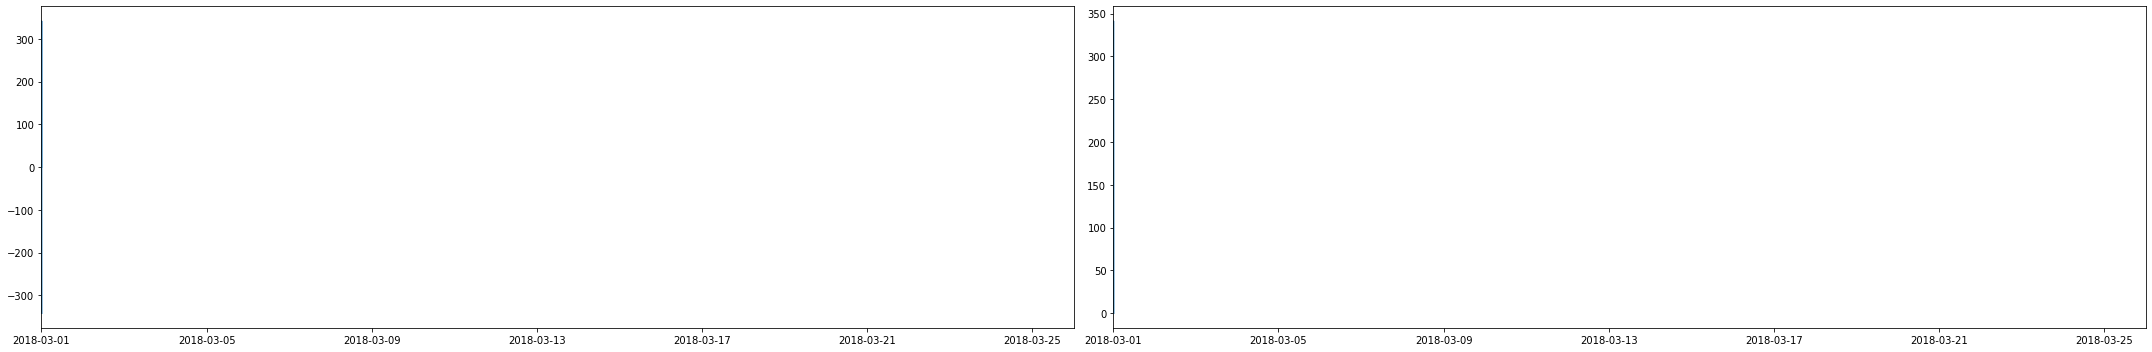

--------------------------------
0xff9652e386ab1a9e9d3117b05d88d2880e037656
Wallet: 5 in, 0 out


<Figure size 432x288 with 0 Axes>

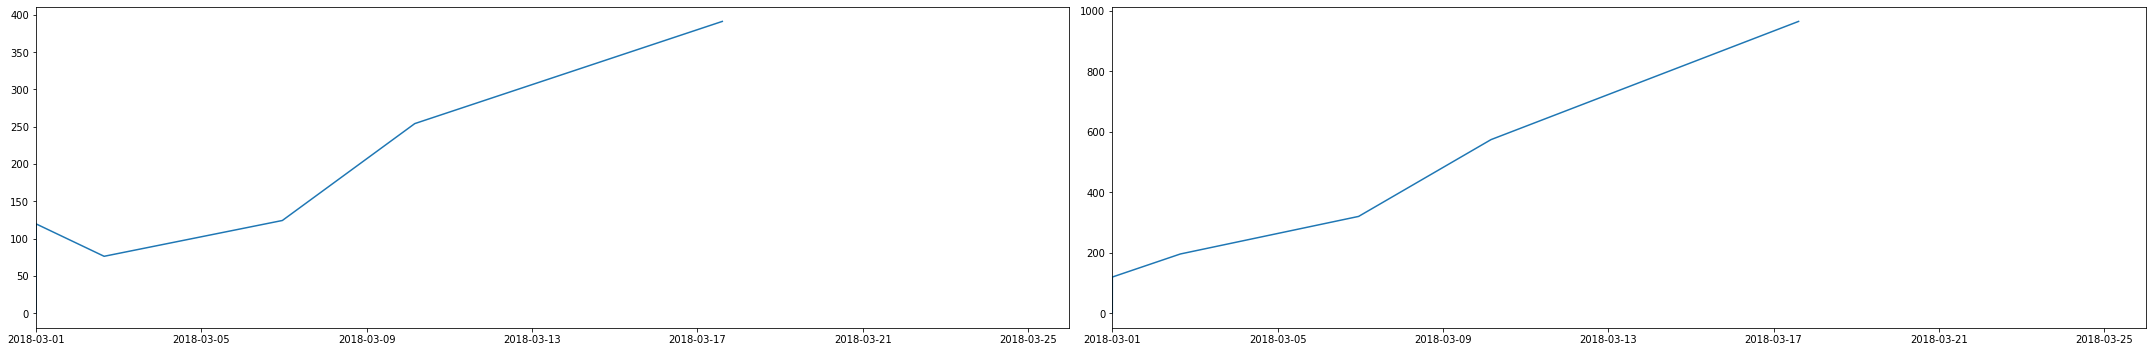

--------------------------------
0x2813dc7746dc68d69f890baaa2e024e161f074ca
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

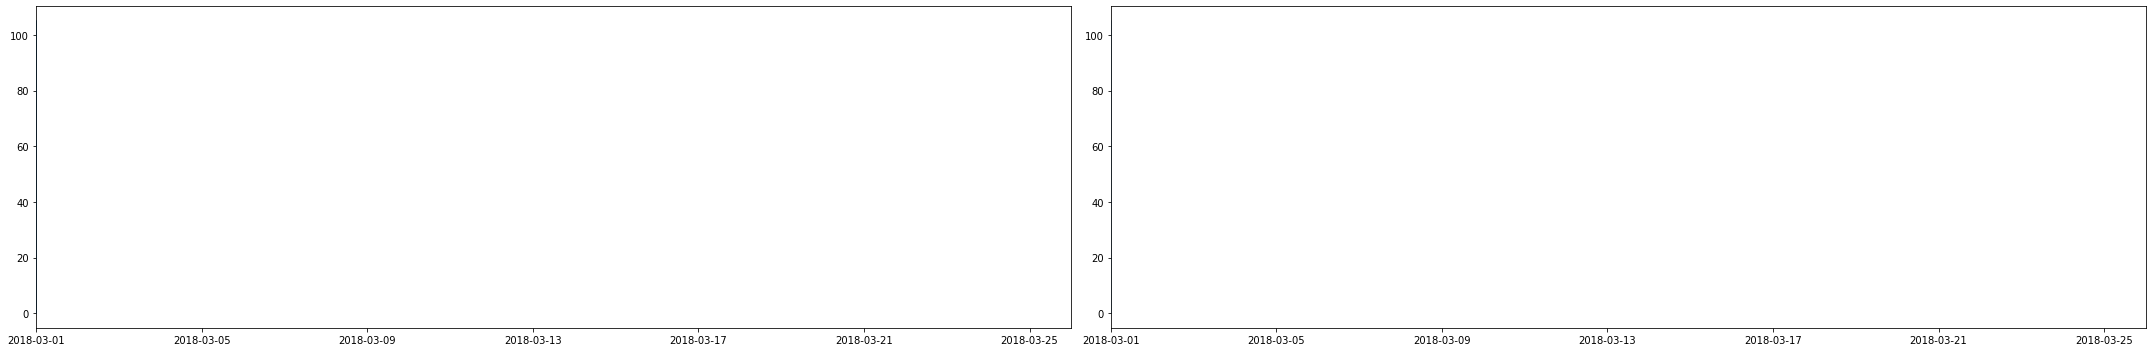

--------------------------------
0xde4d5886da98c3a1140260aaf536a2f1262e2948
Wallet: 26 in, 26 out


<Figure size 432x288 with 0 Axes>

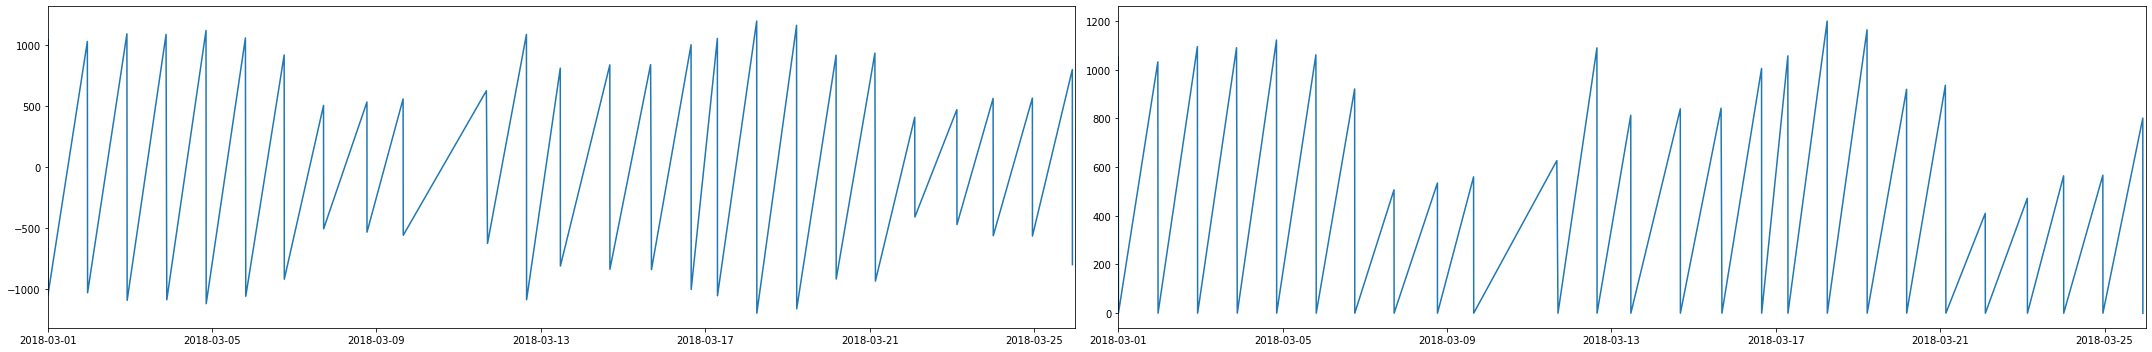

--------------------------------
0xfce6dd108162b9967640ac78503cd037d3e01ea5
Wallet: 2 in, 2 out


<Figure size 432x288 with 0 Axes>

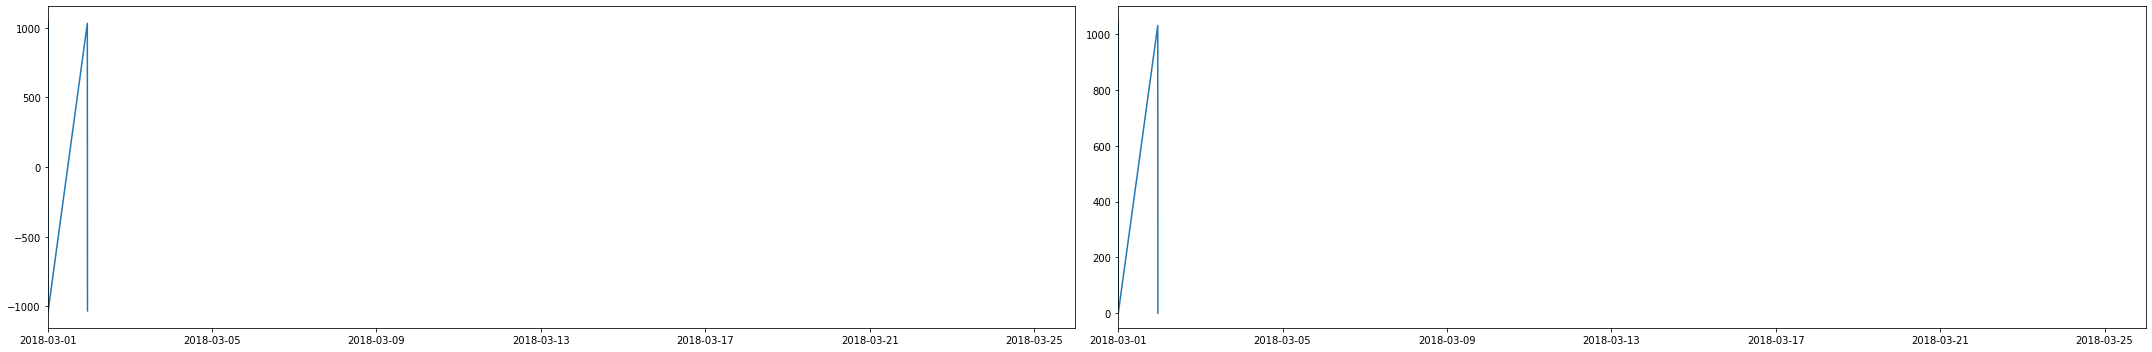

--------------------------------
0x4a9c40f6481feea016fae434de1a8b418e239245
Wallet: 8 in, 35 out


<Figure size 432x288 with 0 Axes>

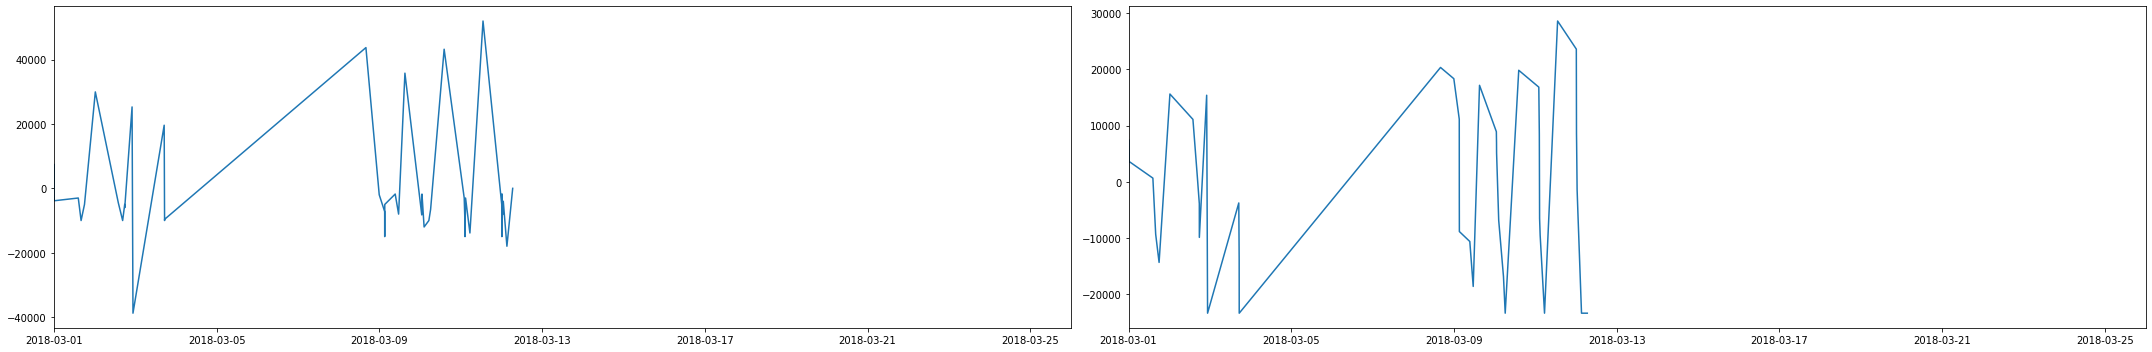

--------------------------------
0xf5899a0f88d73b7641e678a543b8dad4f2a03865
Wallet: 5 in, 6 out


<Figure size 432x288 with 0 Axes>

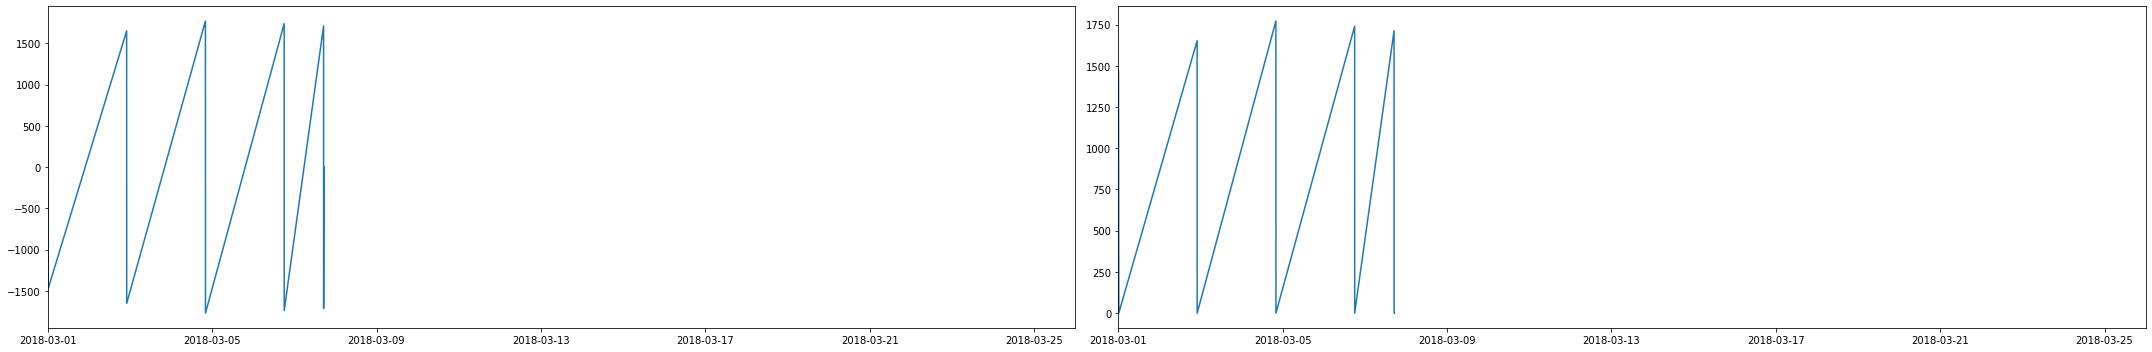

--------------------------------
0x208062b146eed071c3bf6d5945c60ace2bf3303b
Wallet: 2 in, 0 out


<Figure size 432x288 with 0 Axes>

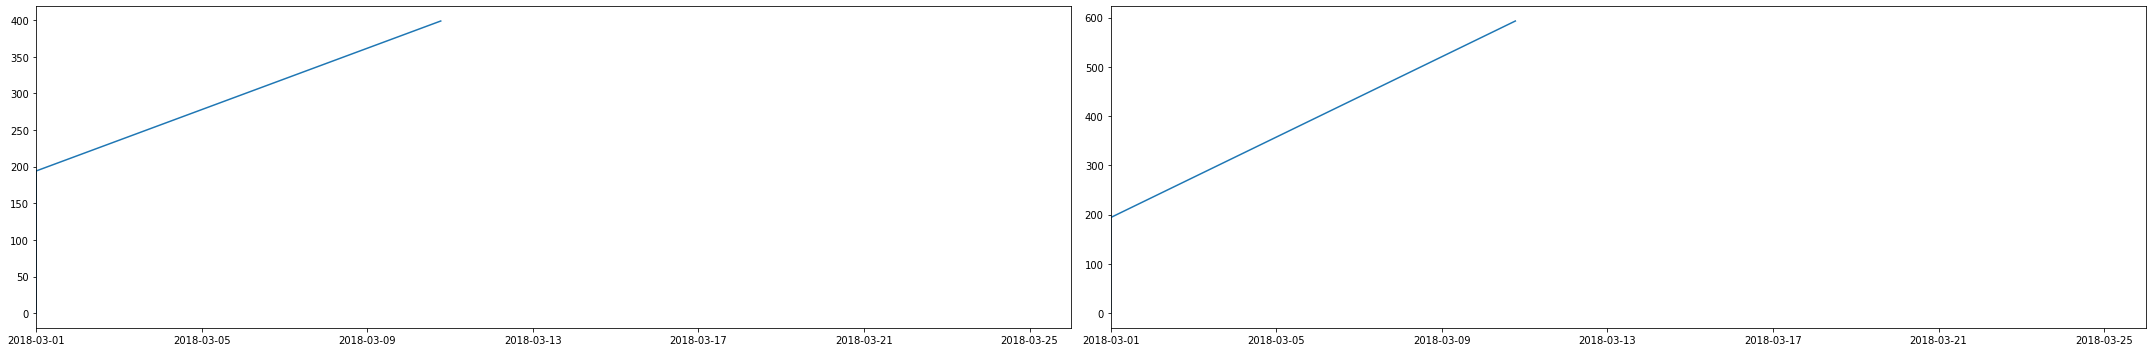

--------------------------------
0x843c21497158e3081fd7aee1bc95e8d40cafaa33
Wallet: 10 in, 8 out


<Figure size 432x288 with 0 Axes>

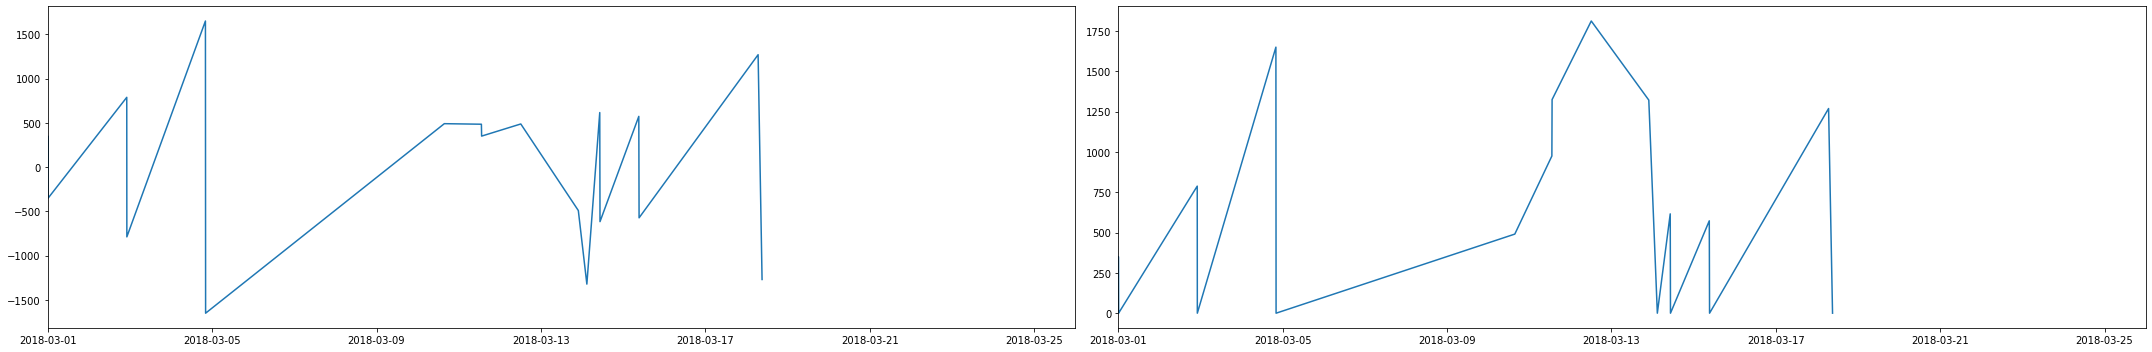

--------------------------------
0x0681d8db095565fe8a346fa0277bffde9c0edbbf
Wallet: 36 in, 6369 out


<Figure size 432x288 with 0 Axes>

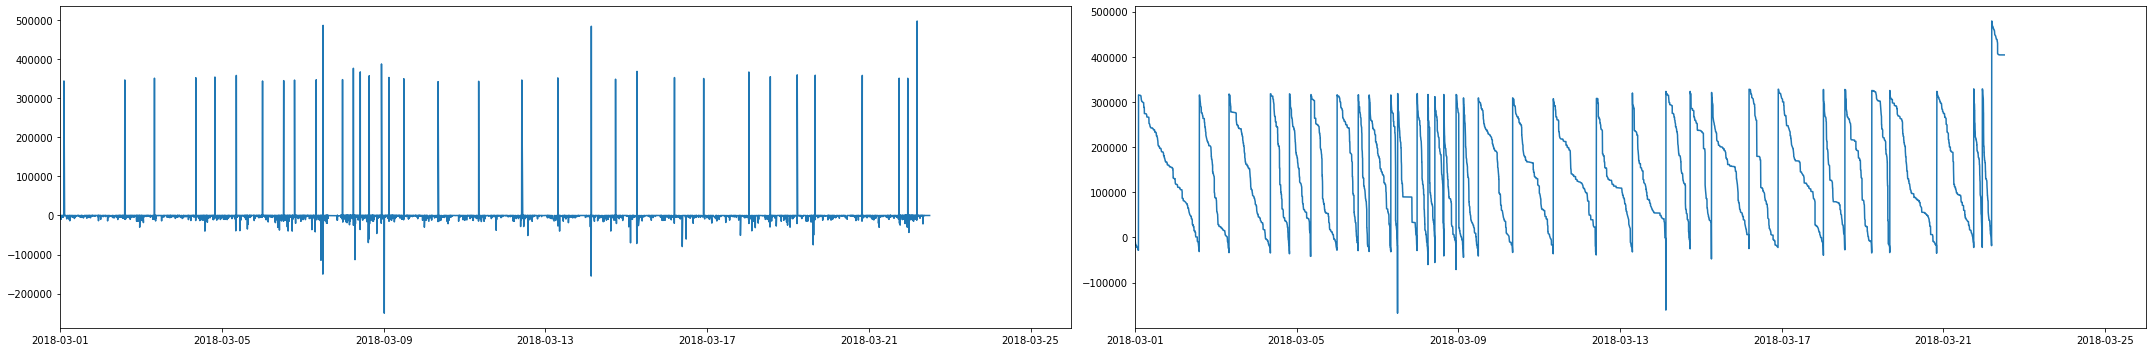

--------------------------------
0x43d40295bfcb3158d0d1a561f31eb6ec388e8998
Wallet: 69 in, 11 out


<Figure size 432x288 with 0 Axes>

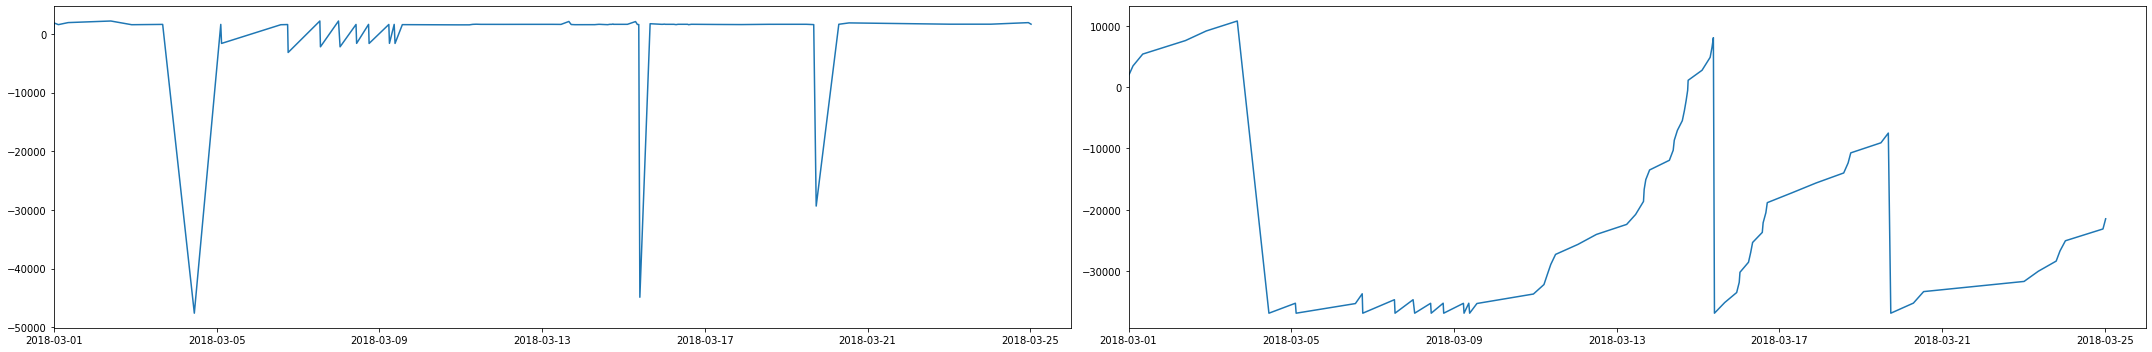

--------------------------------
0x9ccd5fe4016a52da574180bd407bba5f83332e3e
Wallet: 10 in, 10 out


<Figure size 432x288 with 0 Axes>

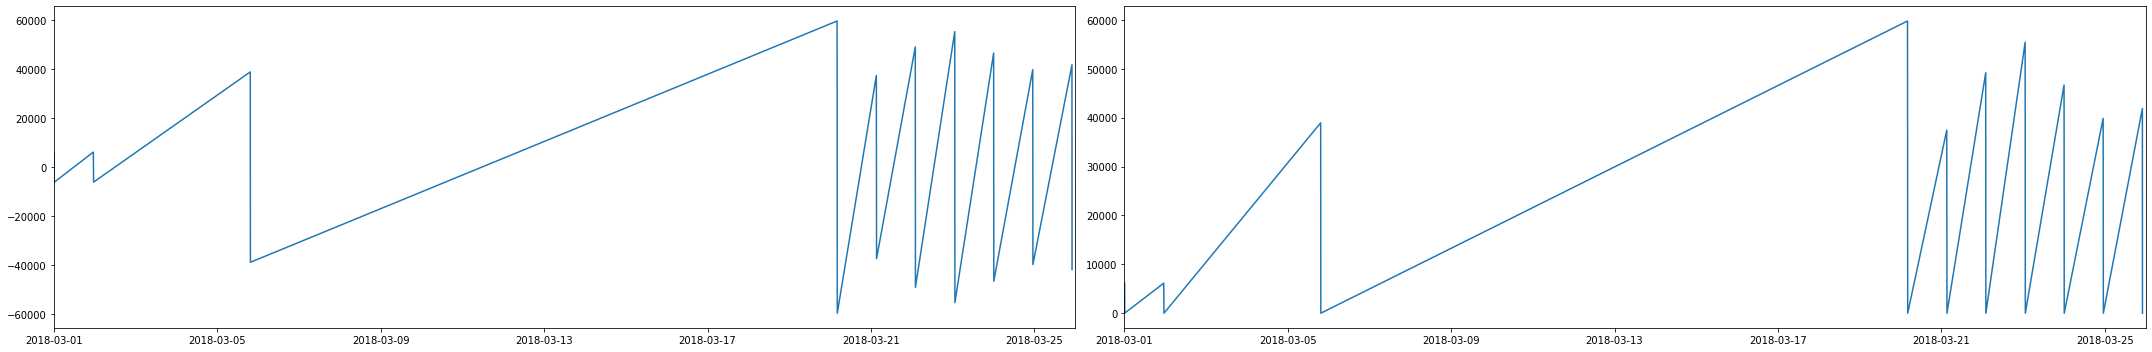

--------------------------------
0xa89a1278ac85367f38bdf6746658ce2b9875526e
Wallet: 4 in, 718 out


<Figure size 432x288 with 0 Axes>

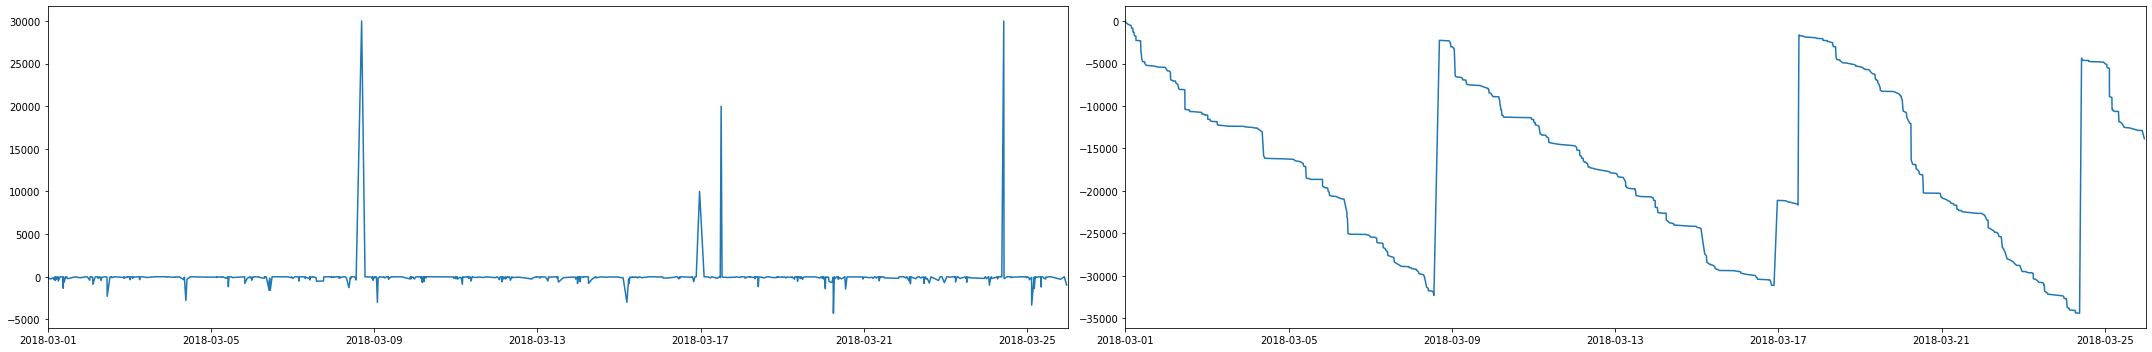

--------------------------------
0xbc4ac2489f4c1e2fef6361dd6a3d4d2bb878576b
Wallet: 2 in, 0 out


<Figure size 432x288 with 0 Axes>

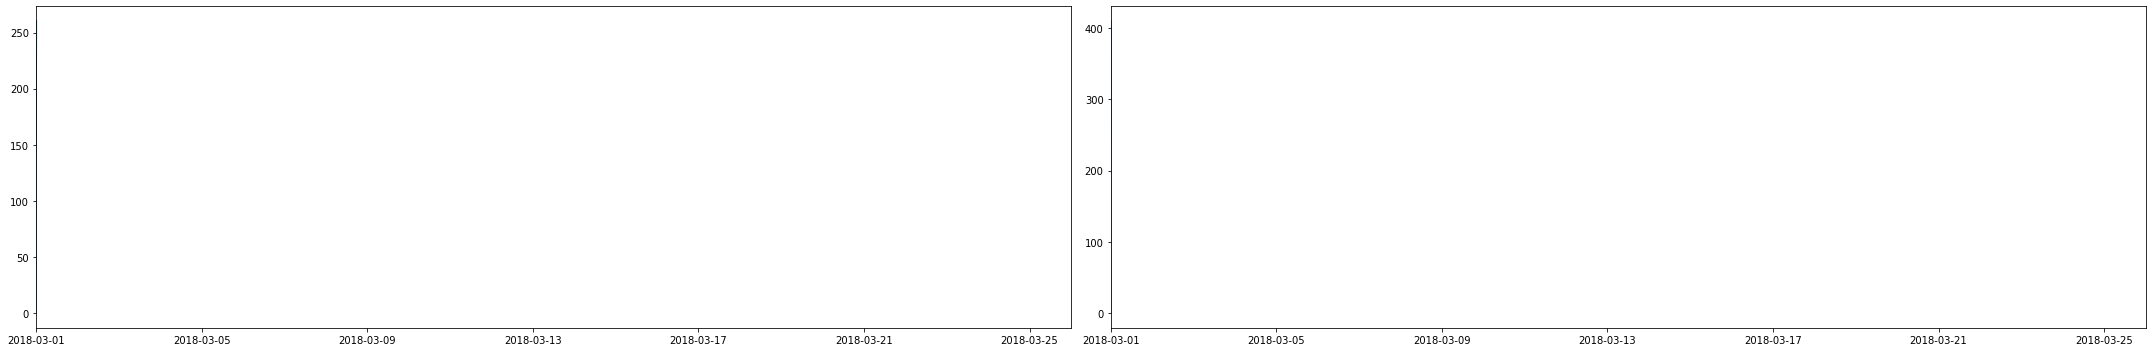

--------------------------------
0x99bf3aef37df64f5af8dc70b95cd81103fe94af5
Wallet: 27 in, 26 out


<Figure size 432x288 with 0 Axes>

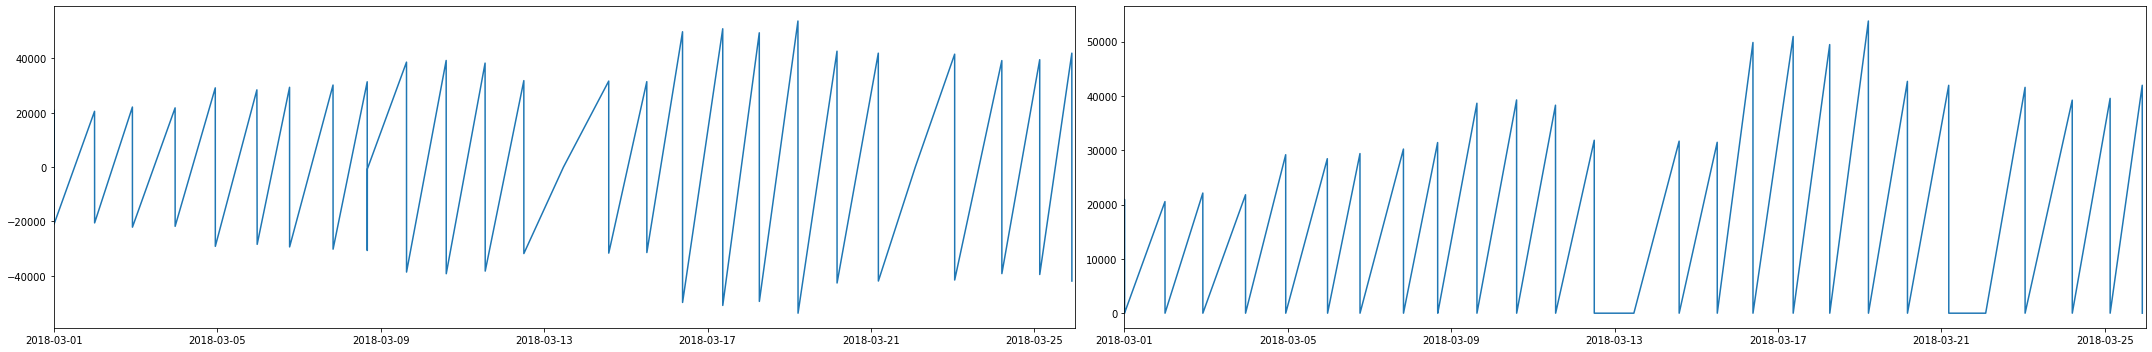

--------------------------------
0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be
Wallet: 8586 in, 8610 out


<Figure size 432x288 with 0 Axes>

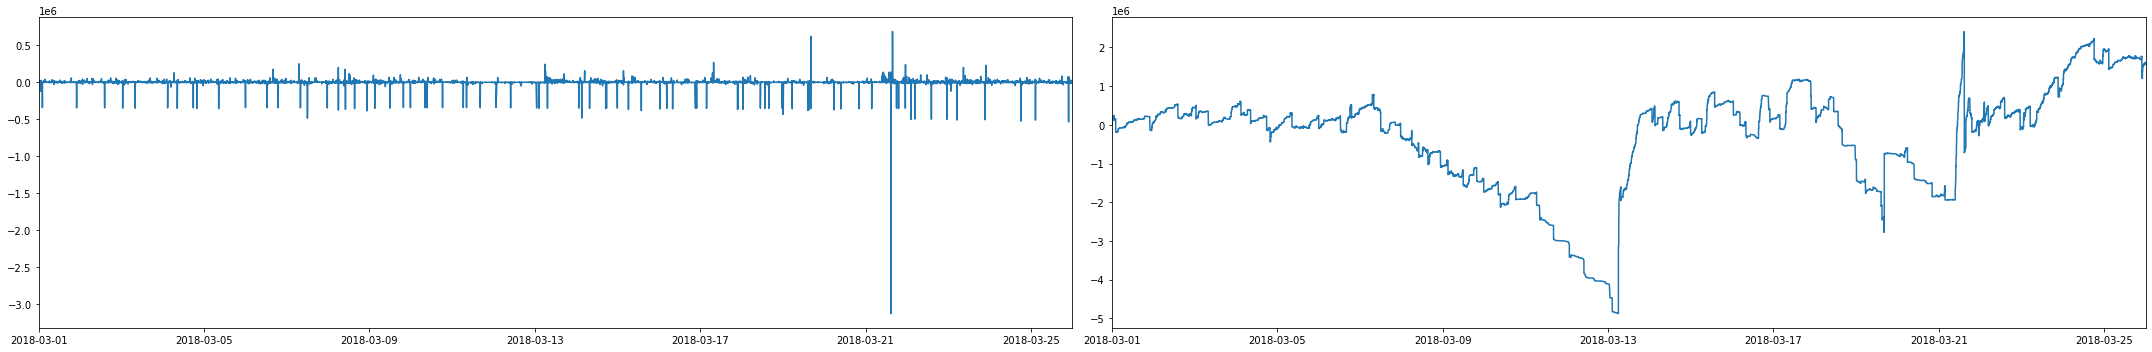

--------------------------------
0xef3fec02c81c4ef88a5a8c00d62971522b25591a
Wallet: 2 in, 0 out


<Figure size 432x288 with 0 Axes>

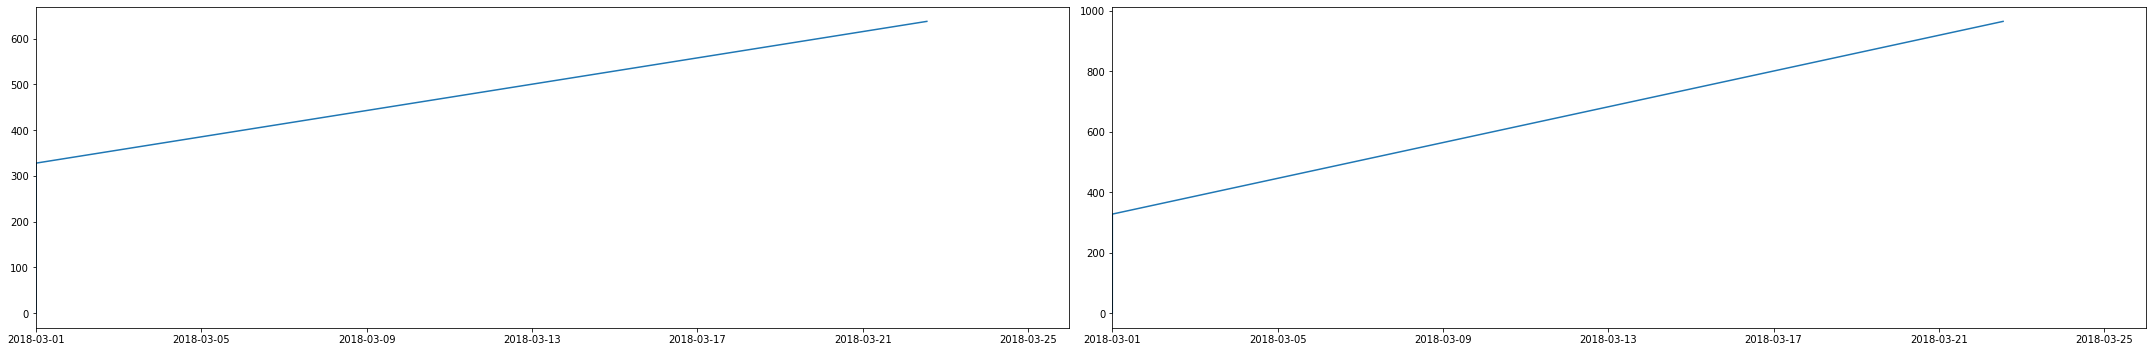

--------------------------------
0x22b84d5ffea8b801c0422afe752377a64aa738c2
Wallet: 1179 in, 14445 out


<Figure size 432x288 with 0 Axes>

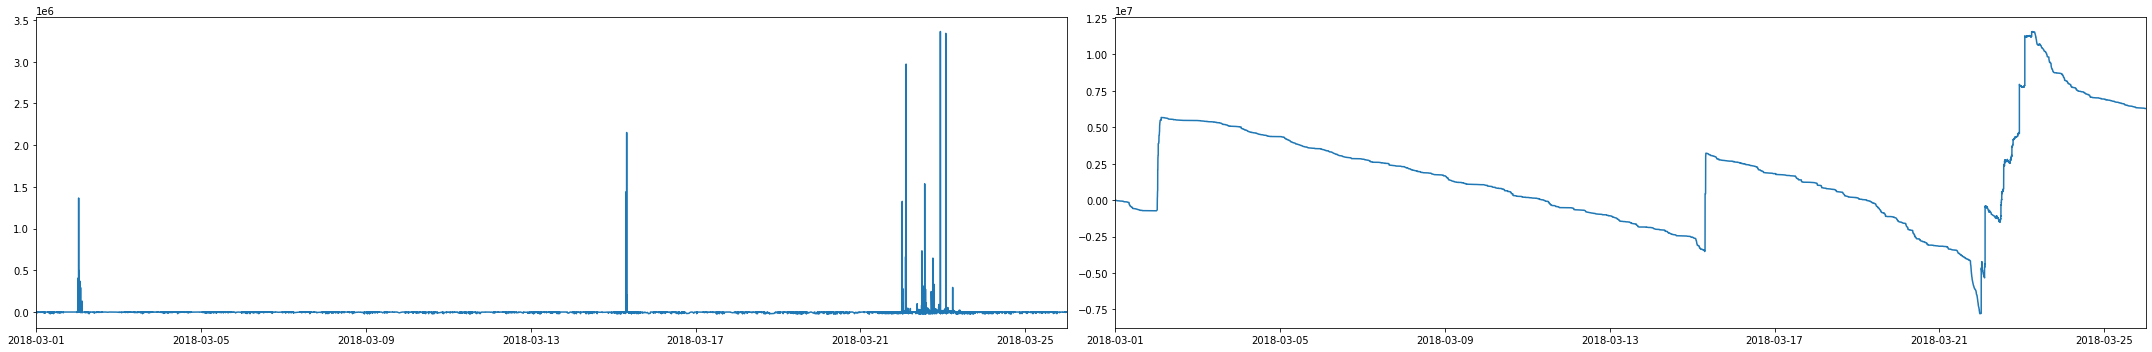

--------------------------------
0xb4a6edcb176bf31d056d5cbdf3dfb07fabf96dc4
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

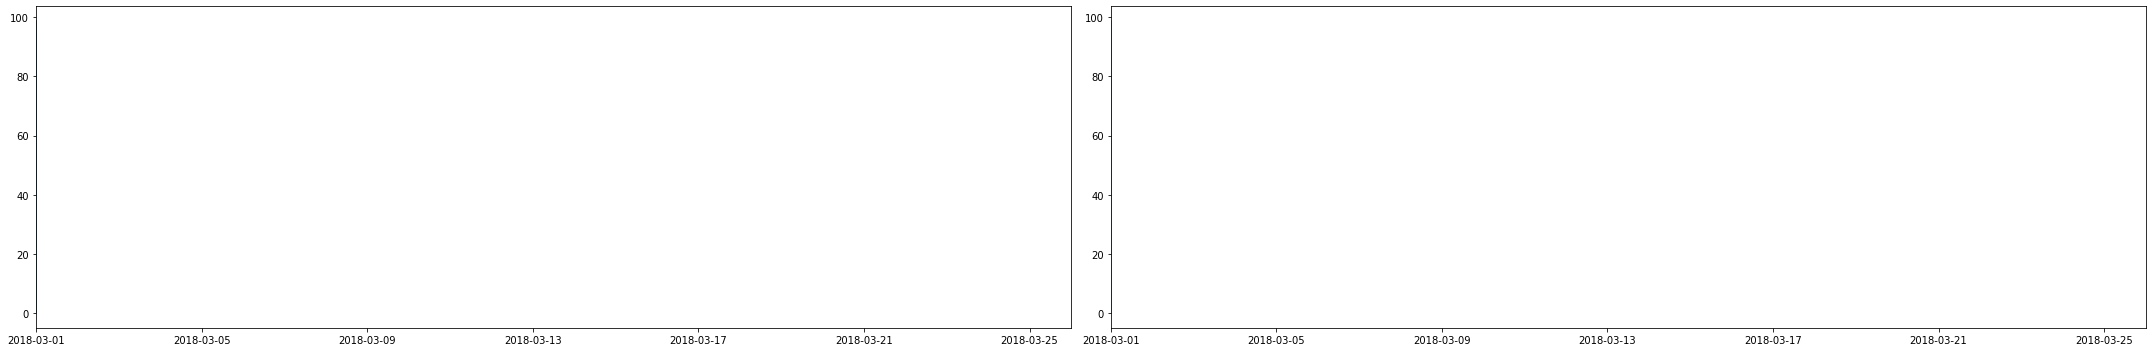

--------------------------------
0x876eabf441b2ee5b5b0554fd502a8e0600950cfa
Wallet: 3577 in, 4462 out


<Figure size 432x288 with 0 Axes>

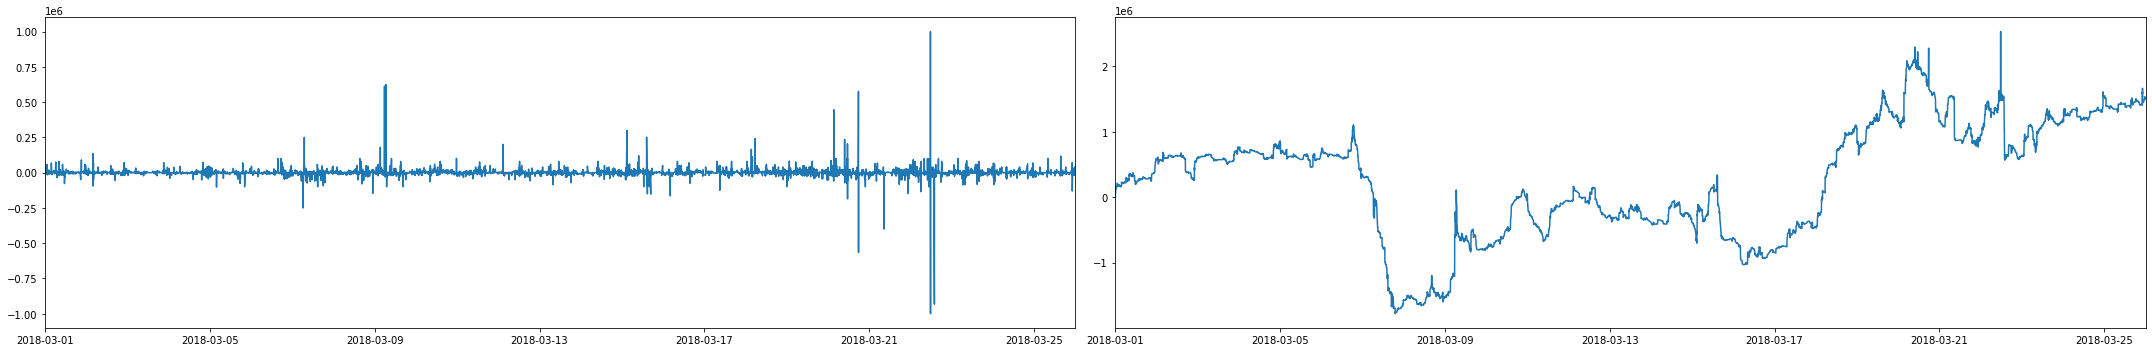

--------------------------------
0xf0a960597f499fbf04a182b1ef98ef5d10c0424a
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

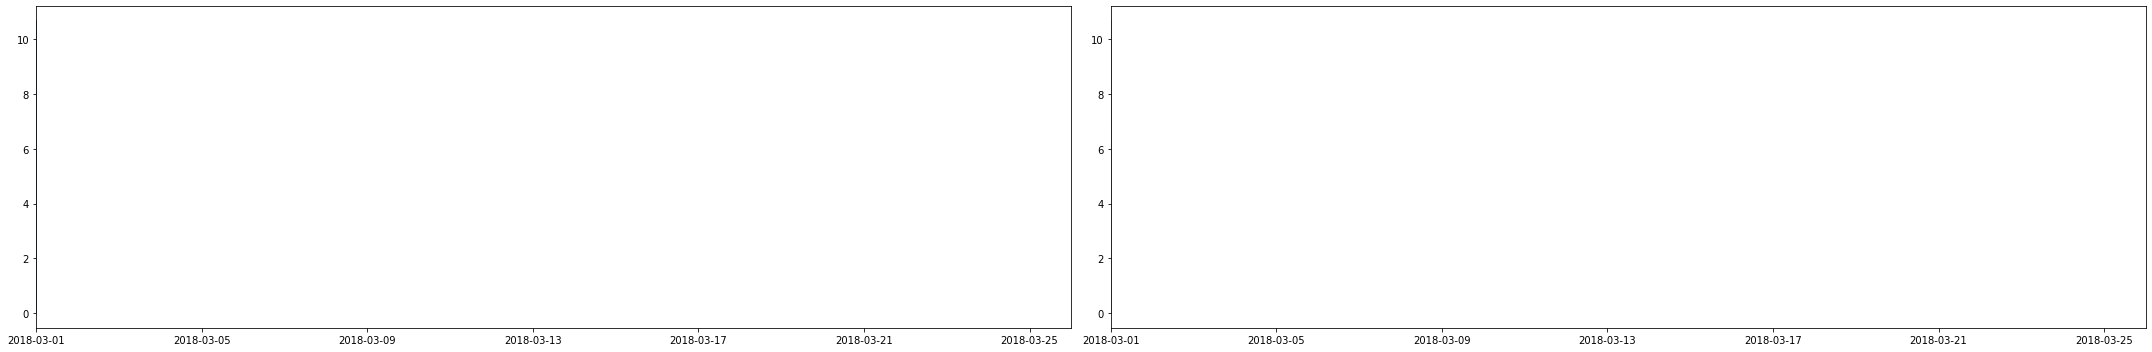

--------------------------------
0x8f80750269ad93ef0a3482837e9897dc398b3248
Wallet: 7 in, 7 out


<Figure size 432x288 with 0 Axes>

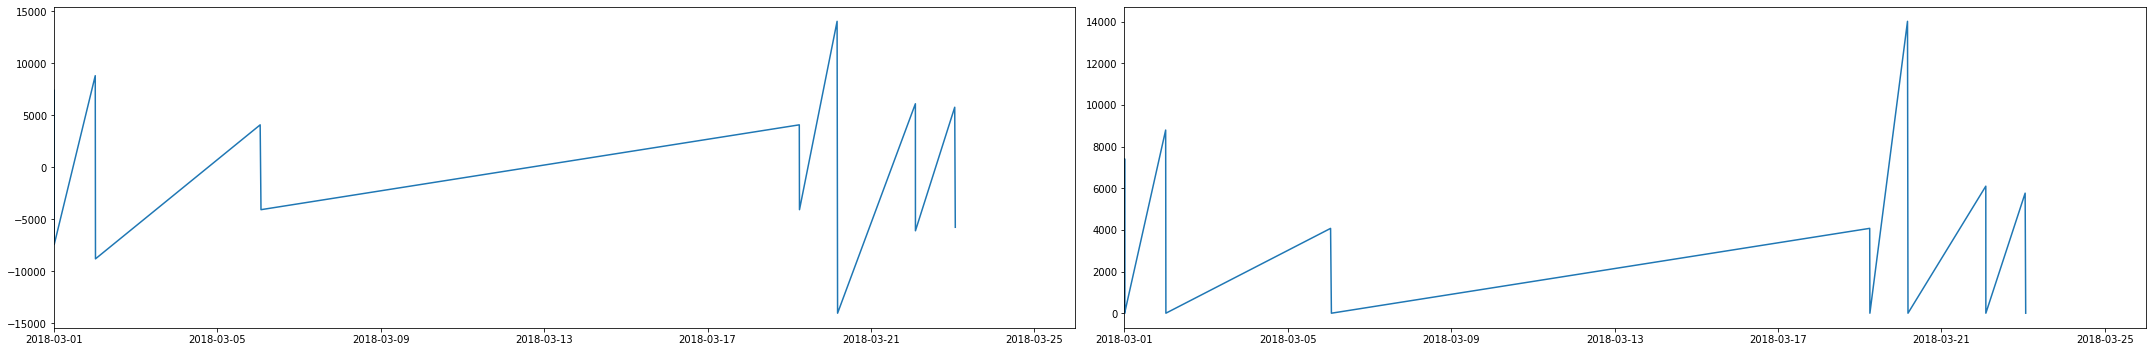

--------------------------------
0x05ee546c1a62f90d7acbffd6d846c9c54c7cf94c
Wallet: 1132 in, 4374 out


<Figure size 432x288 with 0 Axes>

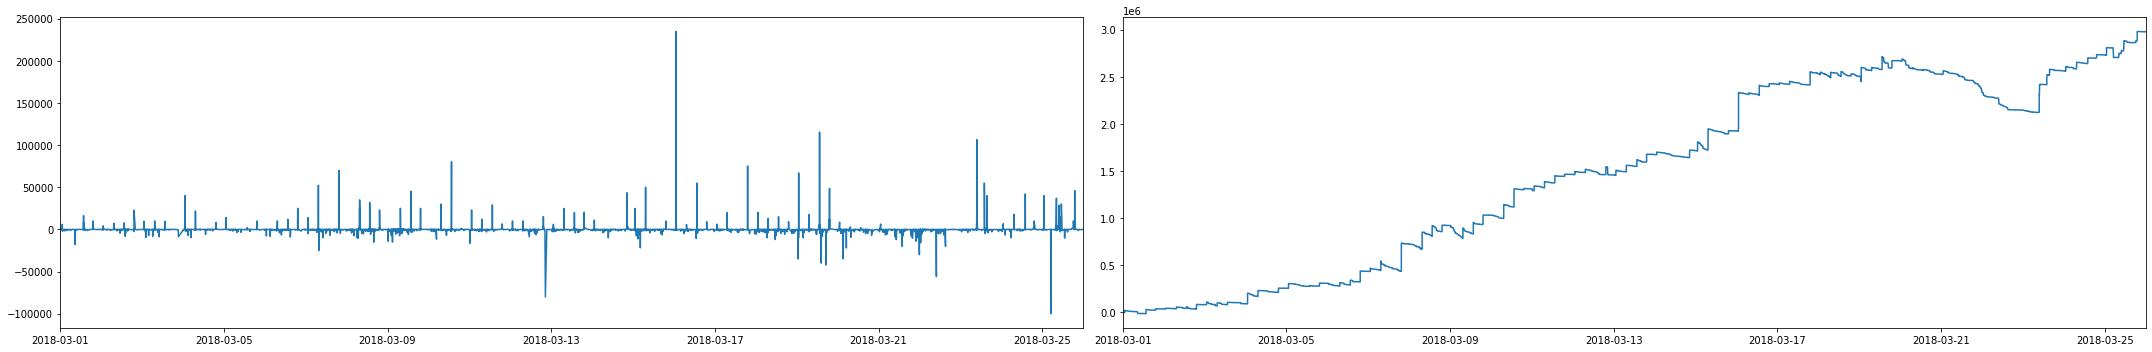

--------------------------------
0xd48e7797c3cff6d82e6dc247b5e25ca41cd91a42
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

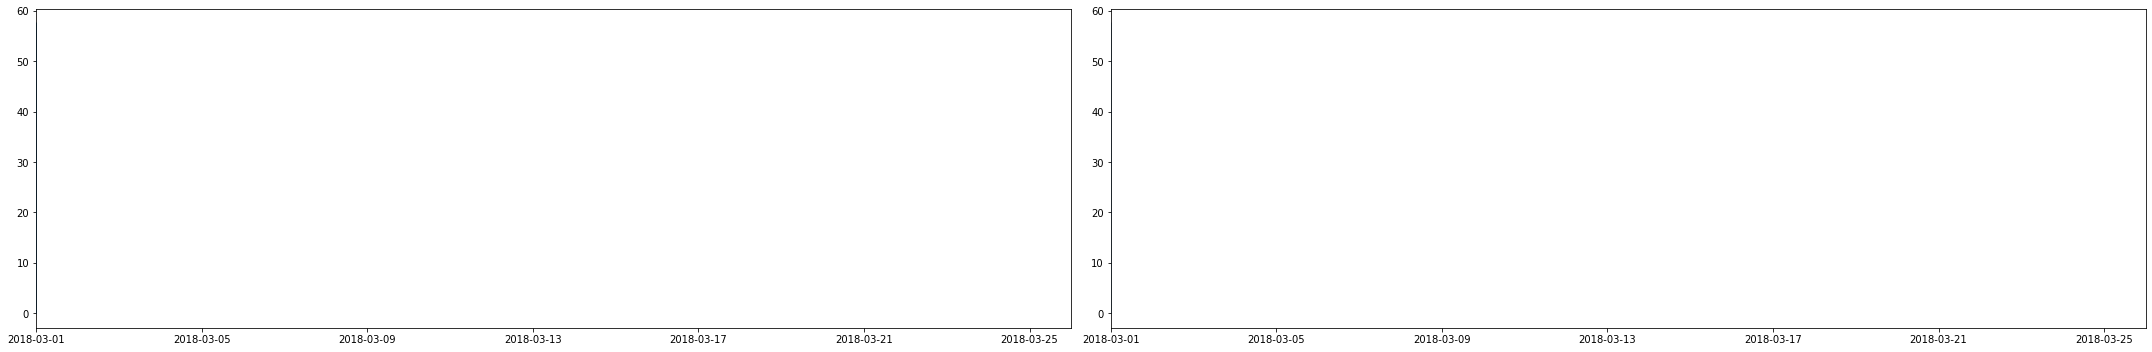

--------------------------------
0x8df24eee61ffc252350d961bf0ca2a850a888f16
Wallet: 25 in, 28 out


<Figure size 432x288 with 0 Axes>

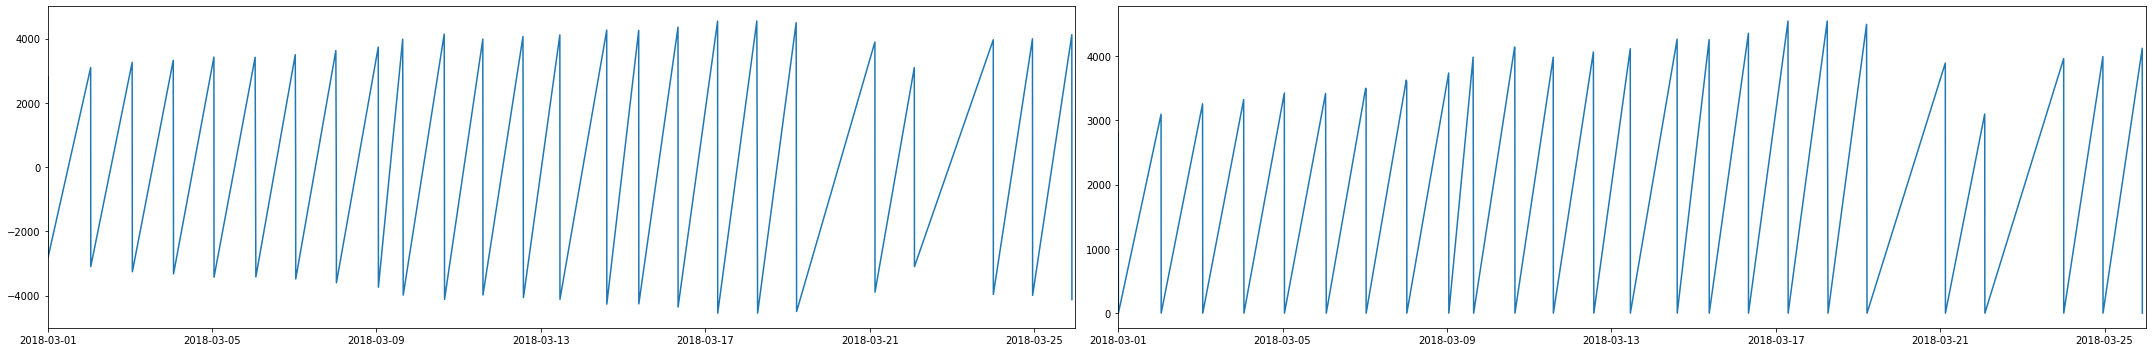

--------------------------------
0x09d97e6bd3c436995995f1ee758b5ba814d9f1b3
Wallet: 23 in, 22 out


<Figure size 432x288 with 0 Axes>

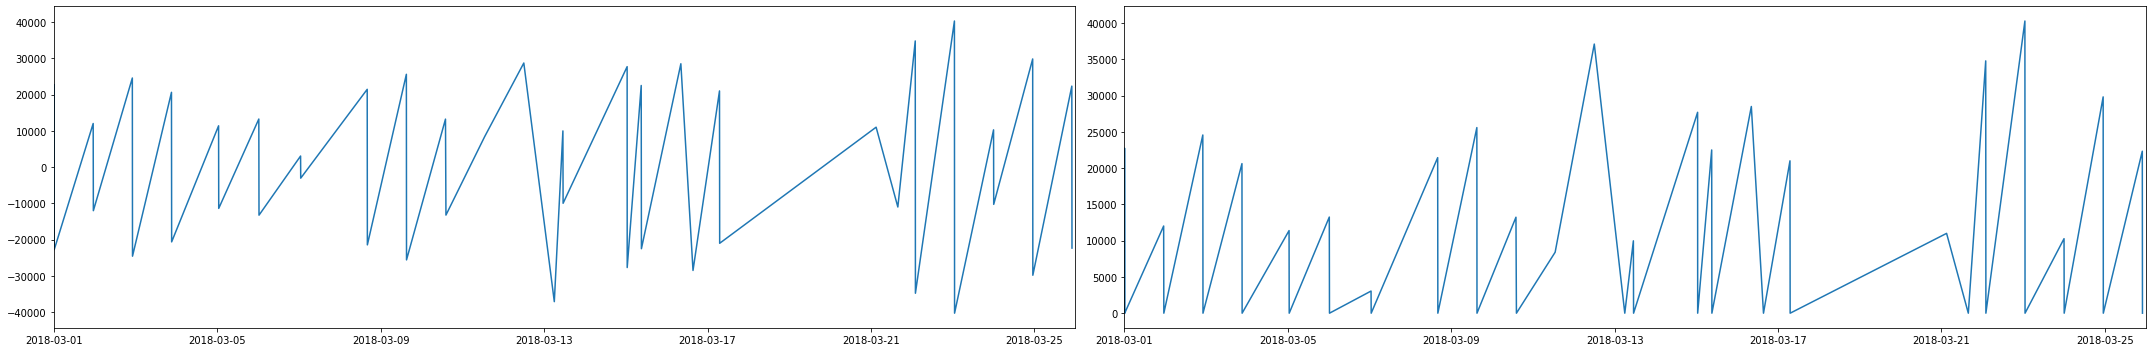

--------------------------------
0xc453221d14b5c0a65b90e3c61d2b50a7f29331ef
Wallet: 16 in, 2 out


<Figure size 432x288 with 0 Axes>

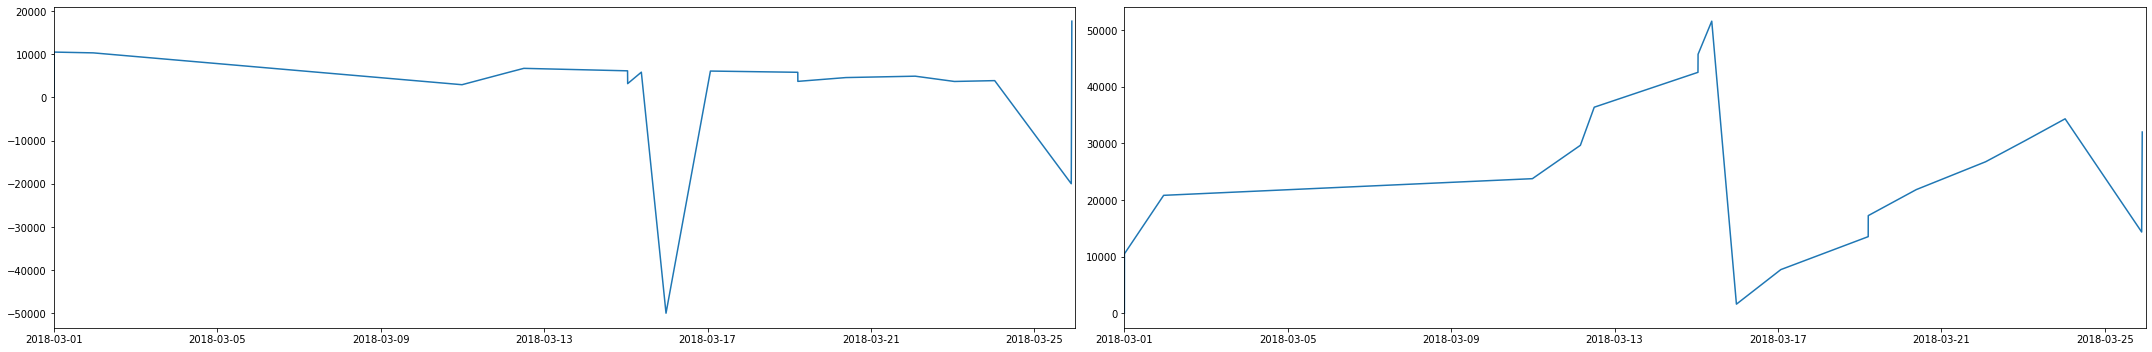

--------------------------------
0x4923eb963981e2dbdccad7eb9bb4915b1f695956
Wallet: 27 in, 9 out


<Figure size 432x288 with 0 Axes>

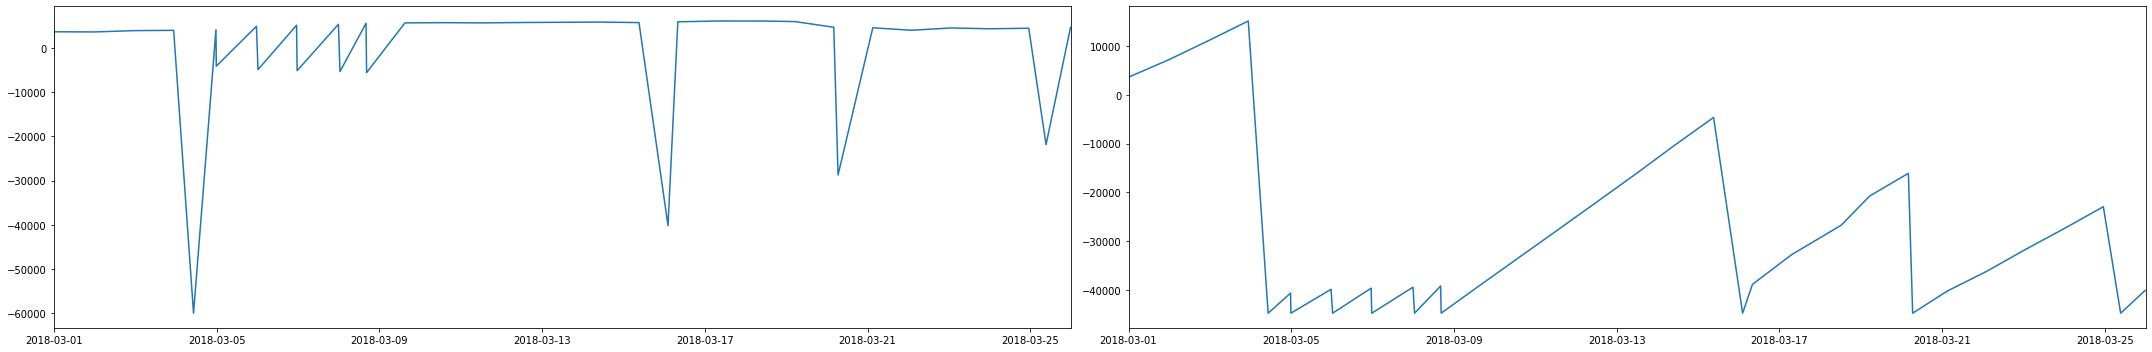

--------------------------------
0x12bd61da735bc62369654f2d6258842bfcd7d7ab
Wallet: 0 in, 1 out


<Figure size 432x288 with 0 Axes>

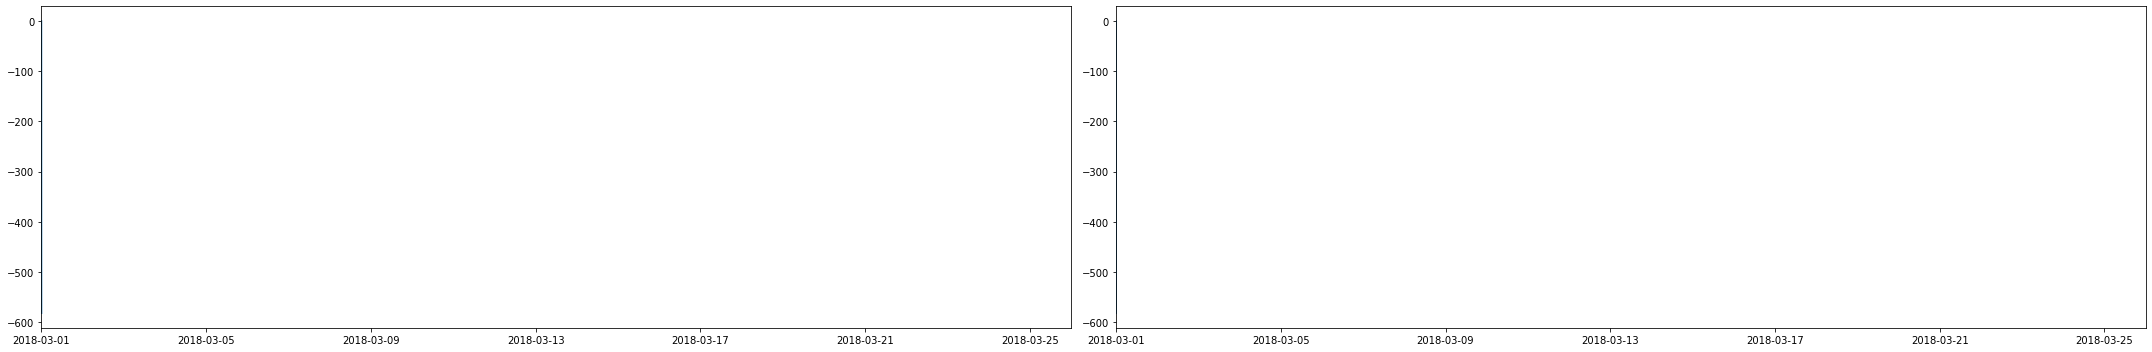

--------------------------------
0x692da4782d996dac7d66b5822f3c504f67da8493
Wallet: 4804 in, 543 out


<Figure size 432x288 with 0 Axes>

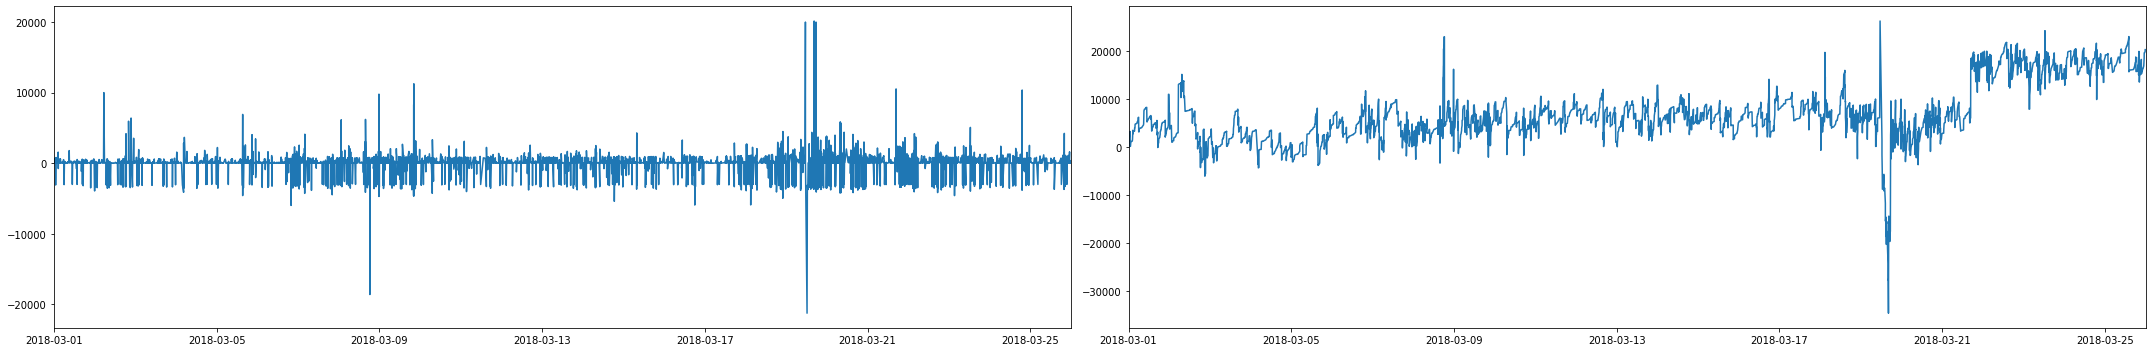

--------------------------------
0x7f07dc596711c7b3dc4aa662d5e1c58c35f2acd6
Wallet: 26 in, 26 out


<Figure size 432x288 with 0 Axes>

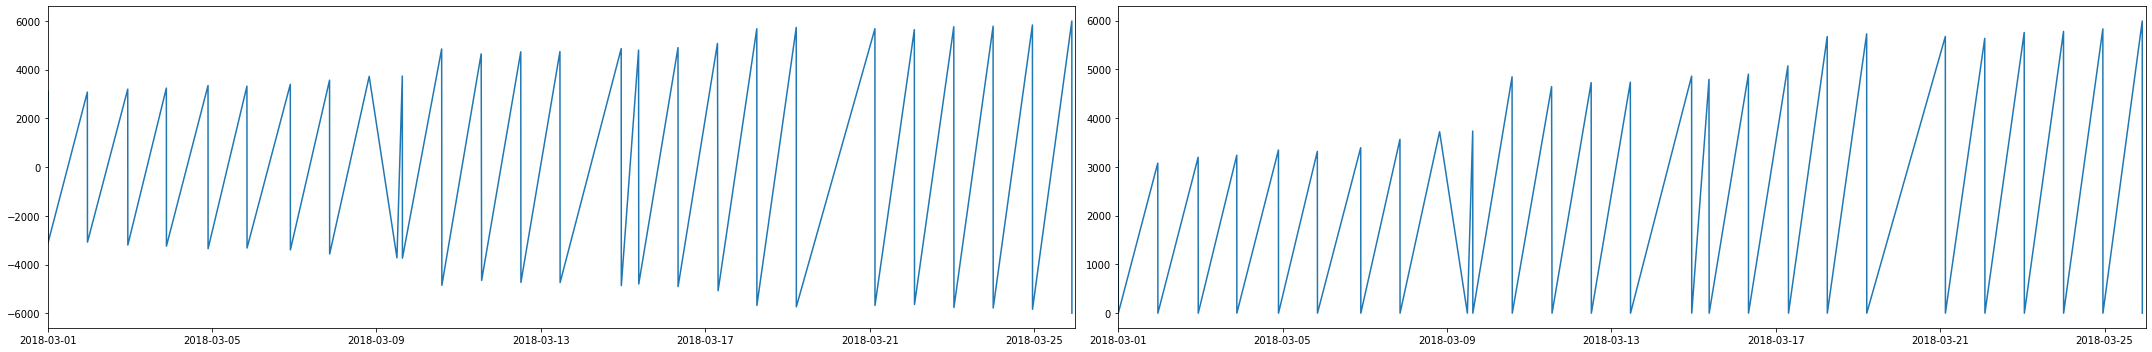

--------------------------------
0xf86d12cb9b623e47f510345e89b85e8ae16caee5
Wallet: 3 in, 3 out


<Figure size 432x288 with 0 Axes>

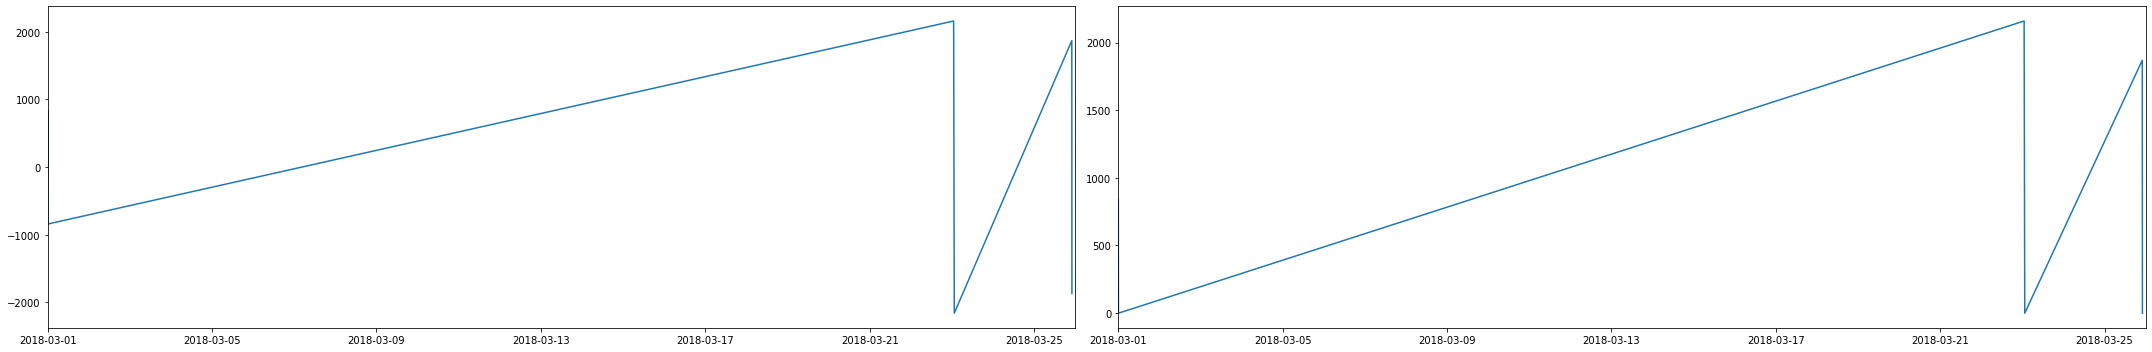

--------------------------------
0x337e7aca81b31a895925795ef775f2c7b0ea22d9
Wallet: 11 in, 11 out


<Figure size 432x288 with 0 Axes>

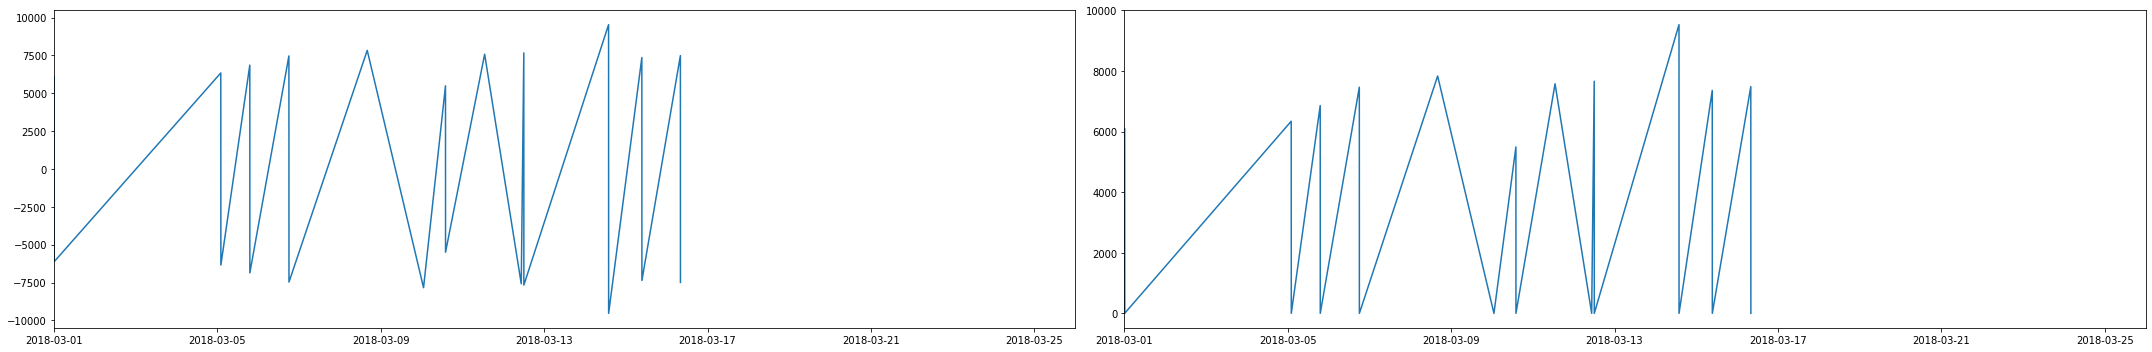

--------------------------------
0x3aeac3ddcf86ef1229bf353e739f4035bf4e092c
Wallet: 0 in, 1 out


<Figure size 432x288 with 0 Axes>

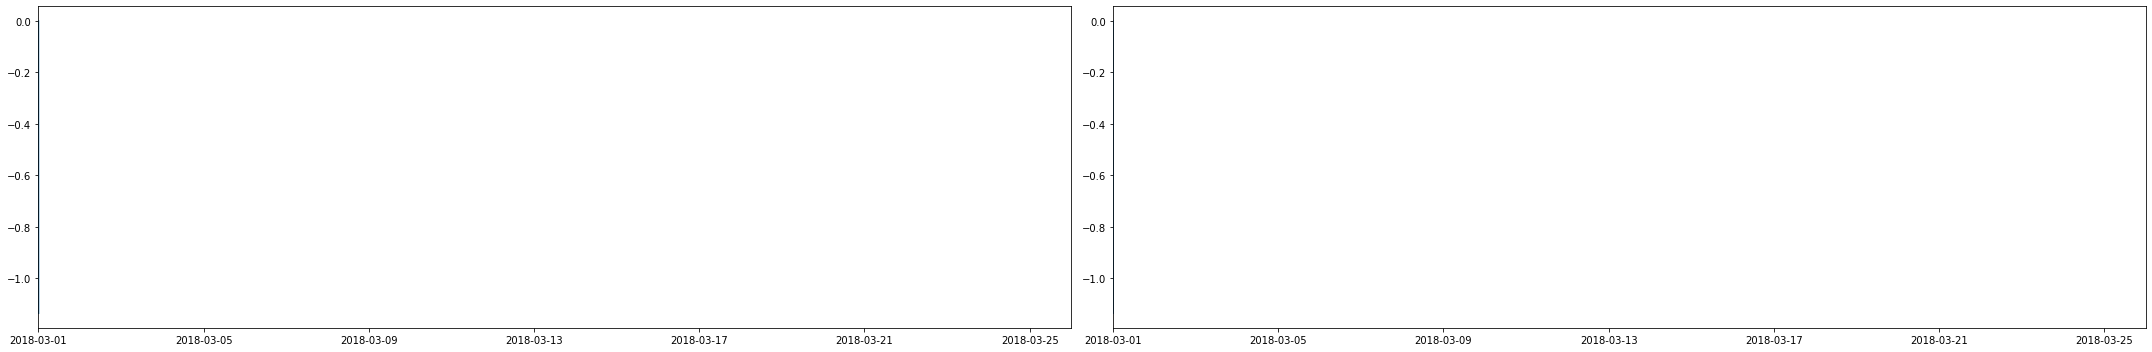

--------------------------------
0x36c16a5dfb20a37154f0a091f4923e9b4759aa4d
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

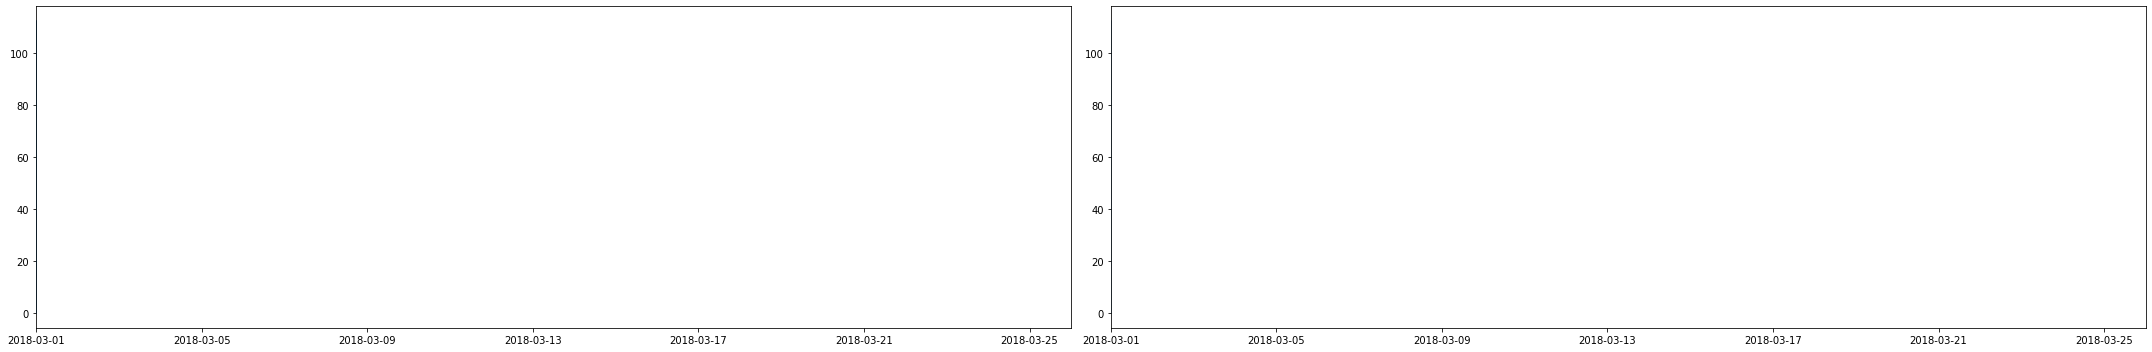

--------------------------------
0xa054f981b24805199d69abfa341e6e45e6cbb702
Wallet: 2 in, 1 out


<Figure size 432x288 with 0 Axes>

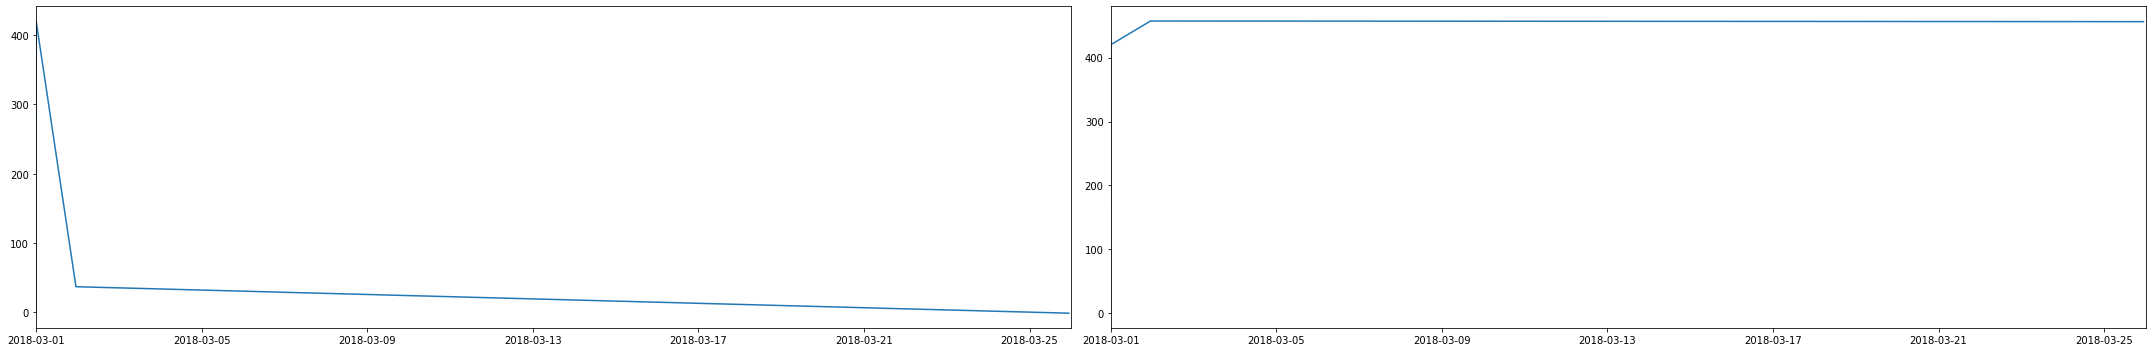

--------------------------------
0x9aa7d397d3659903bb0a7cc2abc6f38a3ab09a67
Wallet: 5 in, 5 out


<Figure size 432x288 with 0 Axes>

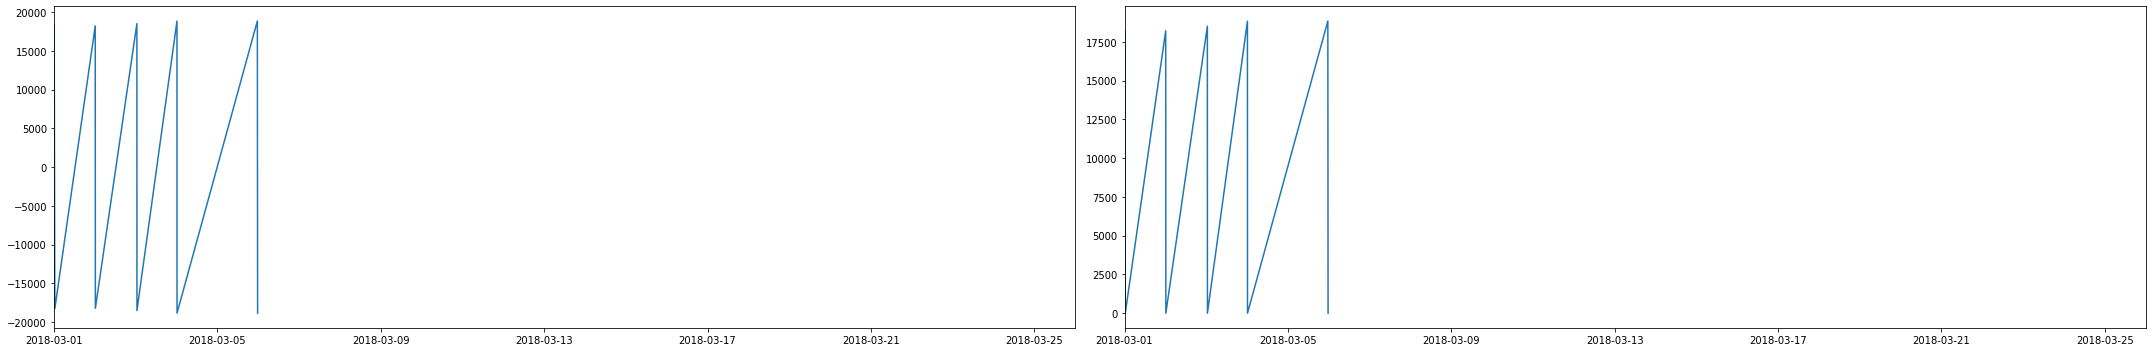

--------------------------------
0x443fb86336abe54dd394bfefe379ab1a507507d8
Wallet: 24 in, 21 out


<Figure size 432x288 with 0 Axes>

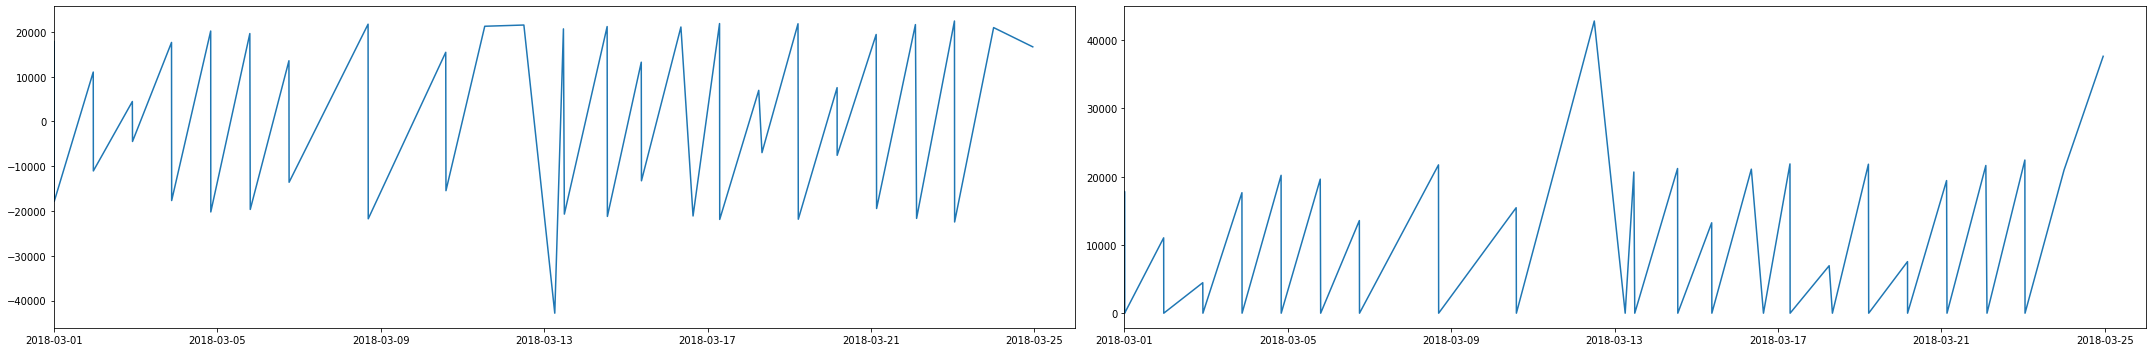

--------------------------------
0xff4329f01b3364b15c84592d2c5913d013c85390
Wallet: 20 in, 20 out


<Figure size 432x288 with 0 Axes>

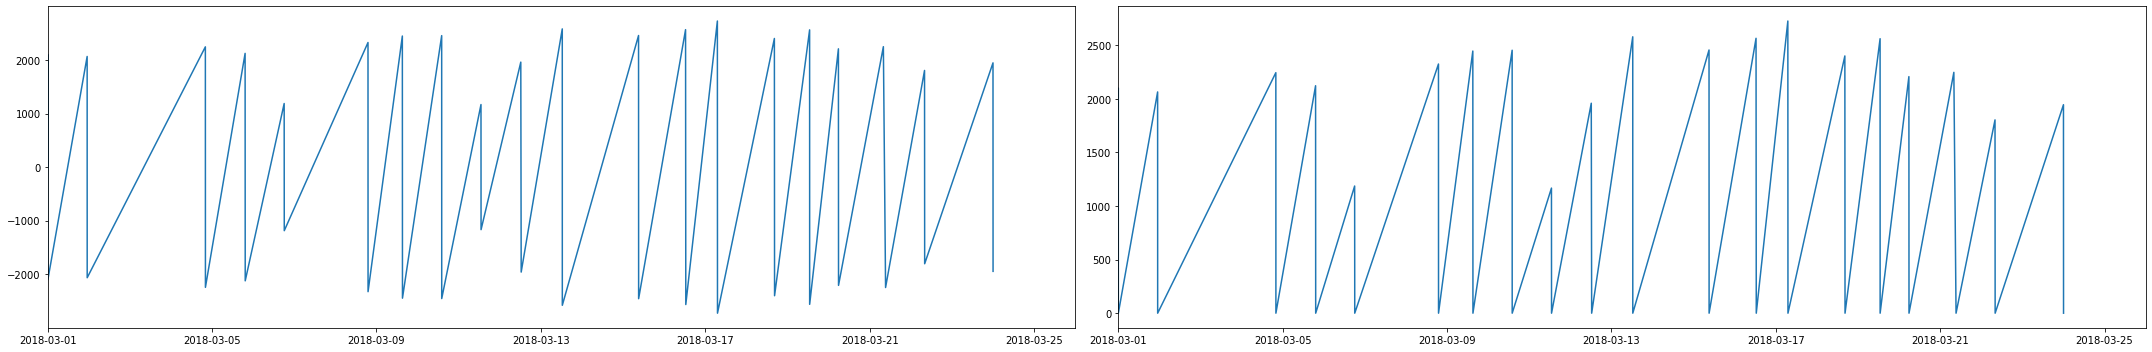

--------------------------------
0x56ae3a7bed9cf5101f38ddb0fb4e496a7660ac1d
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

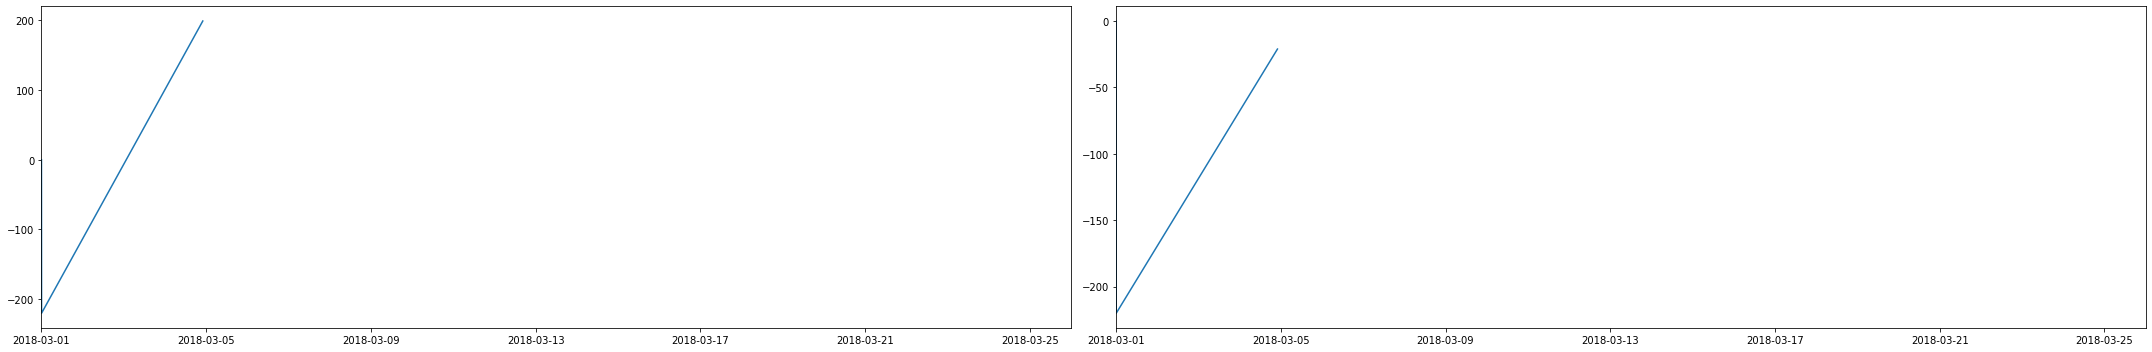

--------------------------------
0x998499aa25d690a03fbe20a2aa3d57befcf7c767
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

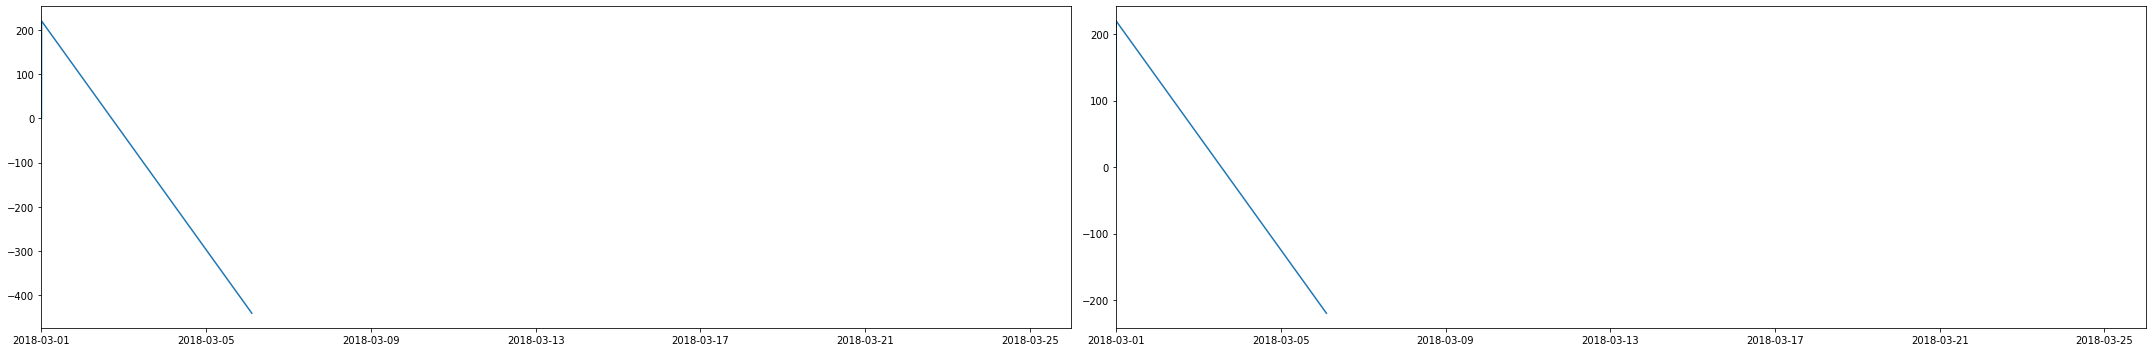

--------------------------------
0x23b6a37fd6d6131b7fdf8d7a489f401bd7f7fd3e
Wallet: 2 in, 2 out


<Figure size 432x288 with 0 Axes>

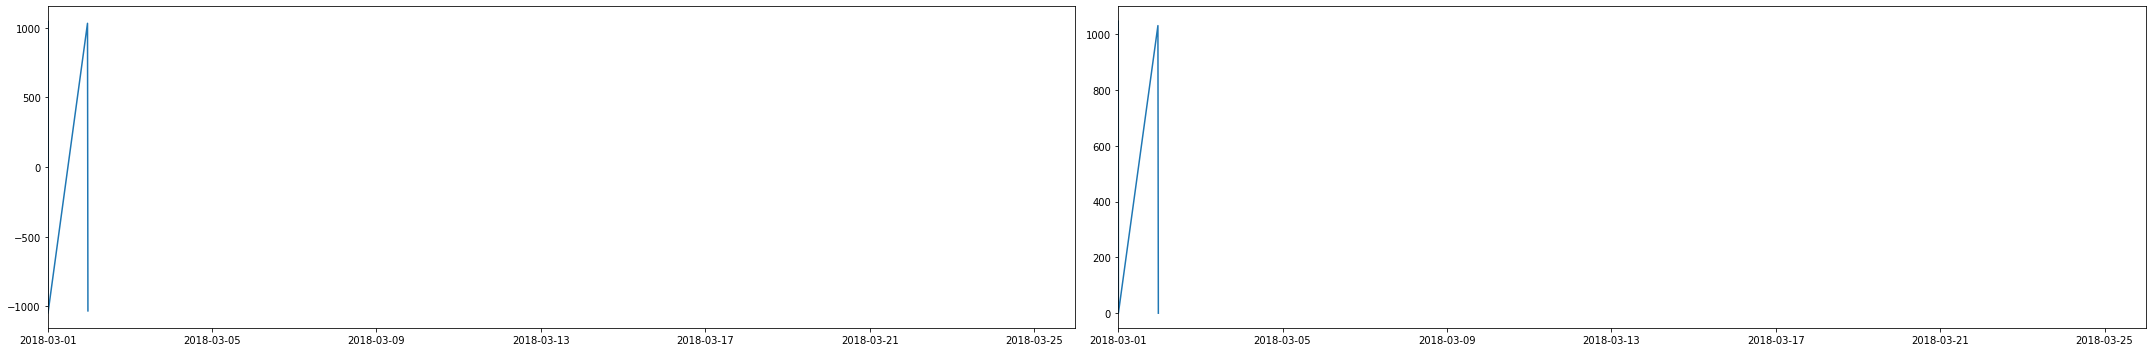

--------------------------------
0x85c694bd73034bb6071037d5c4d0b44e93bc8c85
Wallet: 28 in, 14 out


<Figure size 432x288 with 0 Axes>

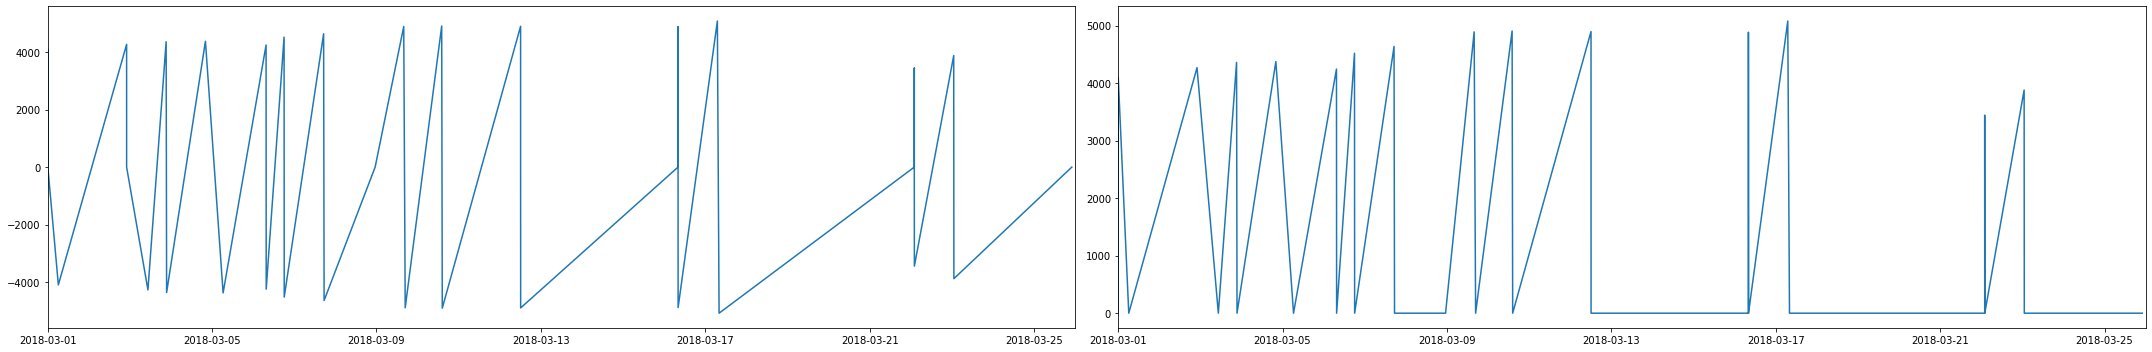

--------------------------------
0xc3e1181875626b03d1f6027fba412f65c1cf8a81
Wallet: 19 in, 6 out


<Figure size 432x288 with 0 Axes>

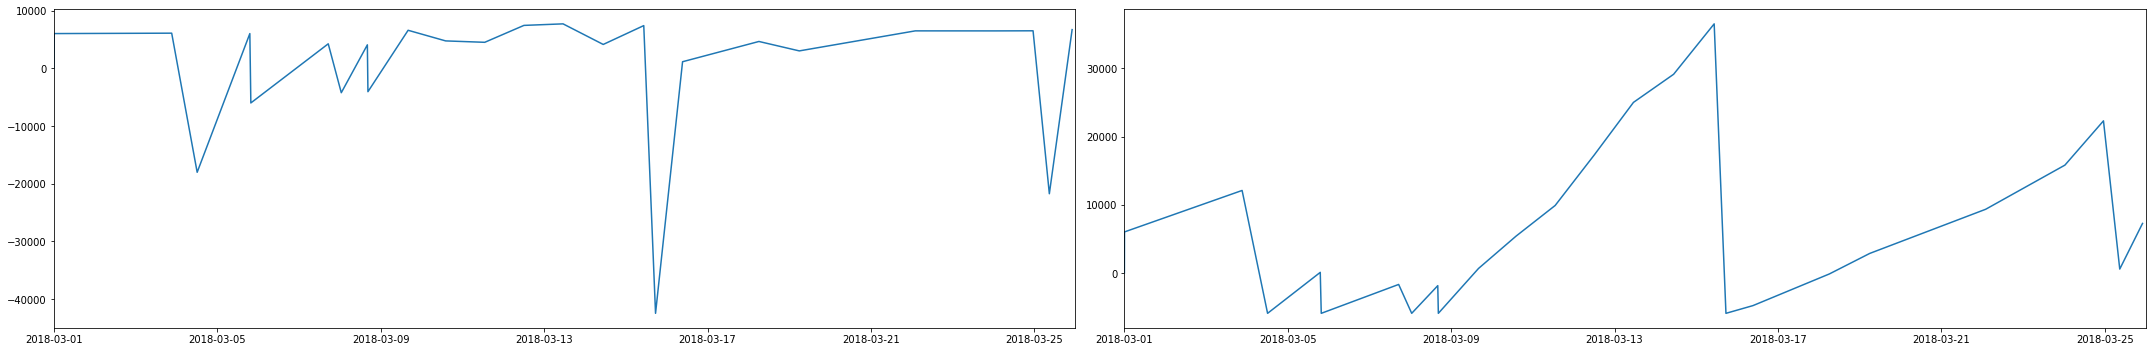

--------------------------------
0x6ccb0e1ad4e4cdc3b91efa37f2762c22fd03234b
Wallet: 1 in, 1 out


<Figure size 432x288 with 0 Axes>

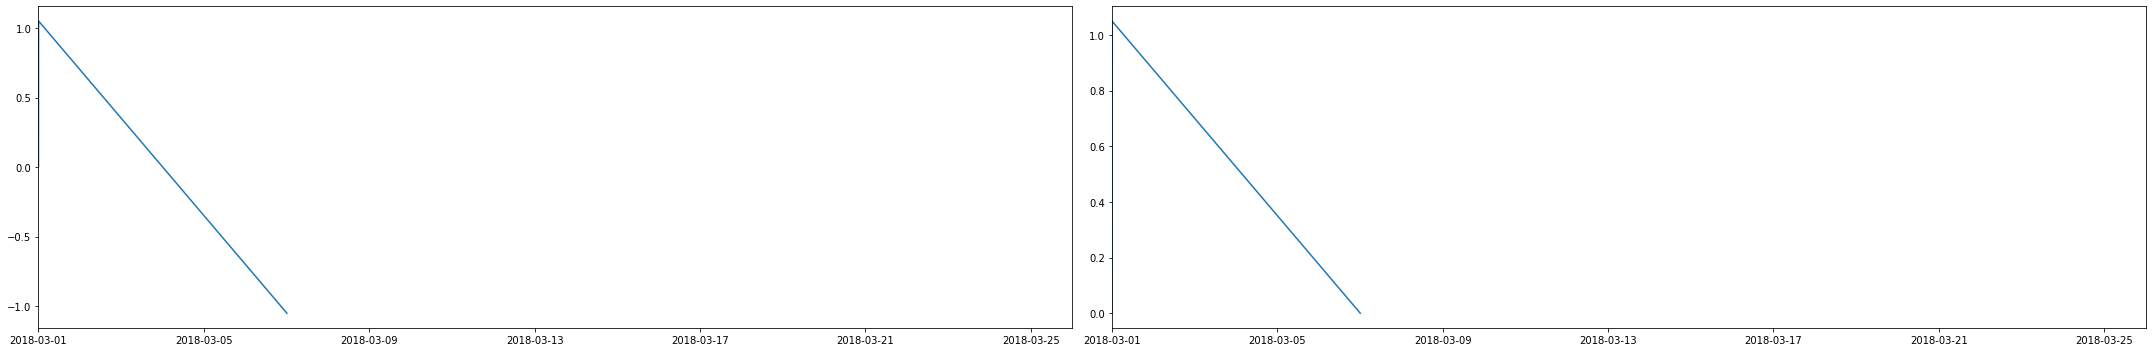

--------------------------------
0xff695a7f09185460dc43498c1c218ee78f336494
Wallet: 27 in, 23 out


<Figure size 432x288 with 0 Axes>

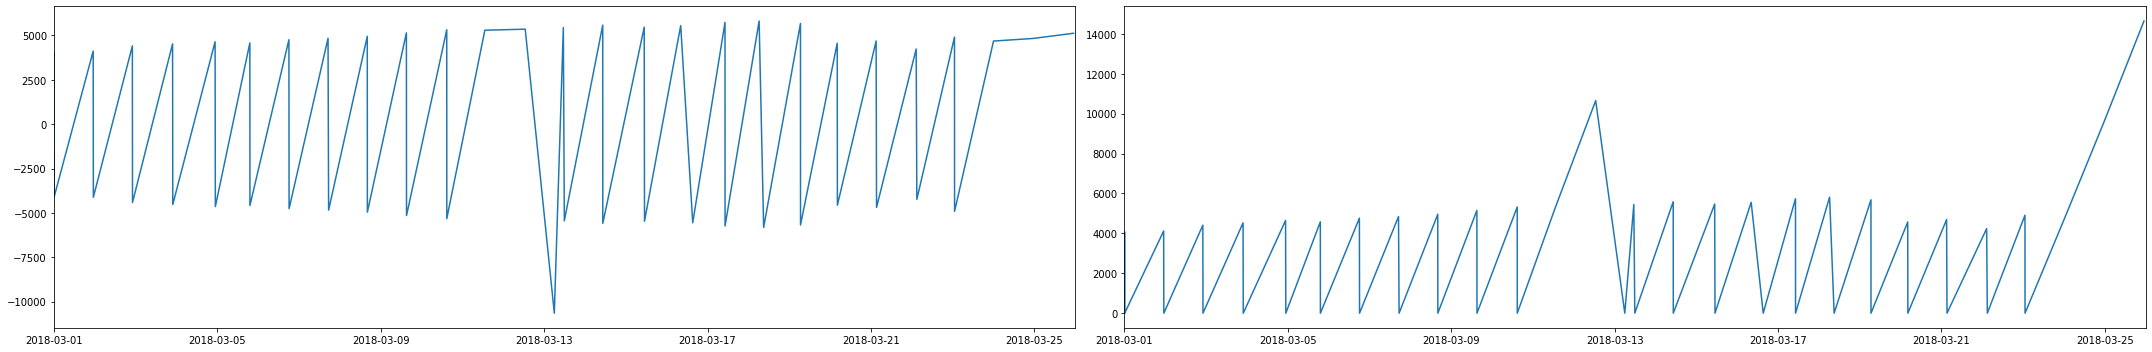

--------------------------------
0xc30ff49429b3077fc2b9a910b072f2300dc41b9a
Wallet: 13 in, 13 out


<Figure size 432x288 with 0 Axes>

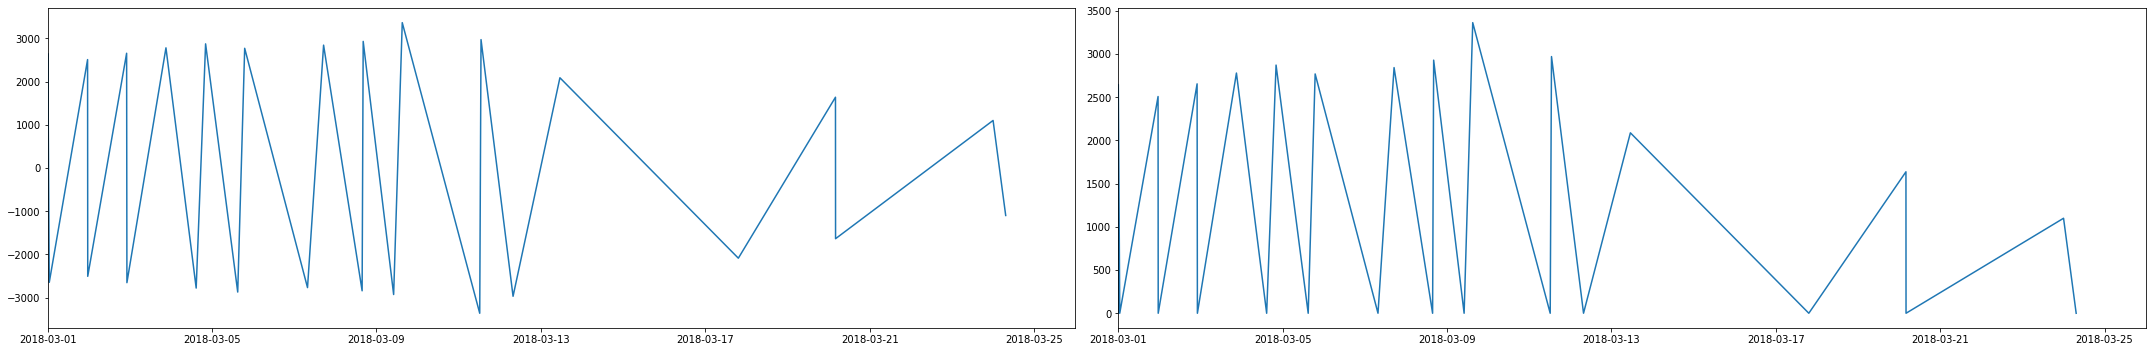

--------------------------------
0x86e364bf18fd7ffbb7e9efb337970aa5c16989db
Wallet: 2 in, 3 out


<Figure size 432x288 with 0 Axes>

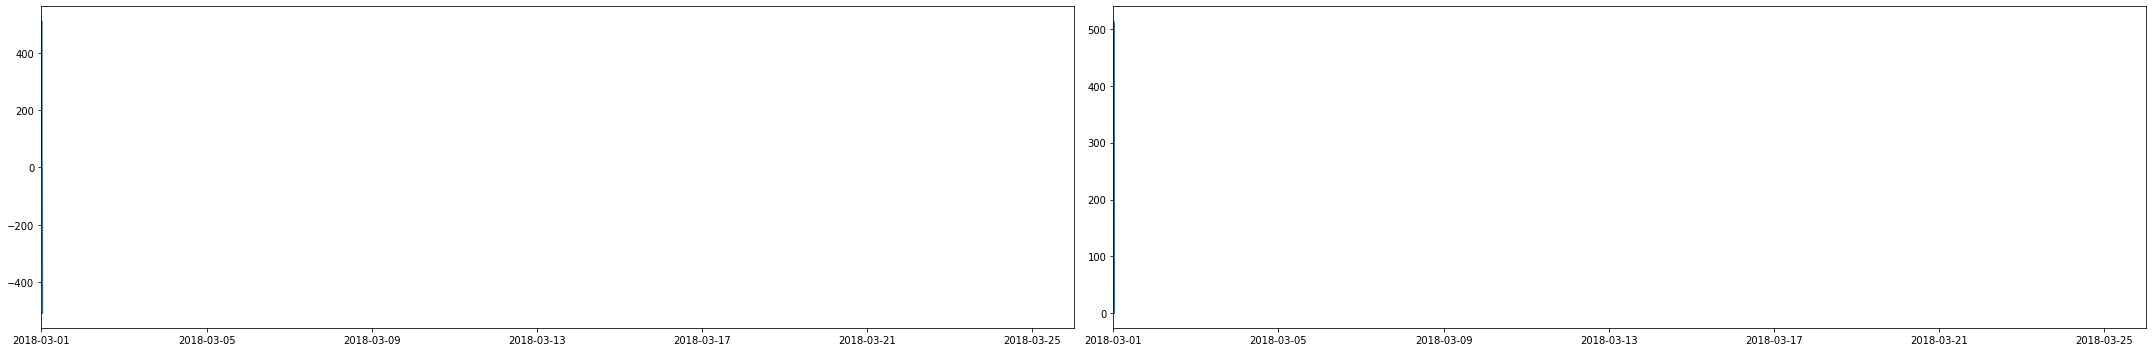

--------------------------------
0xdc8a0b61f9441fd89a75e202249533e47977b707
Wallet: 12 in, 12 out


<Figure size 432x288 with 0 Axes>

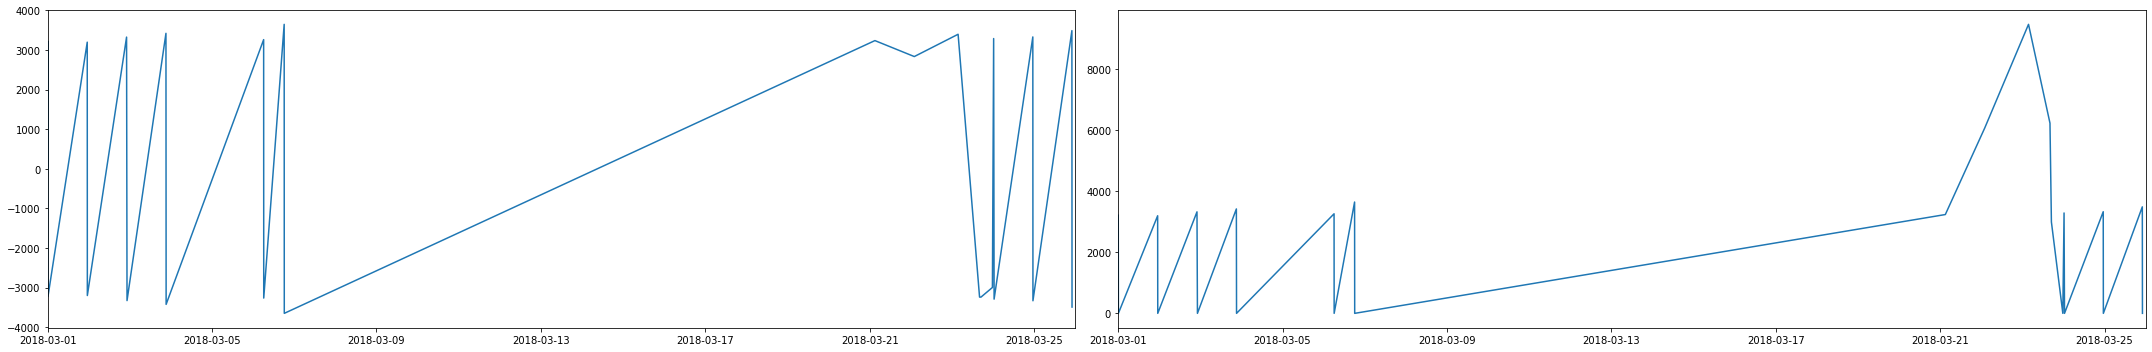

--------------------------------
0xdb4d6f5ad1998ea10e966016686ef561cc6edd1c
Wallet: 7 in, 7 out


<Figure size 432x288 with 0 Axes>

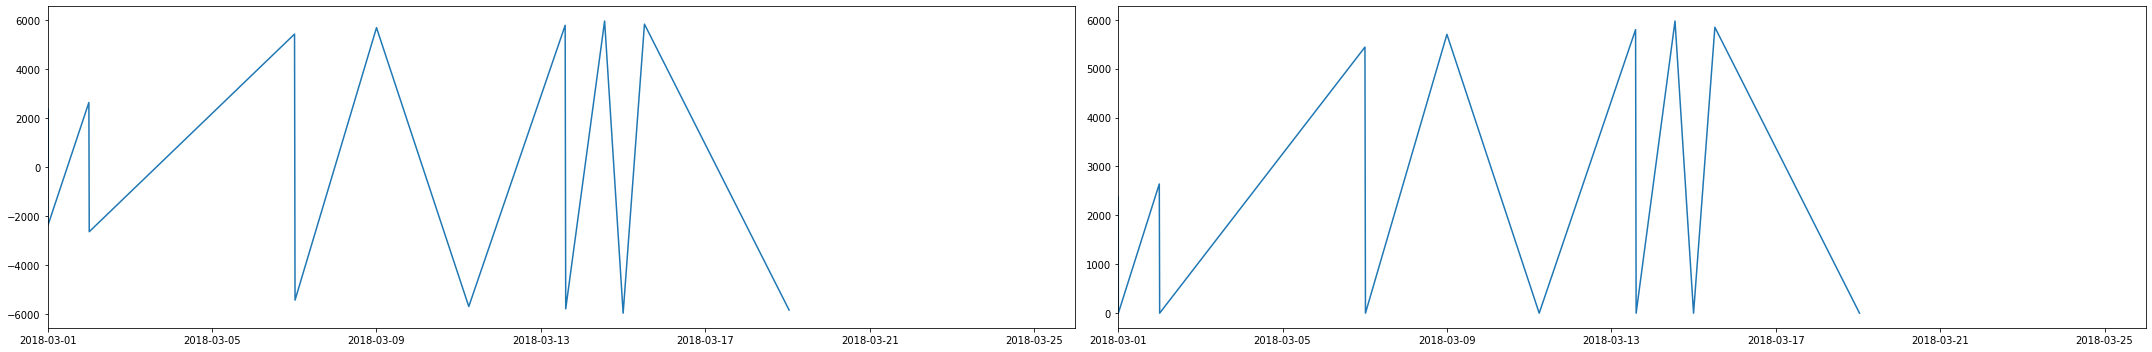

--------------------------------
0x6009f6908d8b7f182bffc705a92a5beb152eca24
Wallet: 1 in, 0 out


<Figure size 432x288 with 0 Axes>

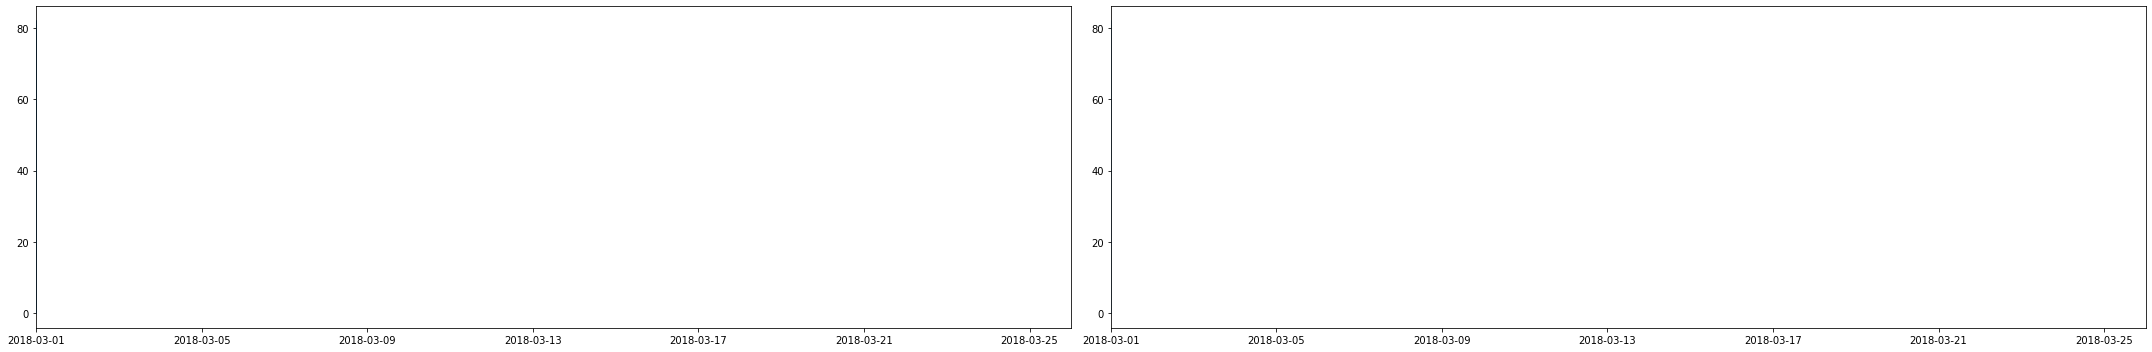

--------------------------------
0xc267b214490b7fff94b9eadad23bc632eebed31b
Wallet: 7 in, 7 out


<Figure size 432x288 with 0 Axes>

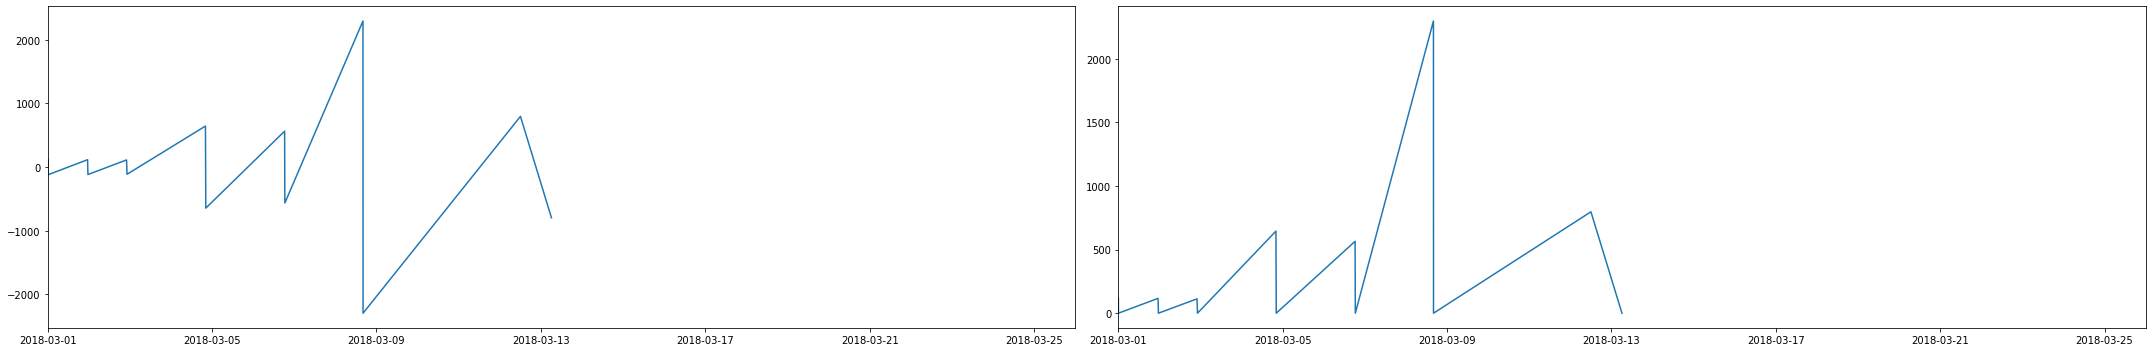

--------------------------------
0x4ad2e590a5884a44b5d18e2b137848c53b9ff232
Wallet: 11 in, 4 out


<Figure size 432x288 with 0 Axes>

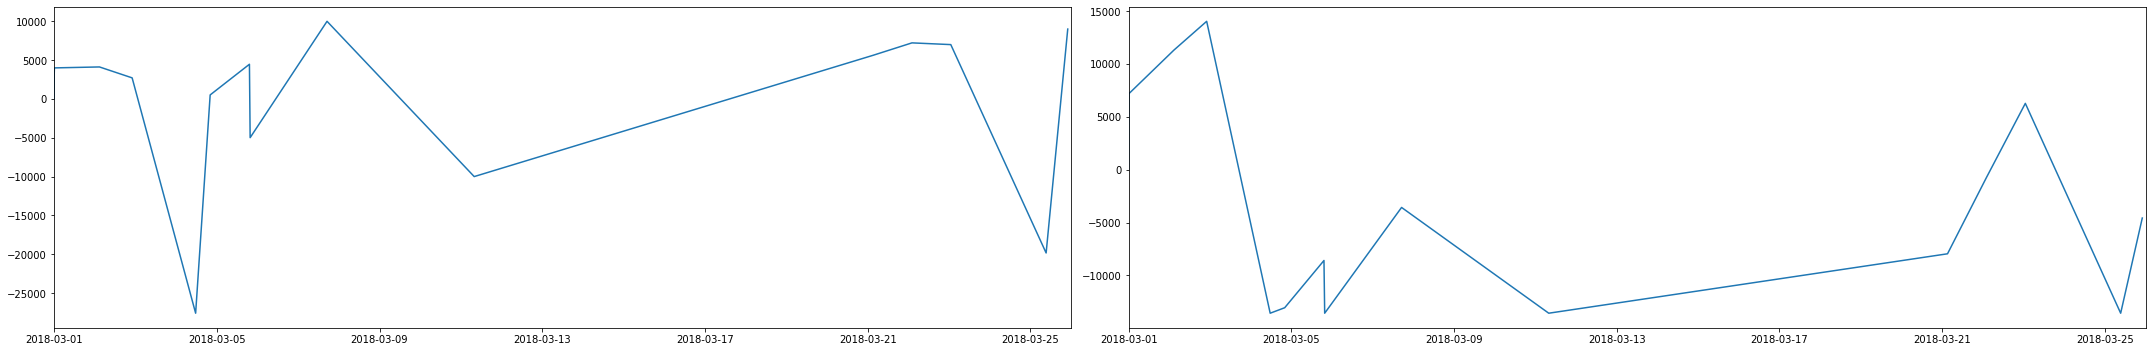

--------------------------------
0x9930eacd6704494196e9a4a52539582a97b83cca
Wallet: 2 in, 2 out


<Figure size 432x288 with 0 Axes>

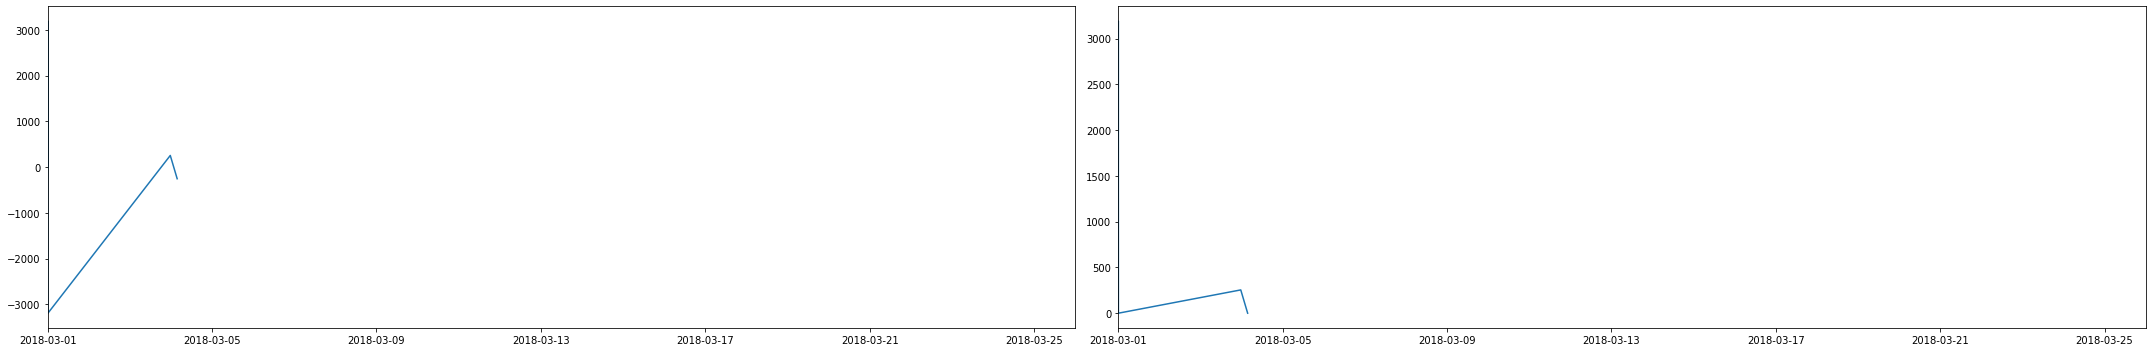

--------------------------------


In [9]:
for i, (addr, node) in enumerate(nodes.items()):
    if i > 100:
        break
        
    print_time_series(node, end_date)

In [10]:
txs_by_day = {}
for tx in transactions:
    if tx.timestamp.day in txs_by_day.keys():
        txs_by_day[tx.timestamp.day].append(tx)
    else:
        txs_by_day[tx.timestamp.day] = [tx]

In [11]:
import torch
import numpy as np
import networkx as nx
import dgl

Using backend: pytorch


In [12]:
def make_graph(tx_list):
    l = len(tx_list)
    u = np.empty((0,1), int)
    v = np.empty((0,1), int)
    e = np.empty((0,1), float)
    
    for i, tx in enumerate(tx_list):
        u = np.append(u, nodes[tx.sender].node_id)
        v = np.append(v, nodes[tx.receiver].node_id)
        e = np.append(e, tx.amount)
        

    g = dgl.DGLGraph((u,v))

    e = np.float32(e)
    e = torch.from_numpy(e)
    e = e.to(torch.device('cuda:0'))
    g.edata['w'] = e
    
    return g

In [17]:
graphs = {}
for day, txs in list(txs_by_day.items()):
    g = make_graph(txs_by_day[day])
    graphs[day] = g

In [18]:
graphs

{1: DGLGraph(num_nodes=95245, num_edges=5854,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}),
 2: DGLGraph(num_nodes=95249, num_edges=6709,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}),
 3: DGLGraph(num_nodes=95266, num_edges=6178,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}),
 4: DGLGraph(num_nodes=95275, num_edges=7144,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}),
 5: DGLGraph(num_nodes=95278, num_edges=6905,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}),
 6: DGLGraph(num_nodes=95274, num_edges=7345,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)}),
 7: DGLGraph(num_nodes=95258, num_edges=8216,
          ndata_schemes={}
          edata_schemes={'w': Scheme(shape=(), dtype=torch.floa